In [1]:
import os
from pathlib import Path
os.chdir(Path().resolve().parent)
os.getcwd()

'/nvme/wangding/Desktop/tsim/tsim'

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import imageio
from pathlib import Path
from graph.load import load_graph
from eval import *
from graph.process import generate_unique_node_id
import pandas as pd
import os
#import cv2
import pickle
import torch
from matplotlib.pyplot import figure
import math
import numpy as np
plt.style.use('default')
from sklearn.preprocessing import MinMaxScaler
import re
import numpy as np

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import re

import glob
import pickle
from collections import defaultdict

ModuleNotFoundError: No module named 'graph'

### 1. Load data (real+sim)

In [5]:
exp_dir = Path().resolve().parent / "experiment"

In [6]:
def load_sim_feat(out_dir,file_name):    
    with open(out_dir / file_name, "rb") as g:
        model_graph = pickle.load(g)
    unique_key = list(model_graph.keys())[0]
    sim_struc, sim_feat = model_graph[unique_key]
    return sim_feat

def load_data(case,test,out,training_step,pred_step):
    exp_setting = exp_dir / case
    train_data_dir = exp_setting   / "data" / test / "train_data"
    real_data_dir = exp_setting / "data" / test / "test_data"
    out_dir = exp_setting / "data" / test / out
    node_all = pd.read_csv(train_data_dir / "node_all.csv")
    node_id_dict = generate_unique_node_id(node_all)
    
    file_list = os.listdir(out_dir)
    file_list = [file_name for file_name in file_list if file_name.endswith(".p")]
    
    sim_feat0 = load_sim_feat(out_dir,file_list[0])
    sim_feat1 = load_sim_feat(out_dir,file_list[1])
    sim_feat2 = load_sim_feat(out_dir,file_list[2])
    sim_feat3 = load_sim_feat(out_dir,file_list[3])
    sim_feat4 = load_sim_feat(out_dir,file_list[4])
    sim_feat5 = load_sim_feat(out_dir,file_list[5])
    sim_feat6 = load_sim_feat(out_dir,file_list[6])
    sim_feat7 = load_sim_feat(out_dir,file_list[7])
    sim_feat8 = load_sim_feat(out_dir,file_list[8])
    sim_feat9 = load_sim_feat(out_dir,file_list[9])
    
    sub_feat = [sim_feat0, sim_feat1, sim_feat2, sim_feat3, sim_feat4, sim_feat5, sim_feat6, sim_feat7, sim_feat8, sim_feat9]

    for i, sim_feat in enumerate(sub_feat):
        time_start = training_step + pred_step * (i)
        time_end = time_start + pred_step
        for node_type in sim_feat:
            for node_id in sim_feat[node_type]:
                for feat_name in sim_feat[node_type][node_id]:
                    if feat_name == "time":
                        sim_feat[node_type][node_id][feat_name] = torch.arange(time_start, time_start + len(sim_feat[node_type][node_id][feat_name]))
                        
    # sub_feat =[sim_feat0,sim_feat1,sim_feat2,sim_feat3,sim_feat4]
    n = len(sub_feat)
    #sim_feat_list = [sim_feat1,sim_feat2,sim_feat3,sim_feat4] 
    combined_feat = defaultdict(dict)
    for node_type in set([key for sim_feat in sub_feat for key in sim_feat.keys()]):
        for node_id in set([key for sim_feat in sub_feat for key in sim_feat.get(node_type, {}).keys()]):
            combined_feat[node_type][node_id] = {}
            for feat_name in set([key for sim_feat in sub_feat for key in sim_feat.get(node_type, {}).get(node_id, {}).keys()]):
                feat_list = []
                for sim_feat in sub_feat:
                    feat_list.append(sim_feat.get(node_type, {}).get(node_id, {}).get(feat_name, torch.empty(0)))
                feat_value = torch.cat(feat_list, dim=0).squeeze()
                combined_feat[node_type][node_id][feat_name] = feat_value
    sim_feat = combined_feat
    return sim_feat

In [9]:
real_data_dir = exp_dir / case / "data" / test / "test_data"
train_data_dir = exp_dir / case  / "data" / test / "train_data"
node_all = pd.read_csv(train_data_dir / "node_all.csv")
node_id_dict = generate_unique_node_id(node_all)

In [7]:
training_step = 400
pred_step = 10
case =  "traci_tls"
test = "test2"
out = "out_dim_200_n_heads_4_n_layer_2_dr"

sim_feat = load_data(case,test,out,training_step,pred_step)

In [10]:
real_struc, real_feat, node_id_dict, scalers =  load_graph(real_data_dir,training_step,training_step+pred_step*10,node_id_dict)

In [28]:
# sub_feat = []
# for i, file_path in enumerate(file_list):
#     sub_feat[f"sim_feat{i}"]=load_sim_feat(file_list[0])
#     print(i, file_path)
    
    
# sub_feat = {}
# for i, file_path in enumerate(file_list):
#     sub_feat[f"sim_feat{i}"] = load_sim_feat(file_path)

# Access the first sim_feat
#print(sub_feat["sim_feat0"])

In [11]:
node_type = "veh"
node_id = 61
real_feat[node_type][node_id]['time']

tensor([400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
        414, 415, 416, 417, 418, 419, 420, 421])

In [12]:
sim_feat['veh'][node_id]['time']

tensor([400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
        414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427,
        428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441,
        442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
        456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469,
        470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,
        484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497,
        498, 499])

### 2. Node feature comparison

In [13]:
def get_feat_df(feat_dict, node_type, node_id, feat):
    feat_lst = feat_dict[node_type][node_id][feat].tolist()
    time_lst = feat_dict[node_type][node_id]['time'].tolist() 
    #print(feat_lst)
    g_feat = pd.DataFrame(np.array([feat_lst, time_lst]).T)
    g_feat.columns = [feat+str(node_id), 'time']
    g_feat['time'] = [int(i) for i in g_feat.time]
    return g_feat

In [14]:
def plot_feat(real_feat,sim_feat,node_type,node_id,feat_name):
    feat_real = get_feat_df(real_feat, node_type, node_id, feat_name)
    feat_sim = get_feat_df(sim_feat, node_type, node_id, feat_name)
    feat_sim = feat_sim[feat_sim['time'] != 0]
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
    ax.plot(feat_real['time'],feat_real[feat_name+str(node_id)], label = "real")
    ax.plot(feat_sim['time'],feat_sim[feat_name+str(node_id)], linestyle='--',  marker='o',
        markersize=2, label = "sim")
    ax.set_xlabel("steps")
    ax.set_ylabel(feat_name)
    #ax.set_ylim(0,1)
    ax.set_title( feat_name+' of '+ node_type+'_'+str(node_id))
    ax.legend()

In [15]:
# node_type = 'veh'
# feat_name = 'speed'
# mae_sum = []
# rmse_sum = []
# last_car = list(real_feat['veh'].keys())[-1]
# for node_id in list(real_feat['veh'].keys())[:last_car-100]:
#     #print(node_id)
#     feat_real = get_feat_df(real_feat, node_type, node_id, feat_name)
#     feat_sim = get_feat_df(sim_feat, node_type, node_id, feat_name)
#     feat_sim = feat_sim[feat_sim['time'] != 0]
    
# #     feat_real = feat_real[feat_real['time'] >450]
# #     feat_sim = feat_sim[feat_sim['time'] >450]
    
#     if feat_real.shape[0]>0:
#         real = feat_real[feat_name+str(node_id)]
#         sim = feat_sim[feat_name+str(node_id)][:len(real)]

#         mae_sum.append(mean_absolute_error(real,sim))
#         #print("MAE:", mae)

#         # Calculate Root Mean Squared Error (RMSE)
#         rmse_sum.append(np.sqrt(mean_squared_error(real,sim)))
#         #print("RMSE:", rmse)

#         # calculate R-squared
#         r2 = r2_score(real, sim)

#         # calculate MAPE
#         mape = np.mean(np.abs((real - sim) / real)) * 100

In [16]:
# print(np.mean(rmse_sum),np.mean(mae_sum),np.mean(r2),np.mean(mape))

In [17]:
# real = feat_real[feat_name+str(node_id)]
# sim = feat_sim[feat_name+str(node_id)][:len(real)]

# mae = mean_absolute_error(real,sim)
# print("MAE:", mae)

# # Calculate Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mean_squared_error(real,sim))
# print("RMSE:", rmse)

In [19]:

common_keys = list(real_feat['veh'].keys() & sim_feat['veh'].keys())

In [20]:
common_keys

[61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98]

/tmp/ipykernel_22916/3897183209.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))


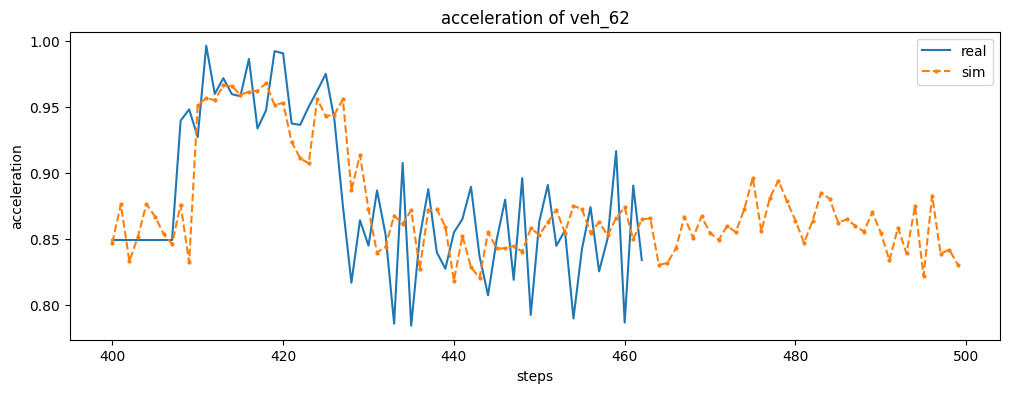

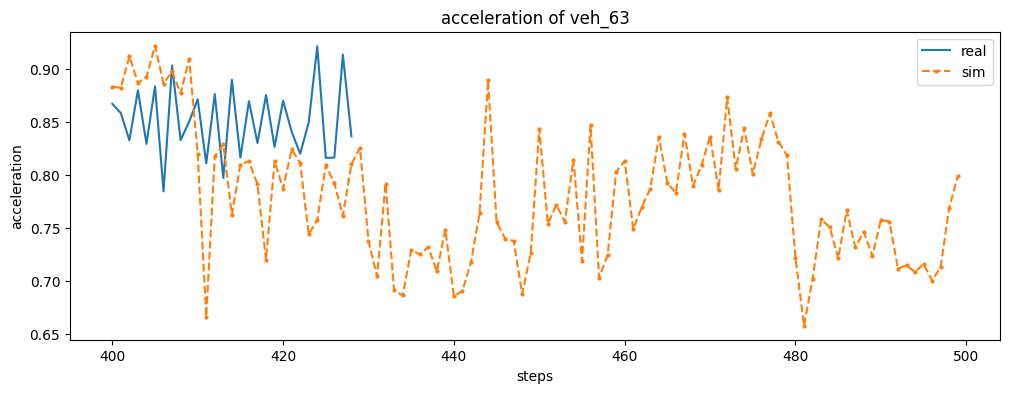

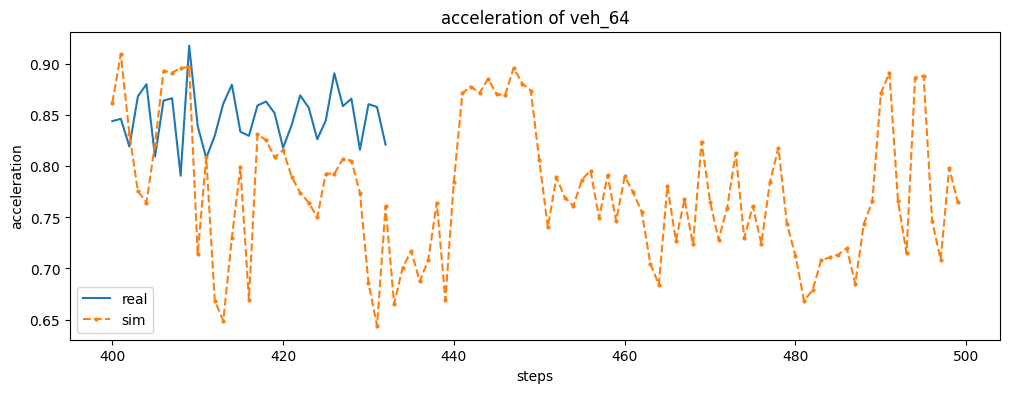

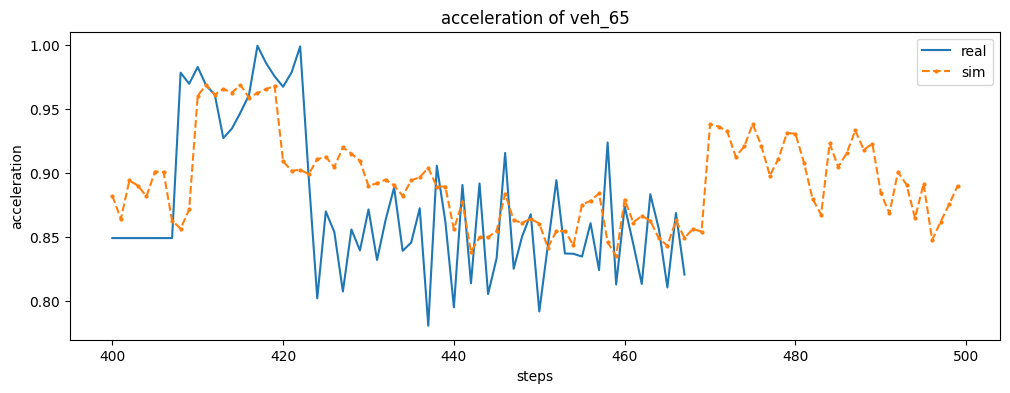

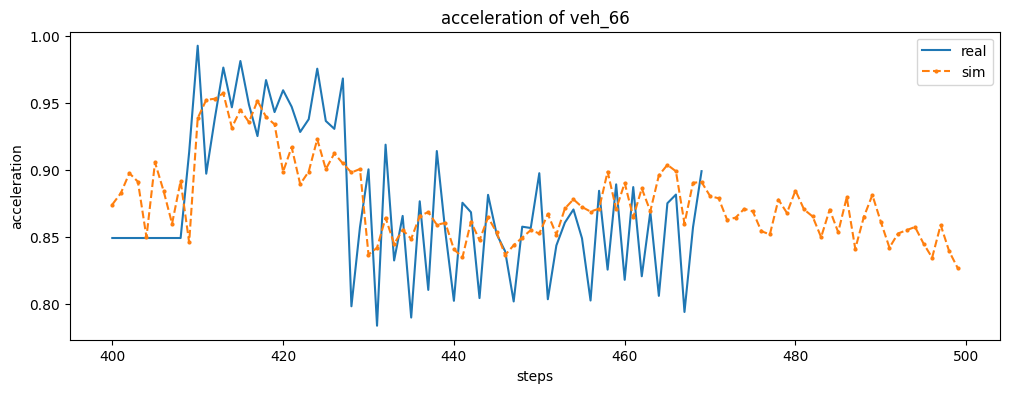

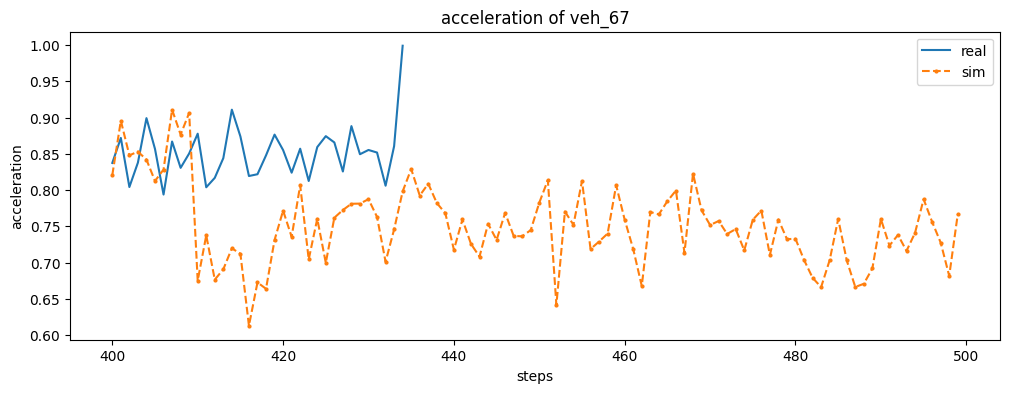

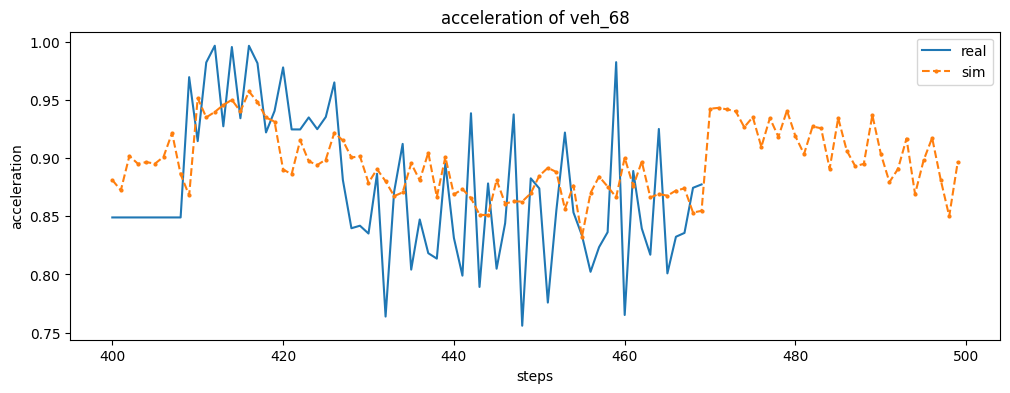

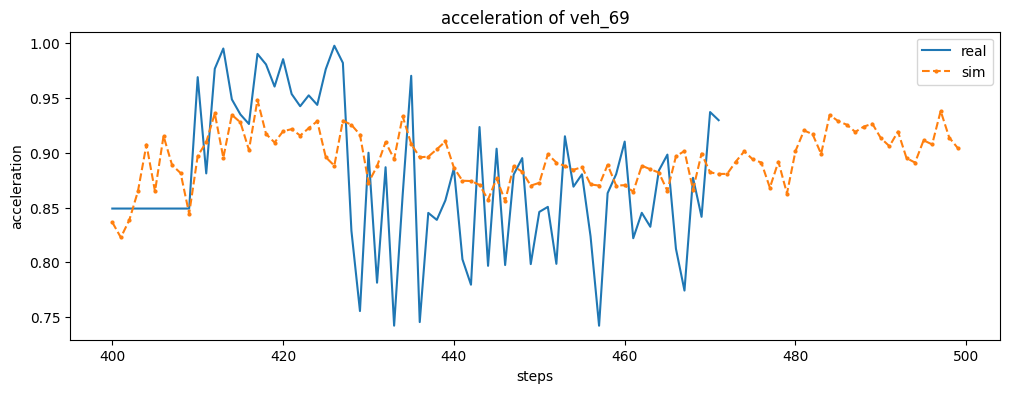

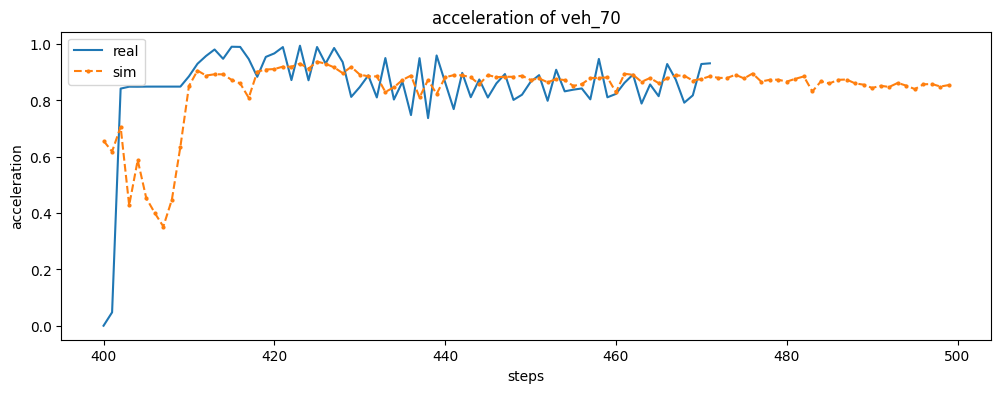

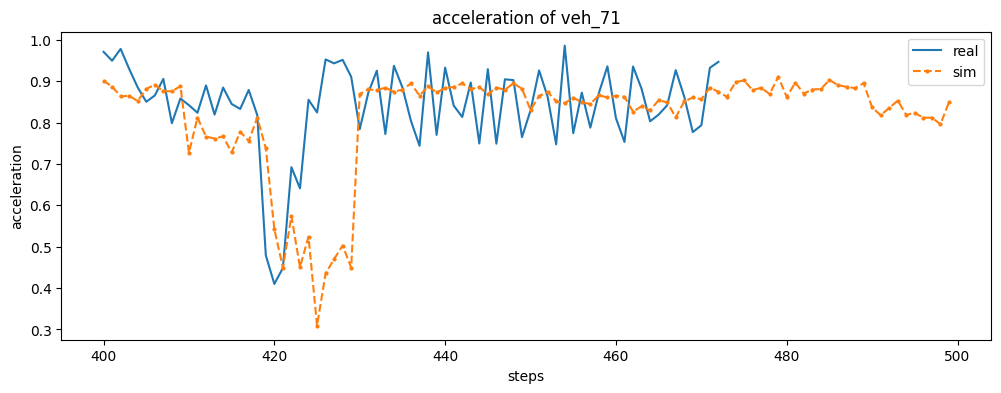

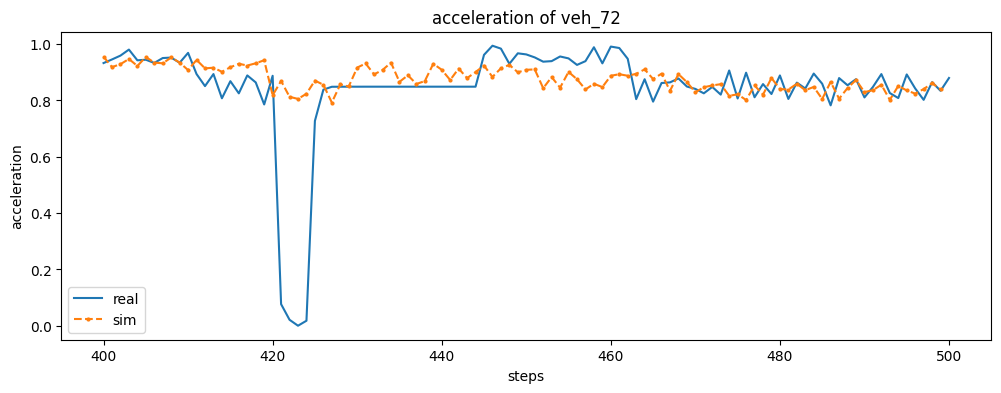

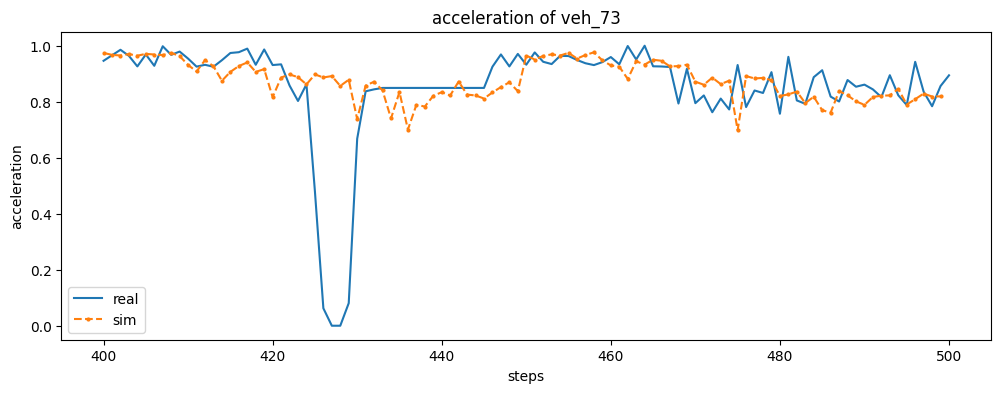

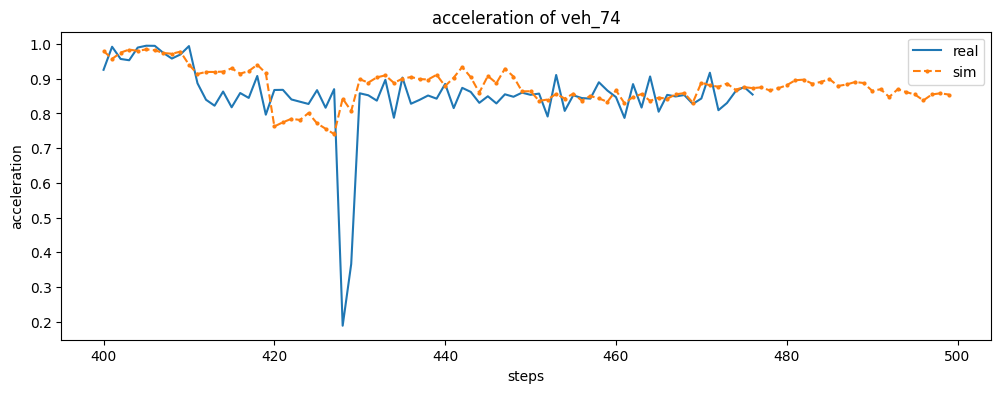

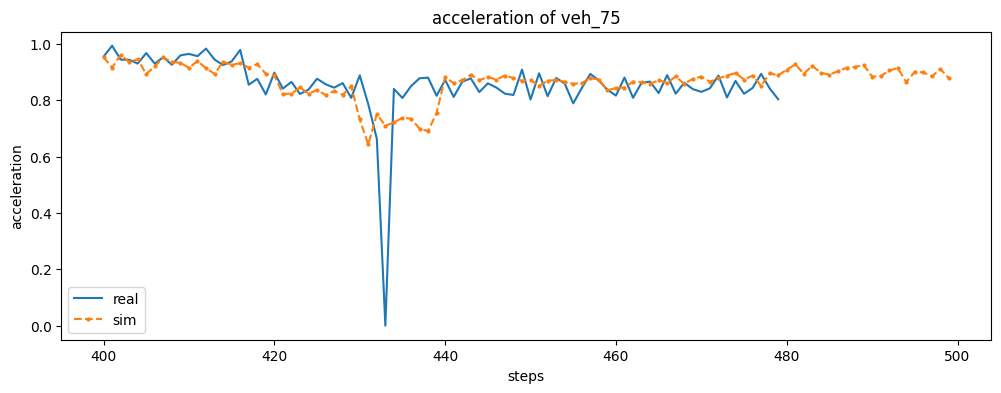

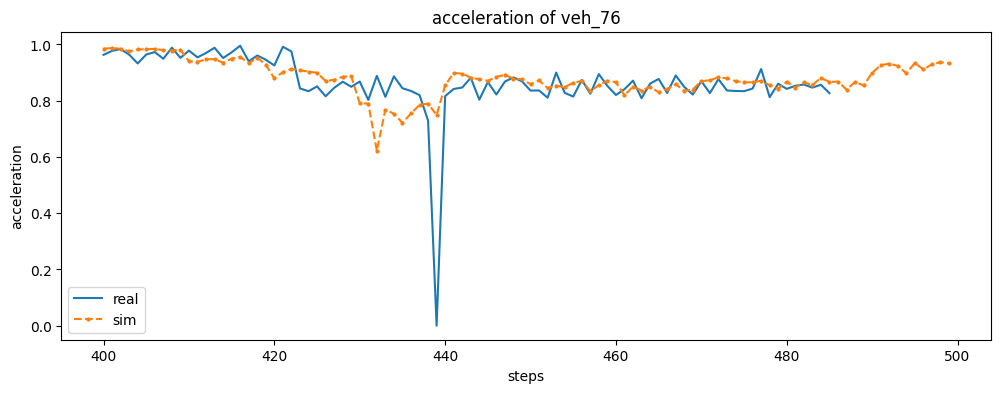

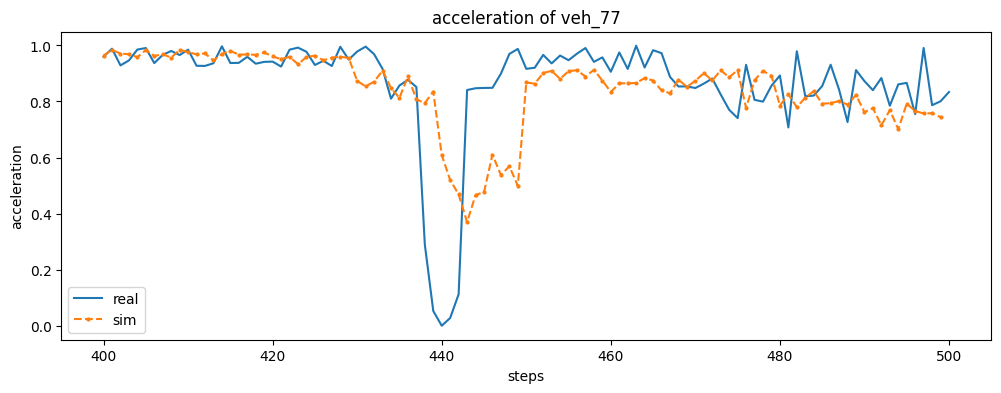

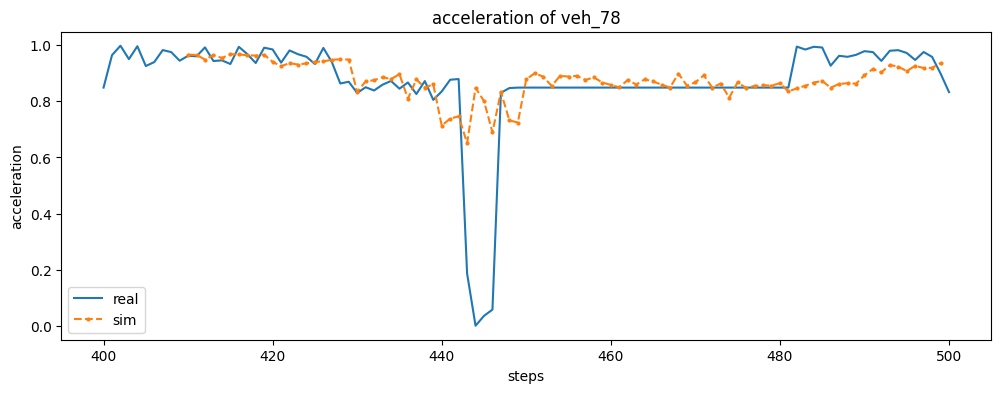

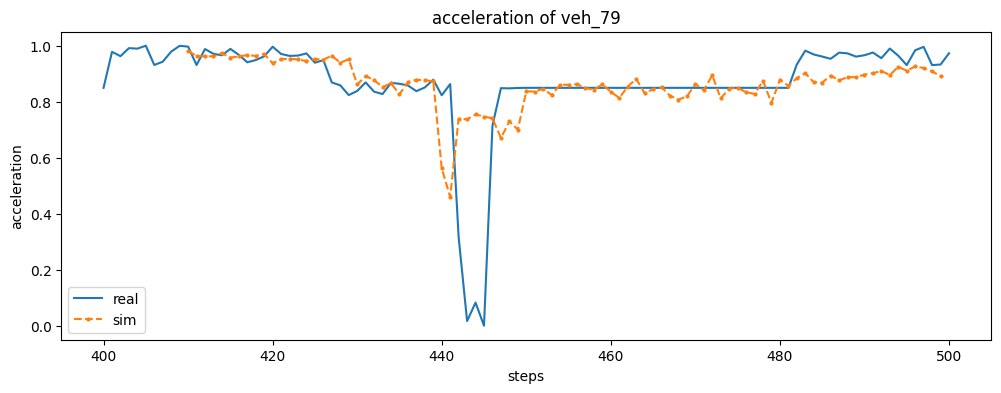

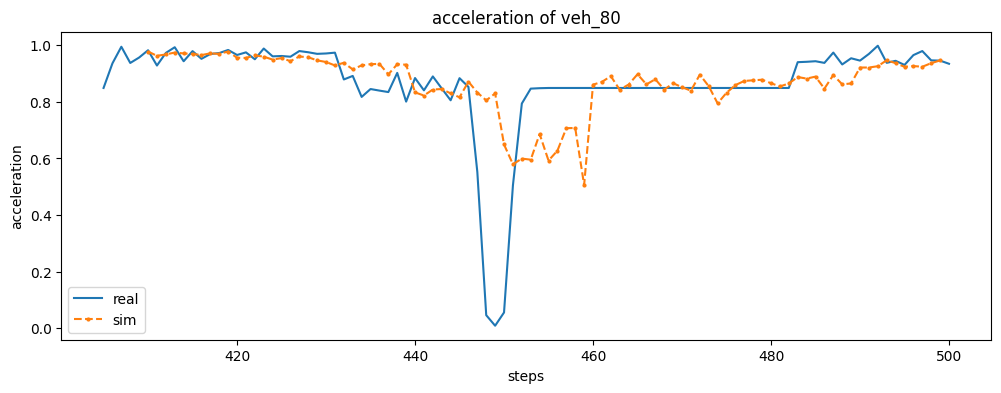

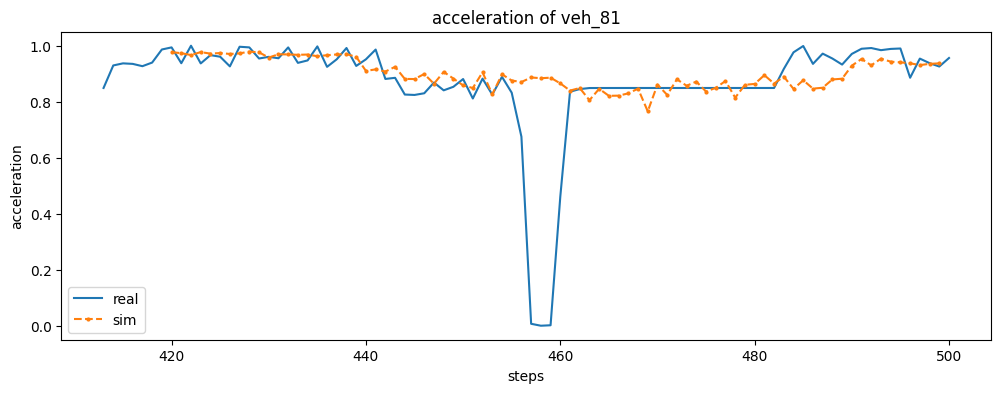

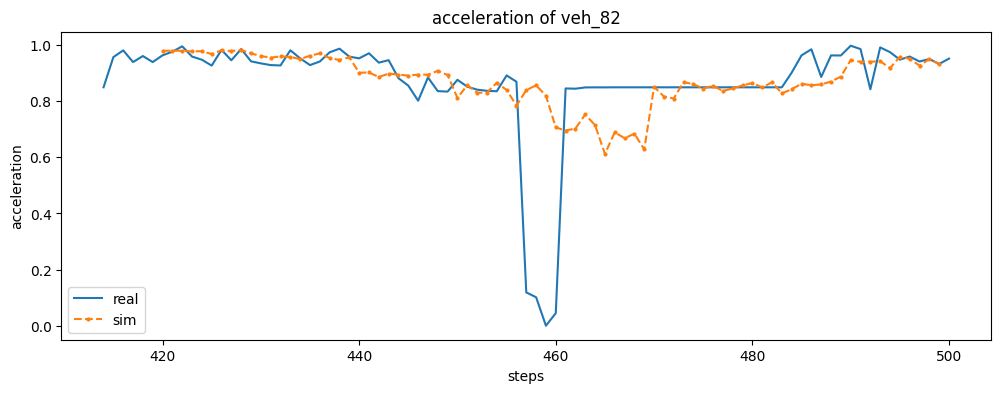

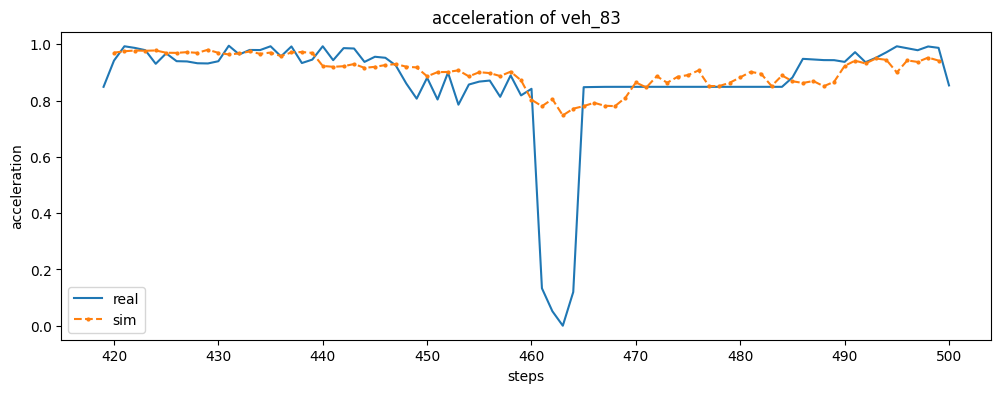

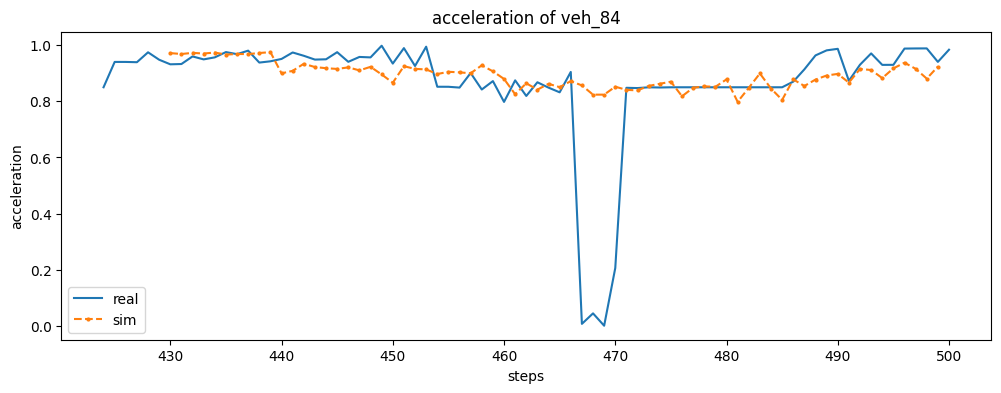

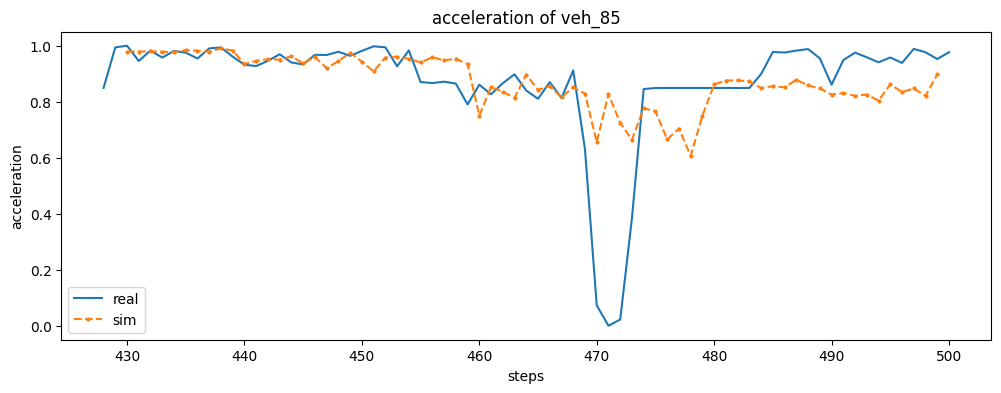

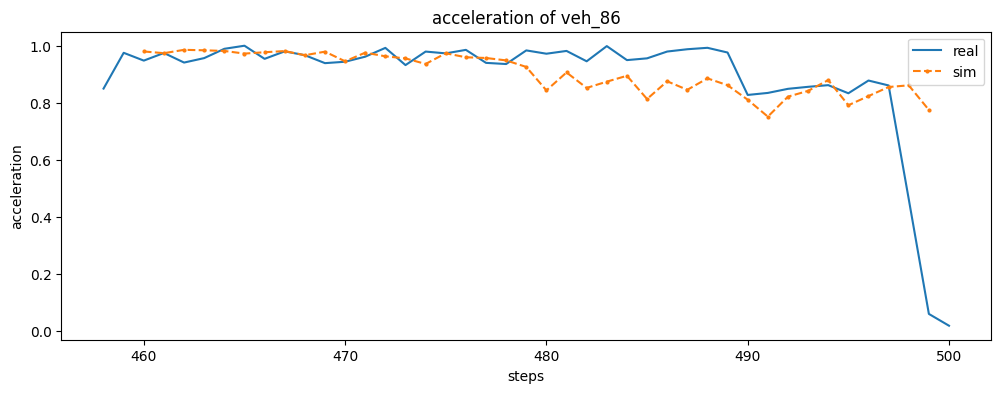

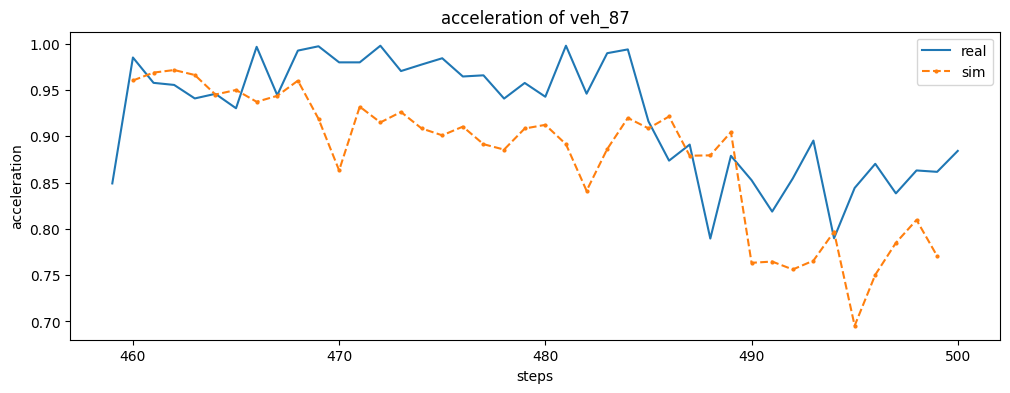

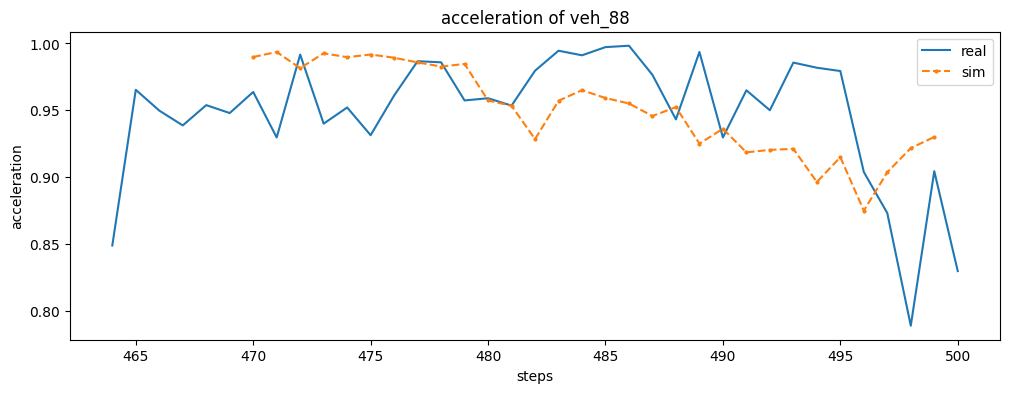

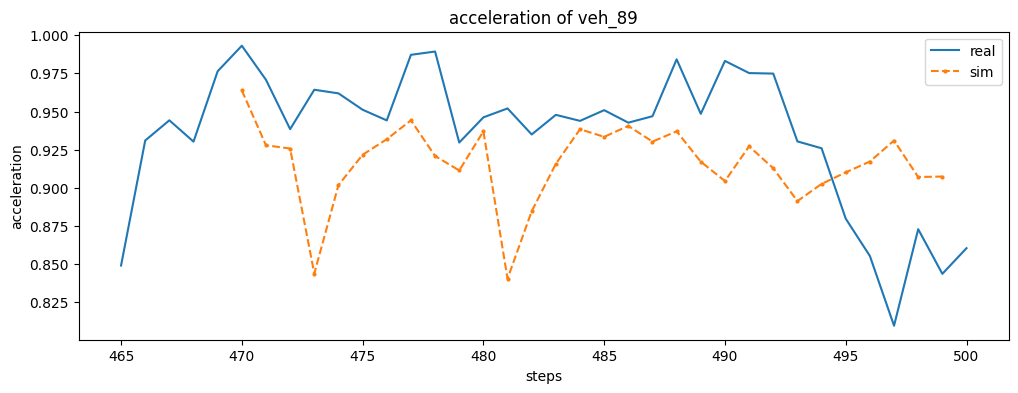

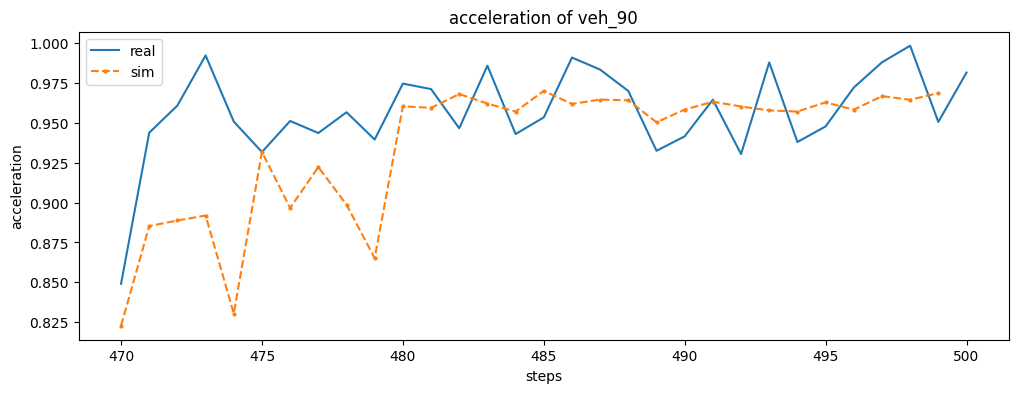

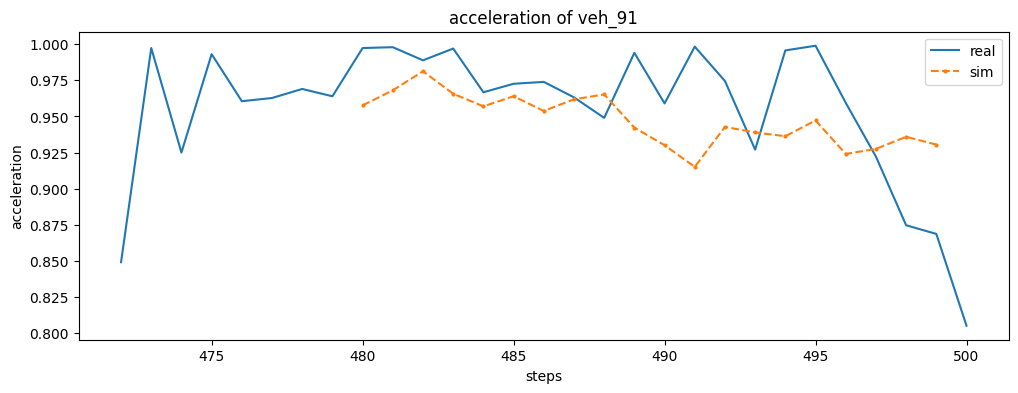

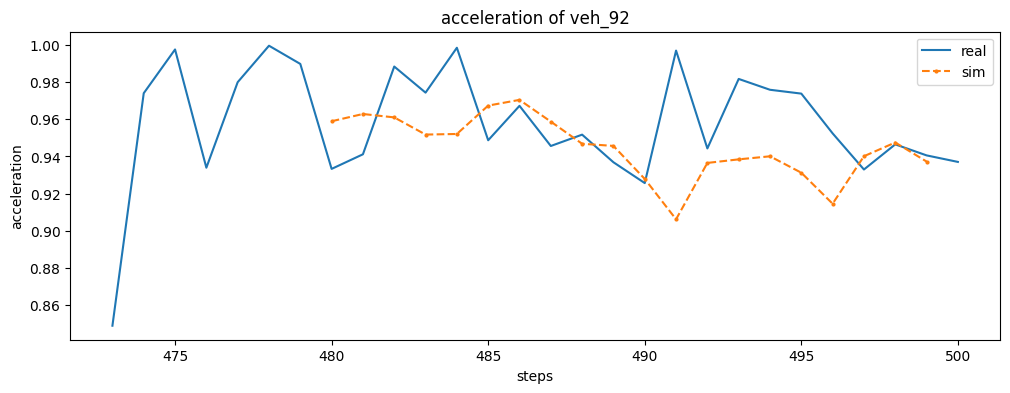

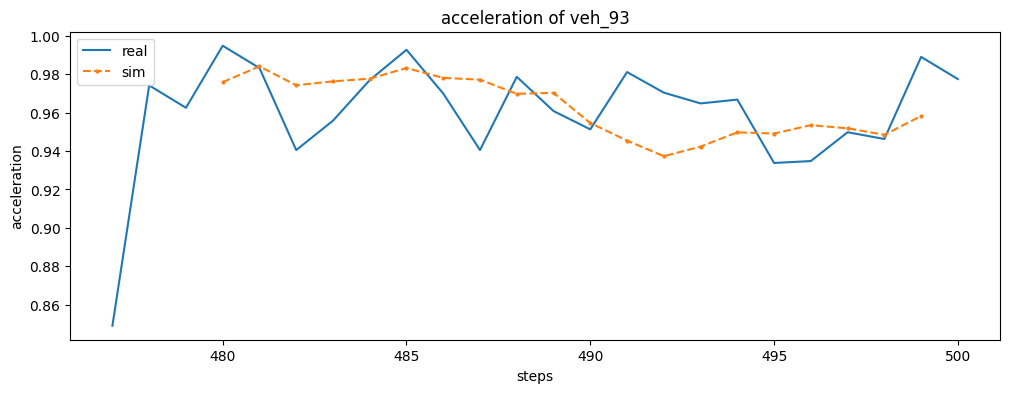

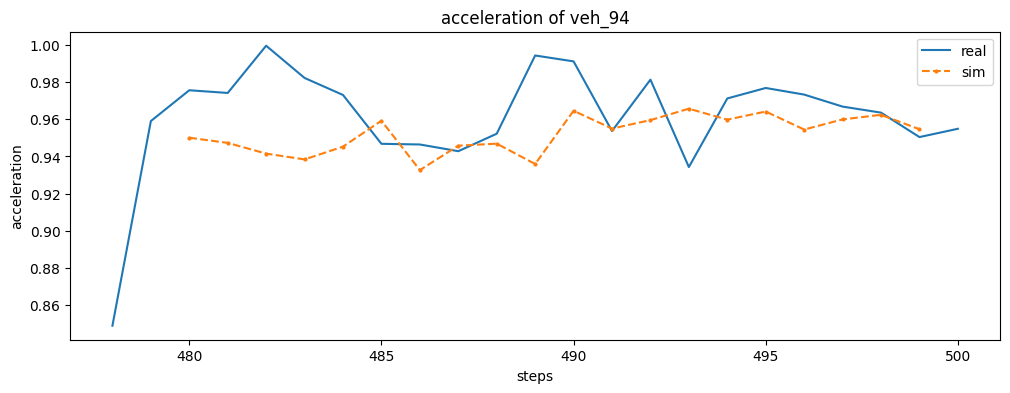

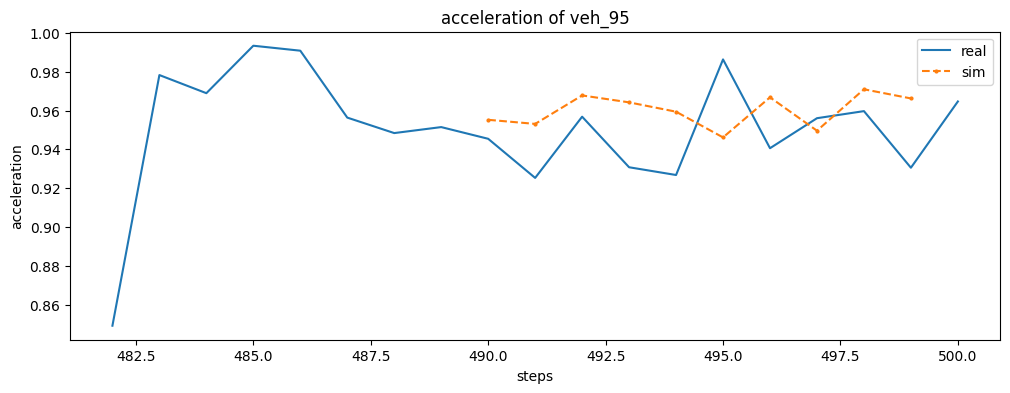

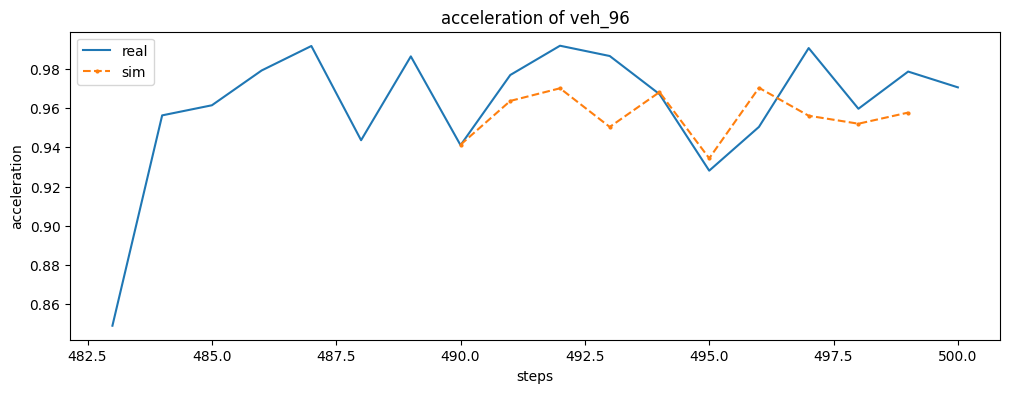

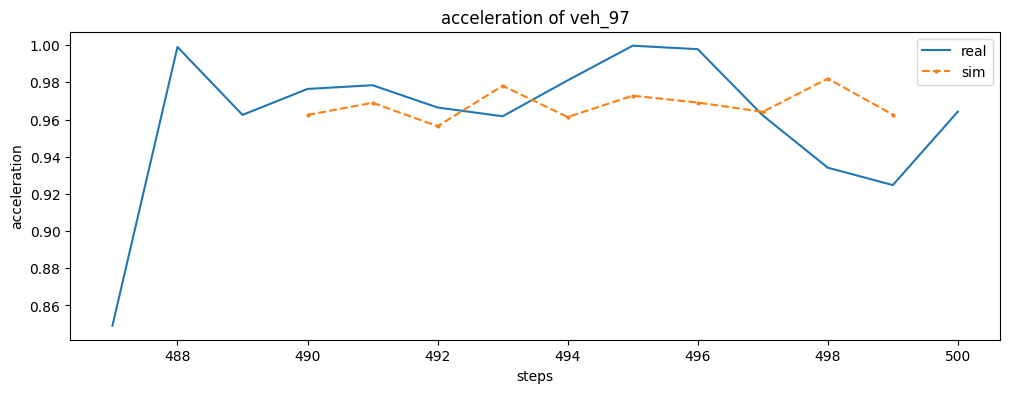

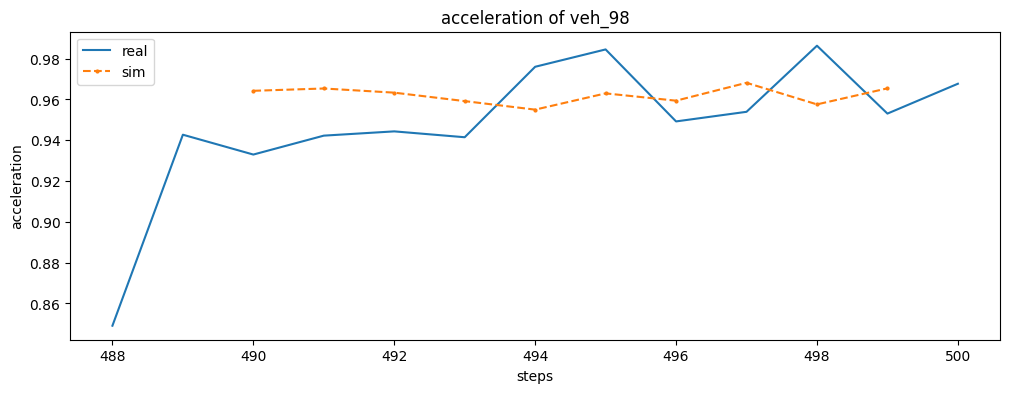

In [22]:
node_type = 'veh'
feat_name = 'acceleration'
for node_id in common_keys[1:]:
    plot_feat(real_feat,sim_feat,node_type,node_id,feat_name)


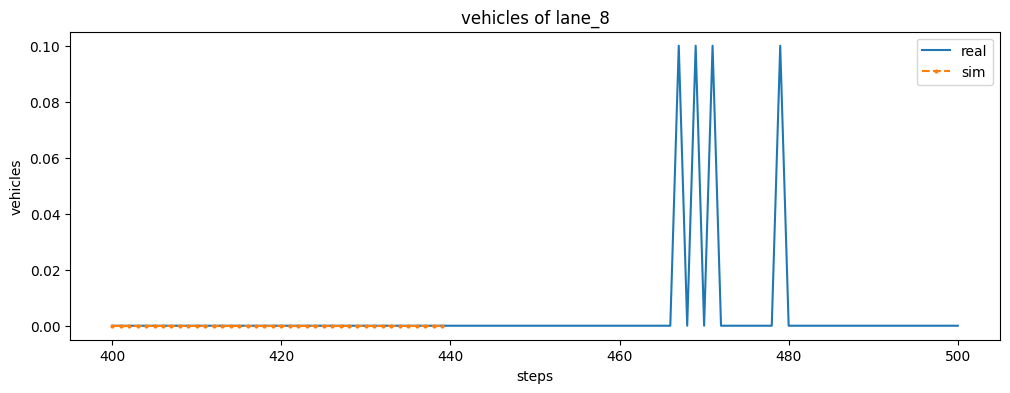

In [43]:
node_type = 'lane'
node_id = 8
feat_name = 'vehicles'

plot_feat(real_feat,sim_feat,node_type,node_id,feat_name)

### Fundamental Digram

In [54]:
real_feat['lane'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

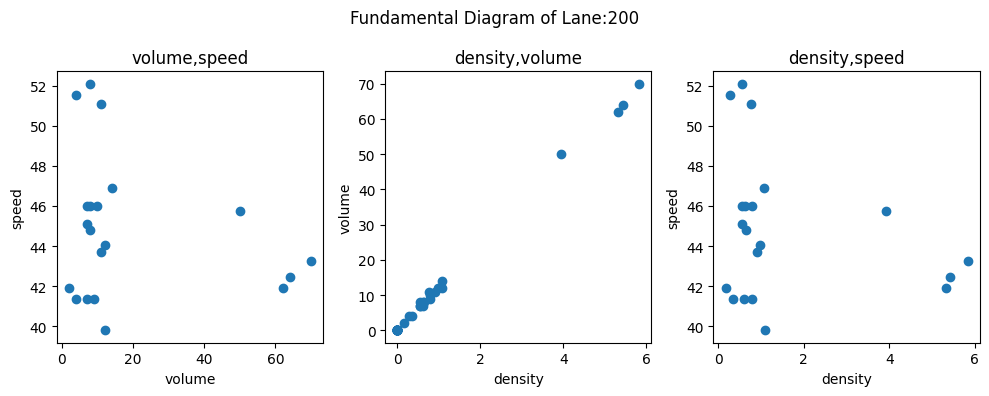

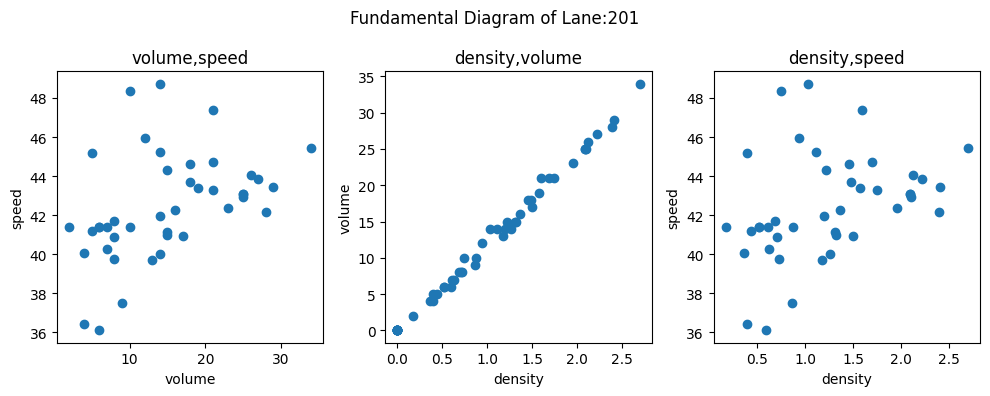

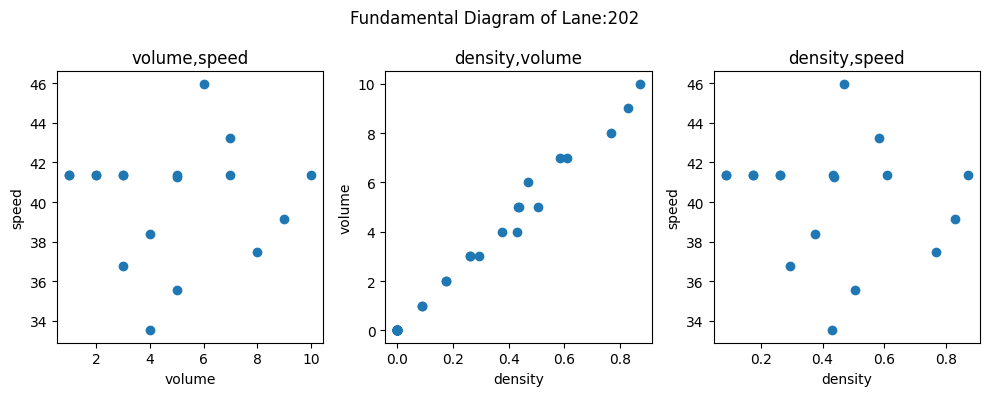

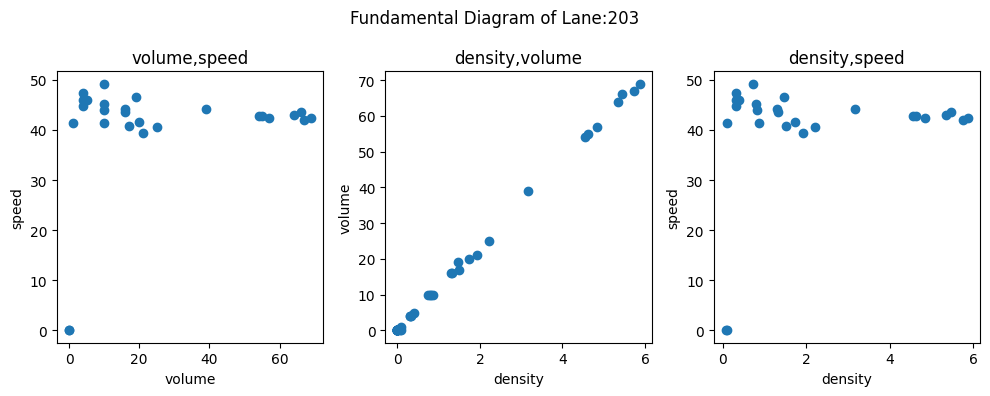

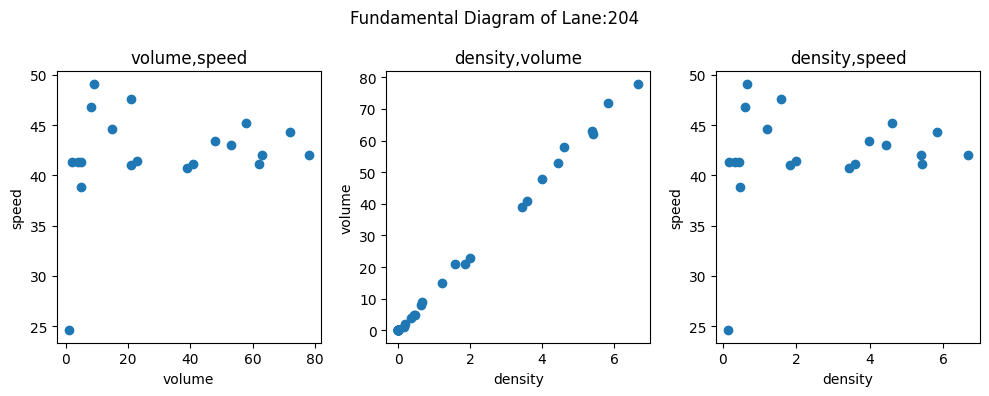

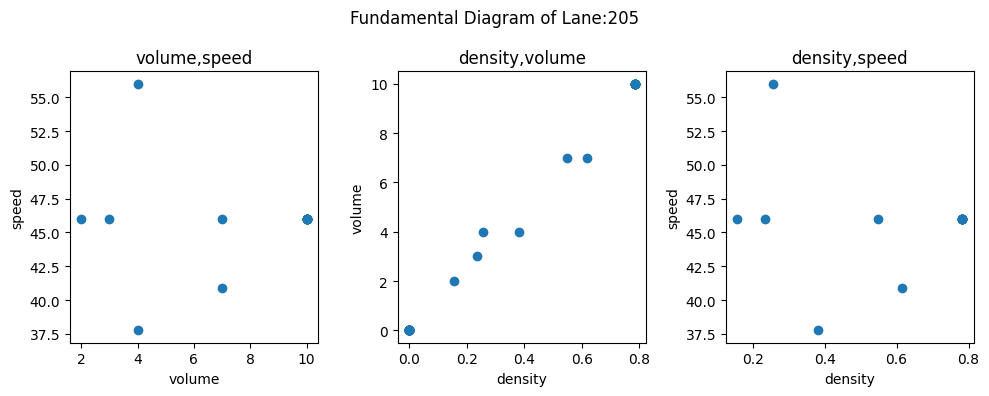

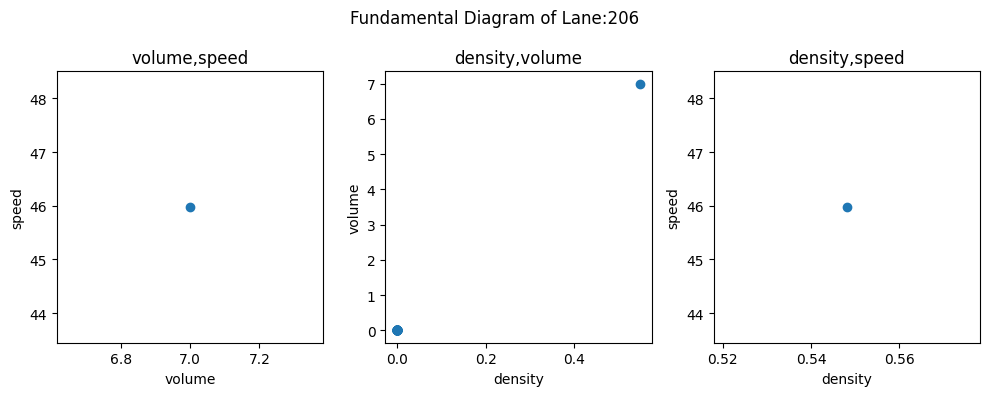

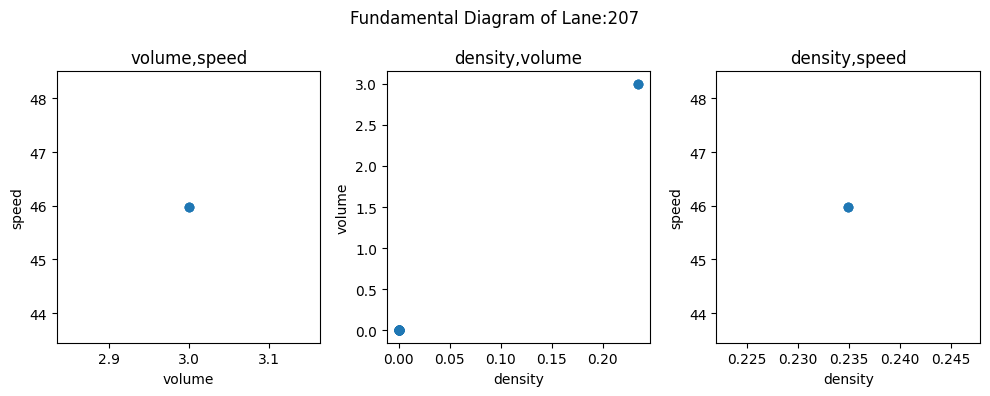

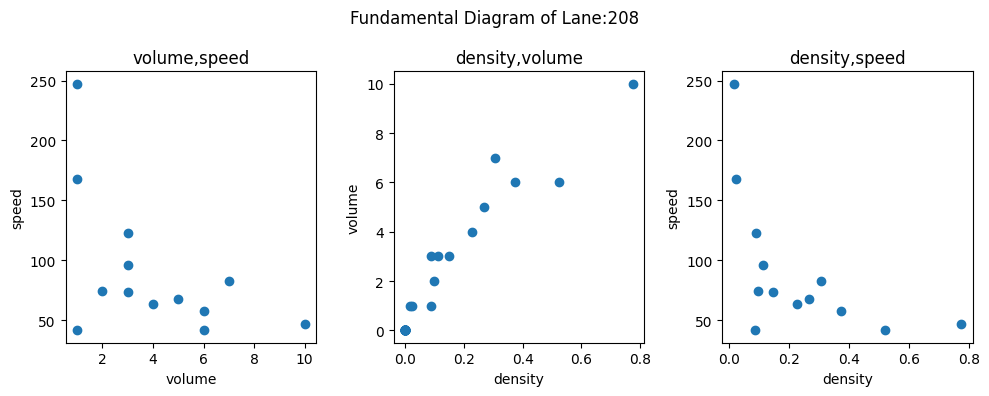

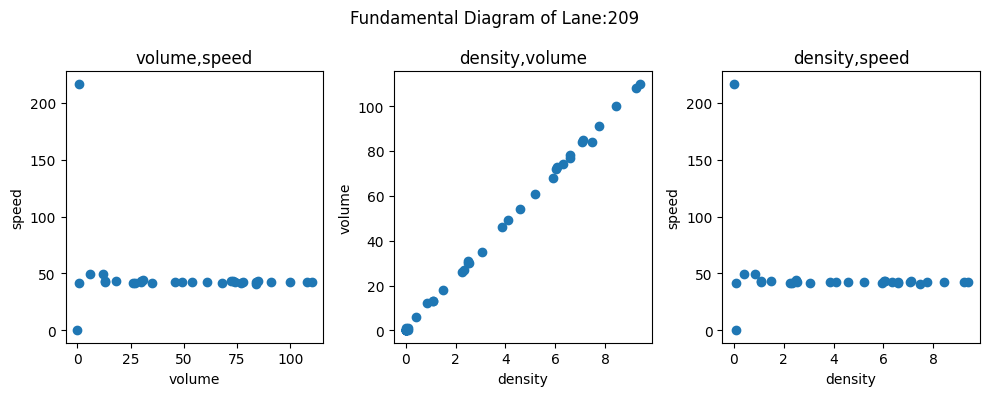

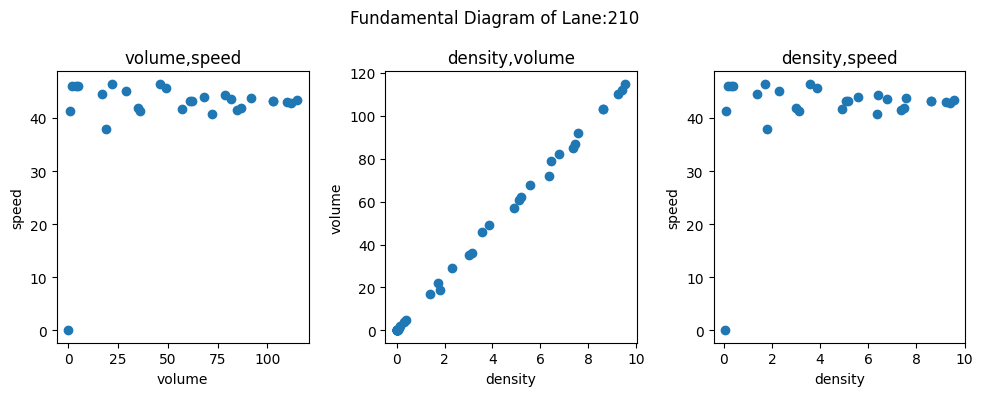

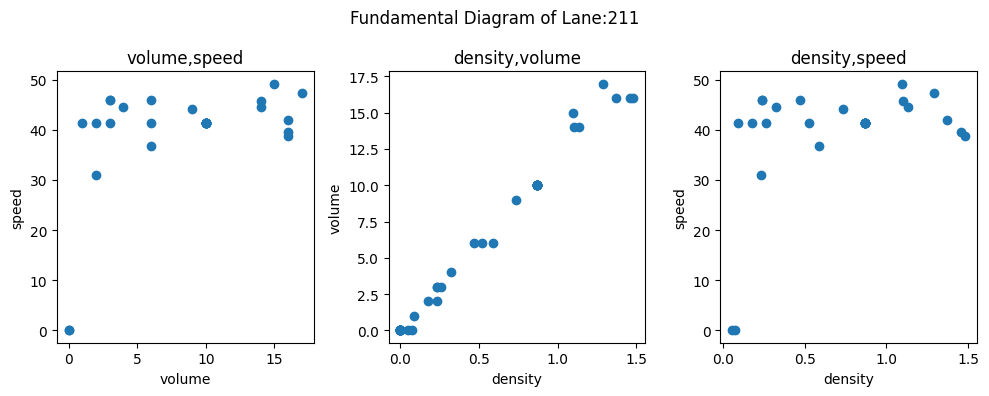

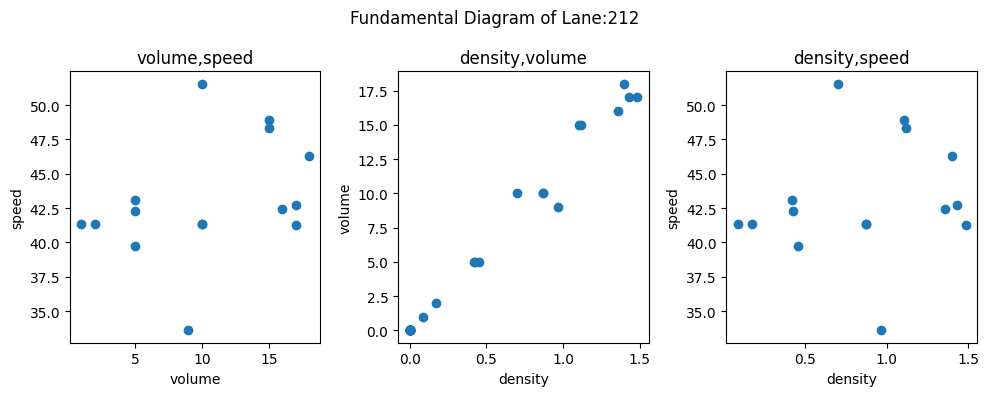

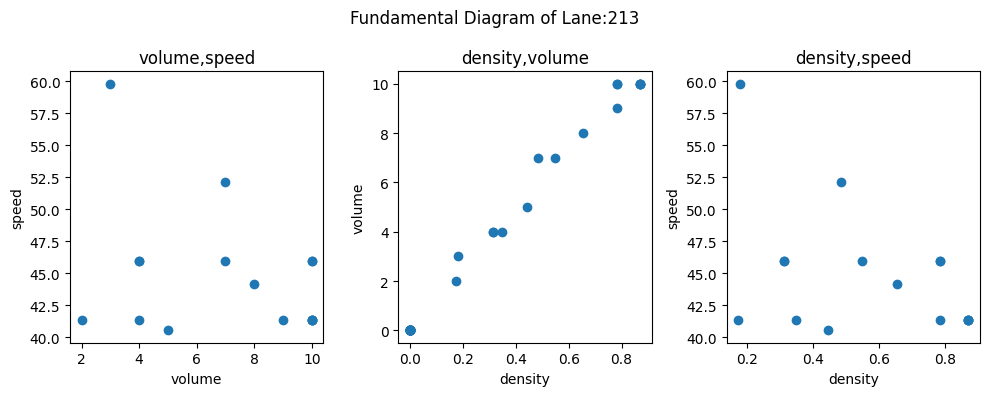

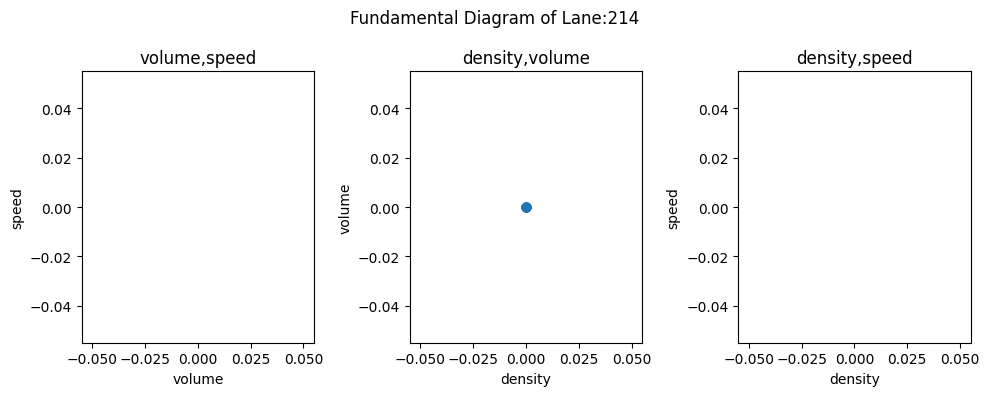

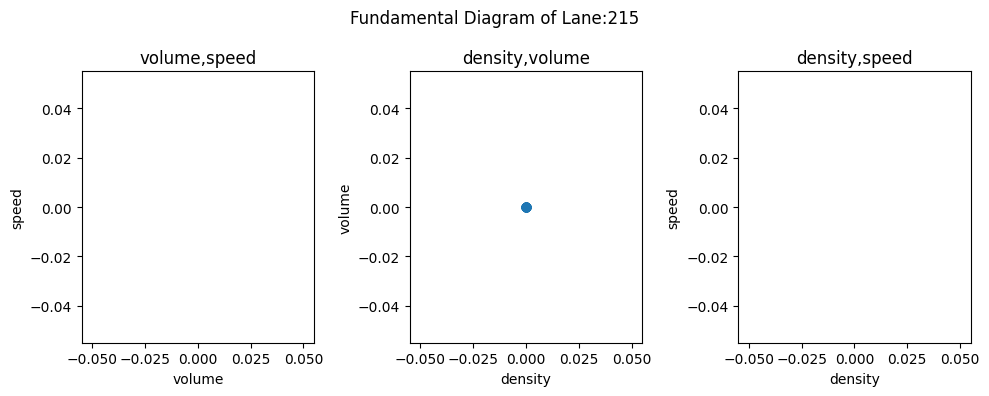

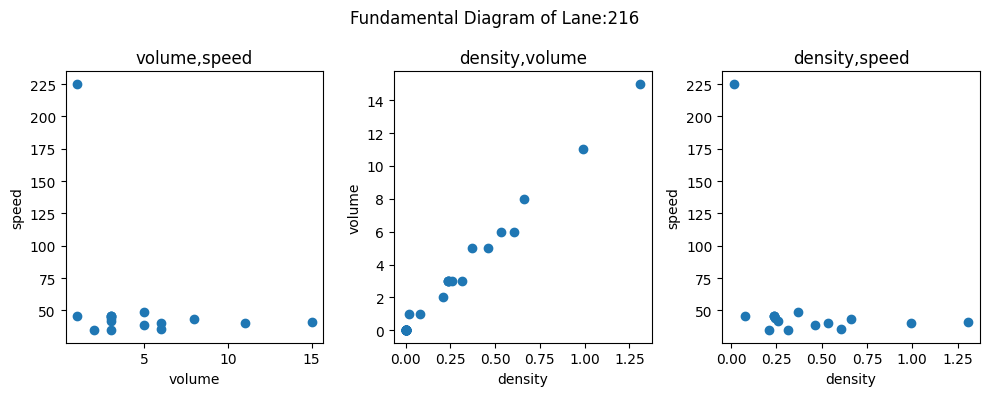

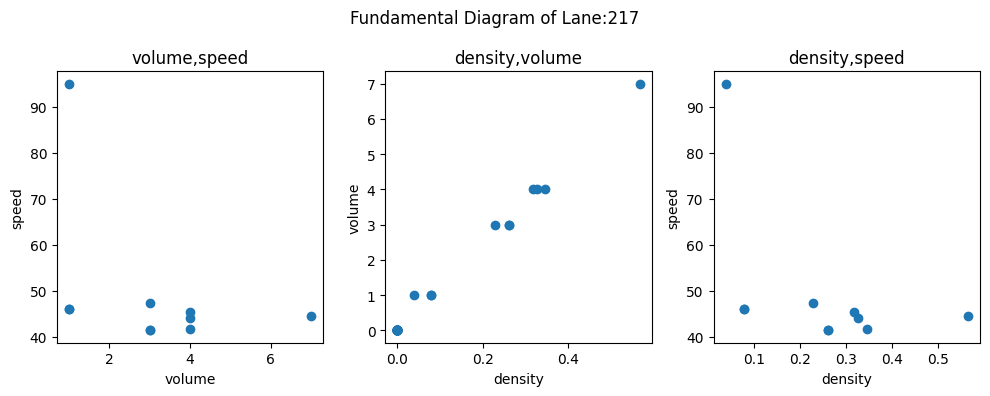

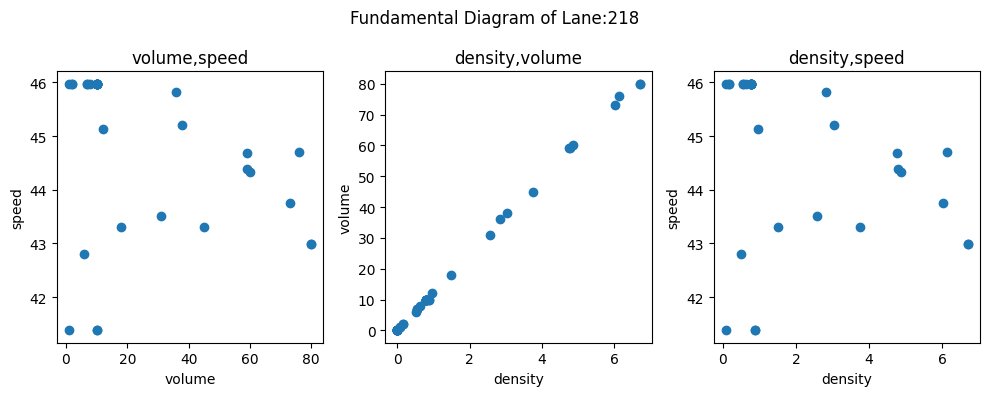

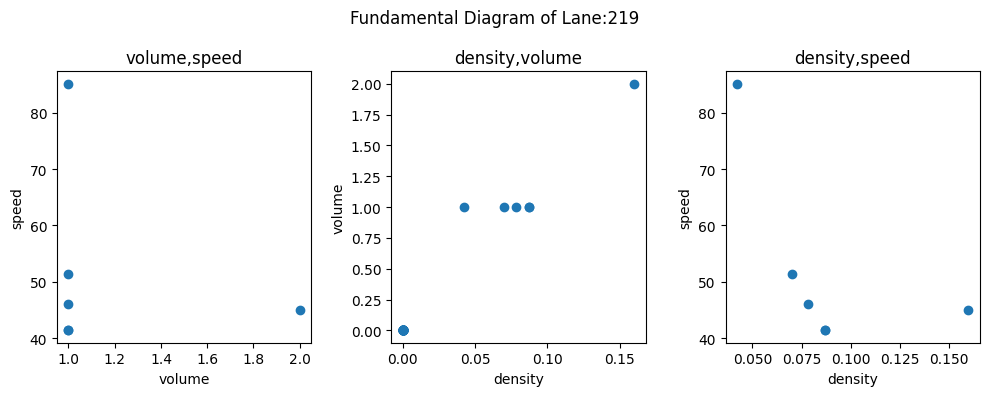

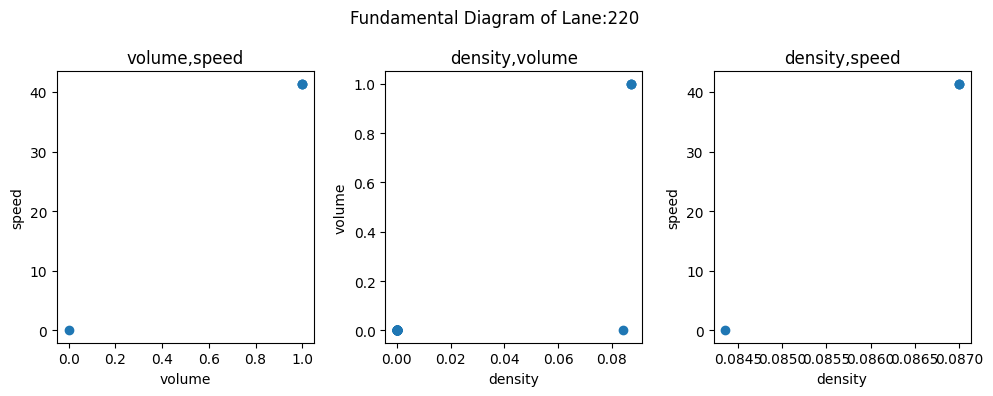

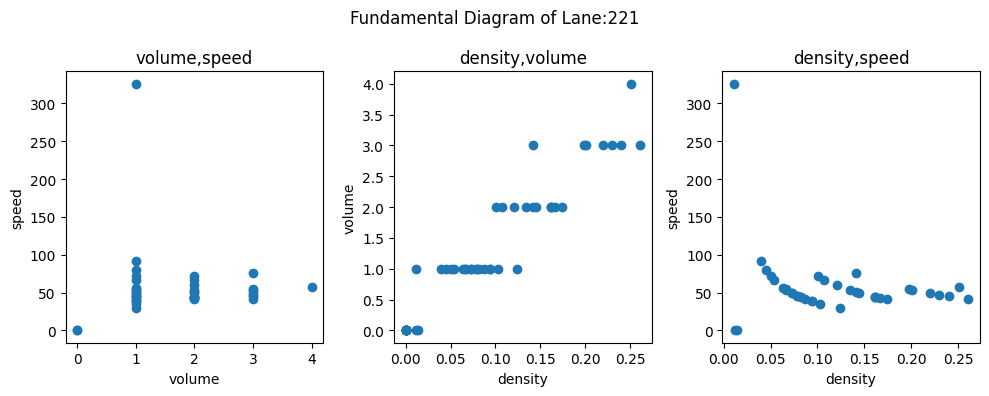

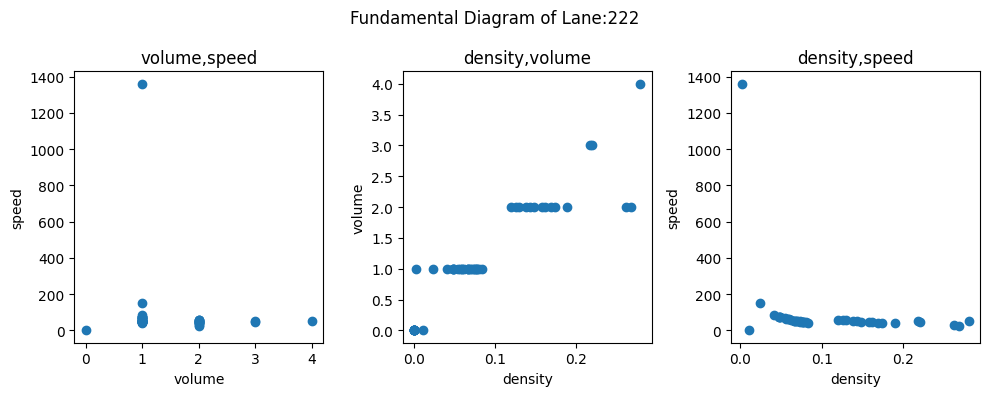

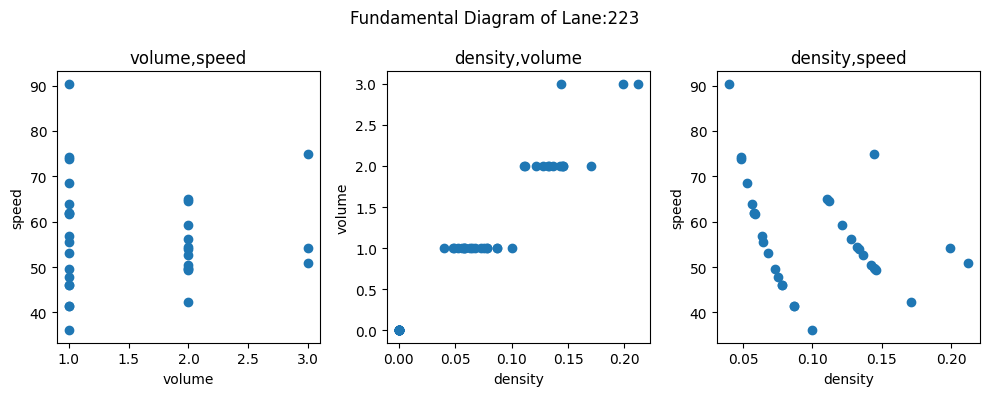

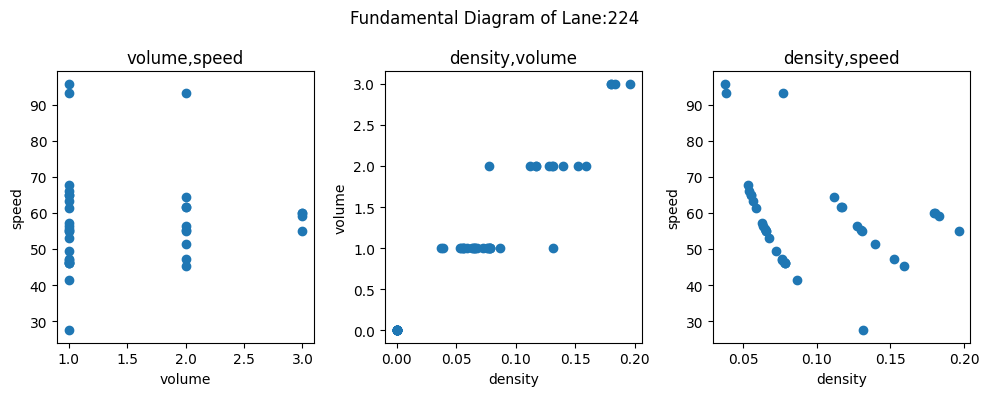

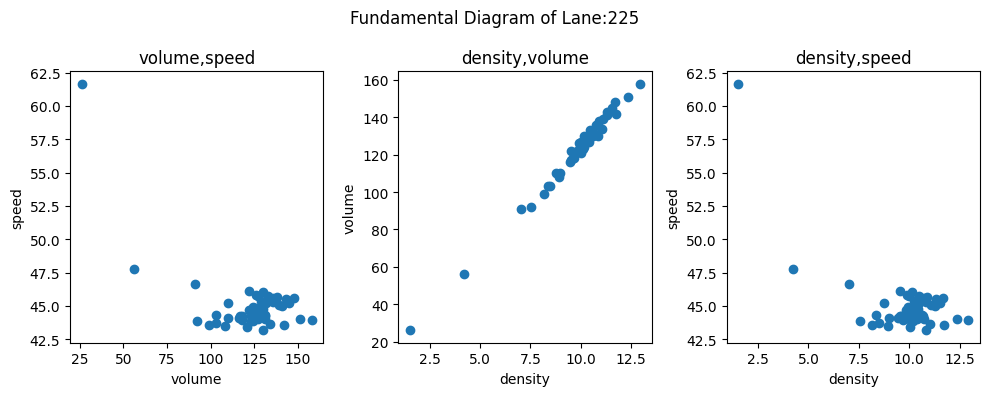

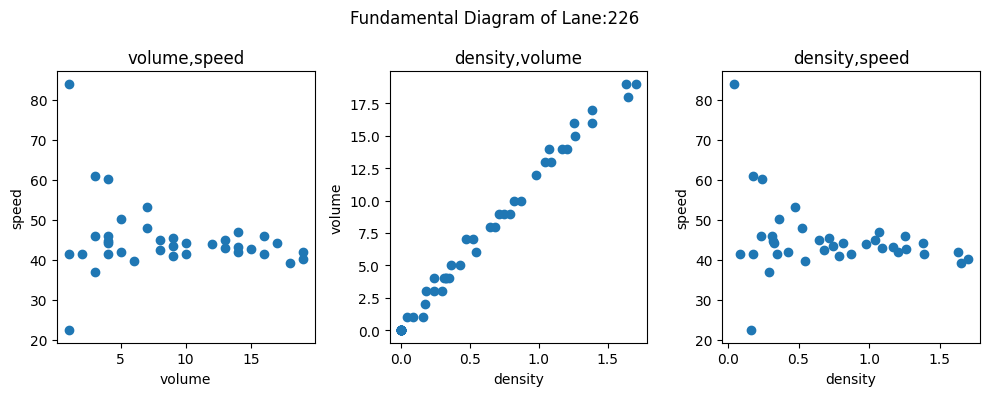

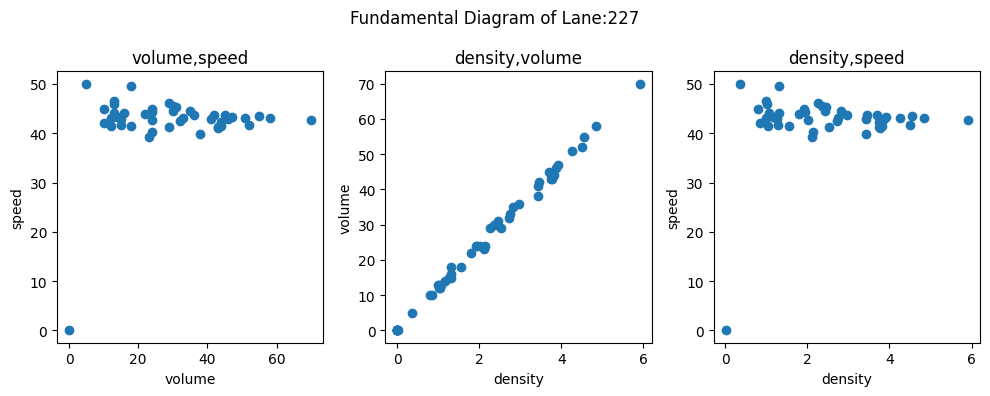

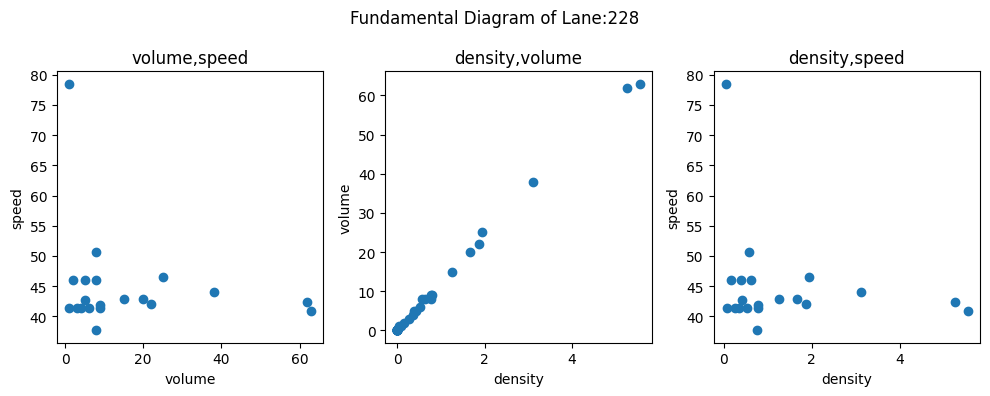

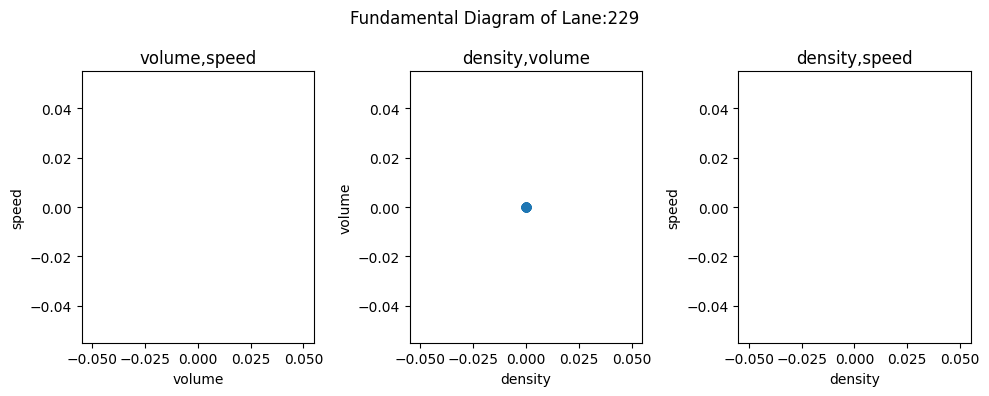

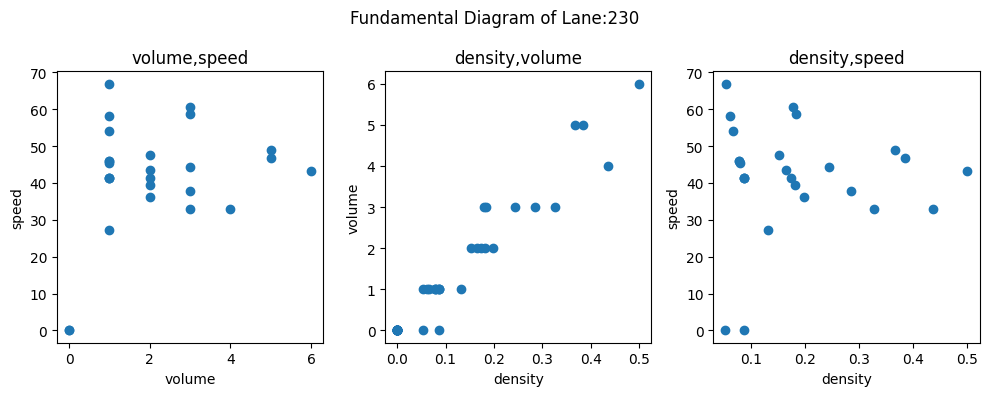

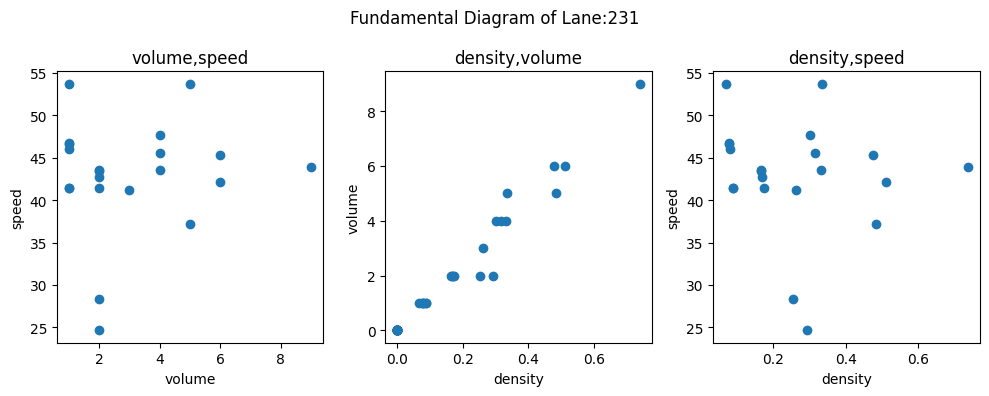

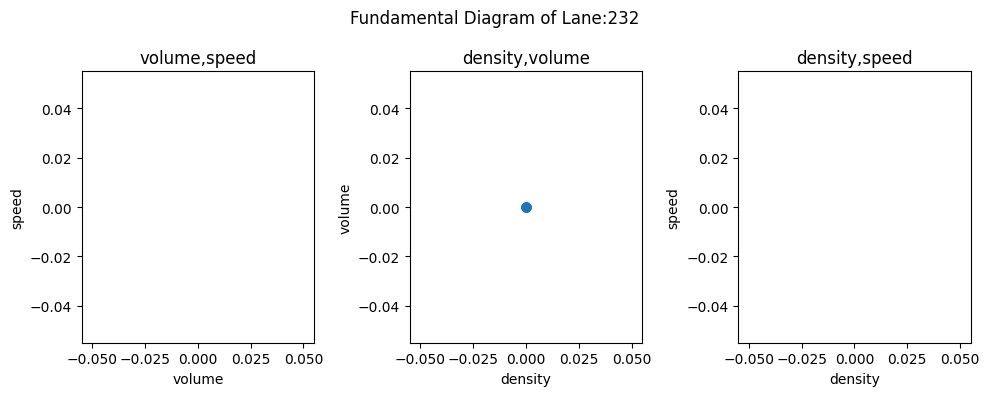

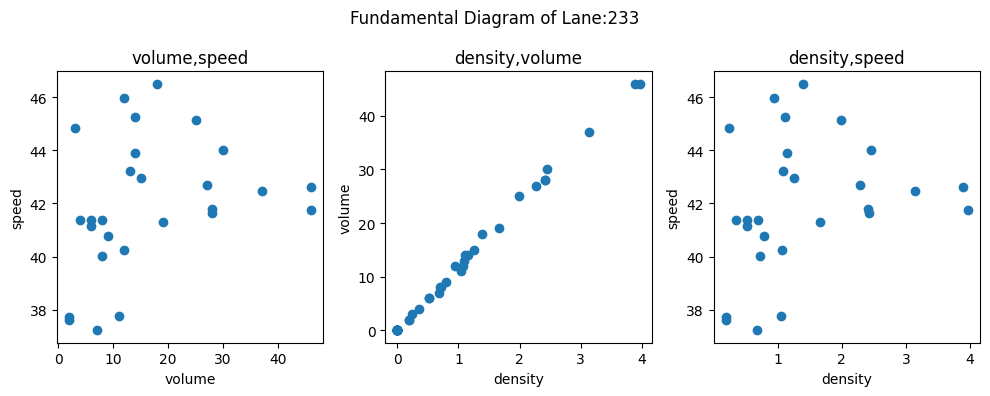

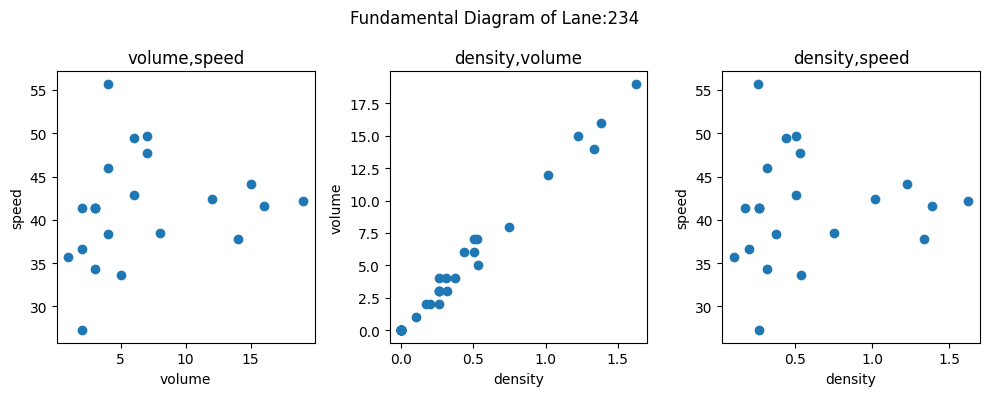

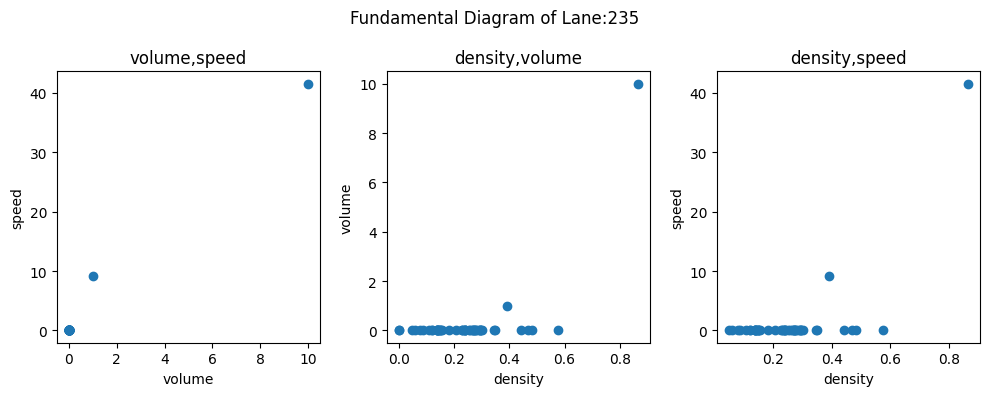

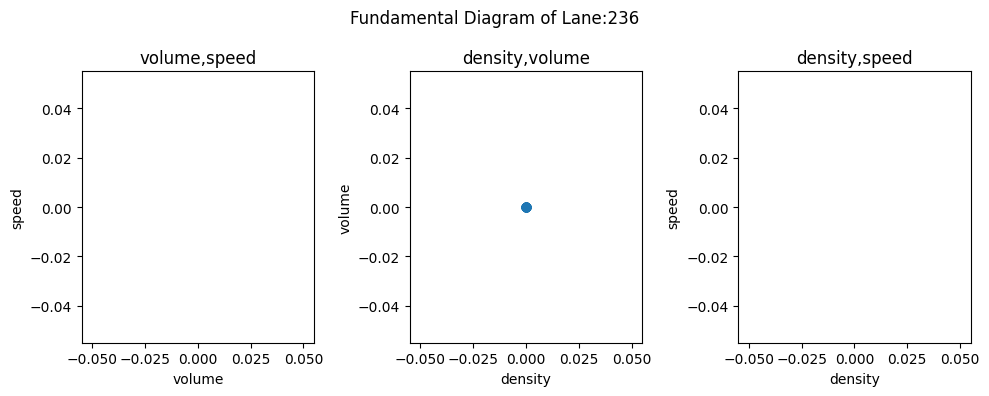

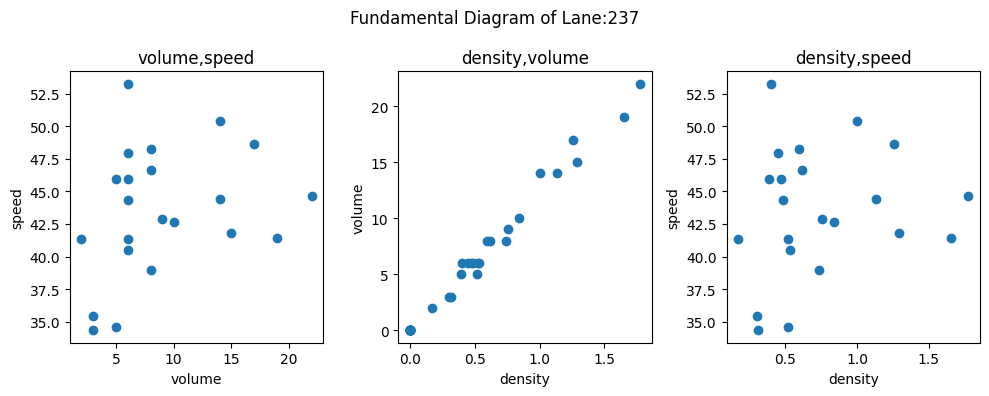

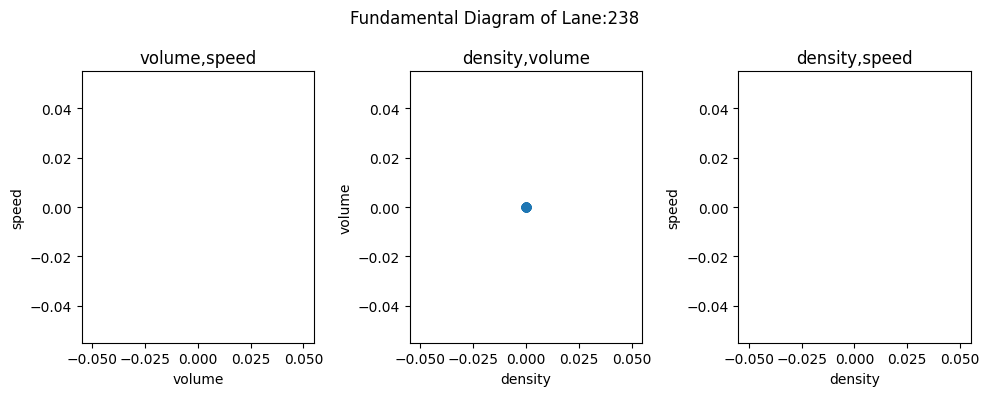

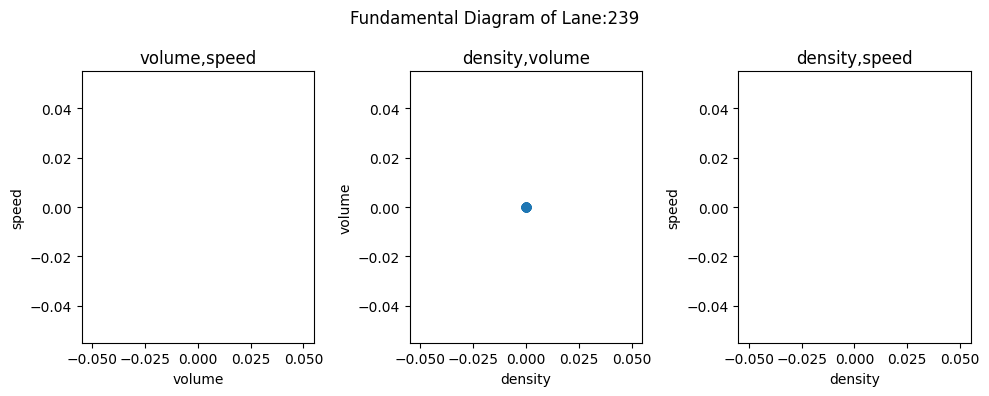

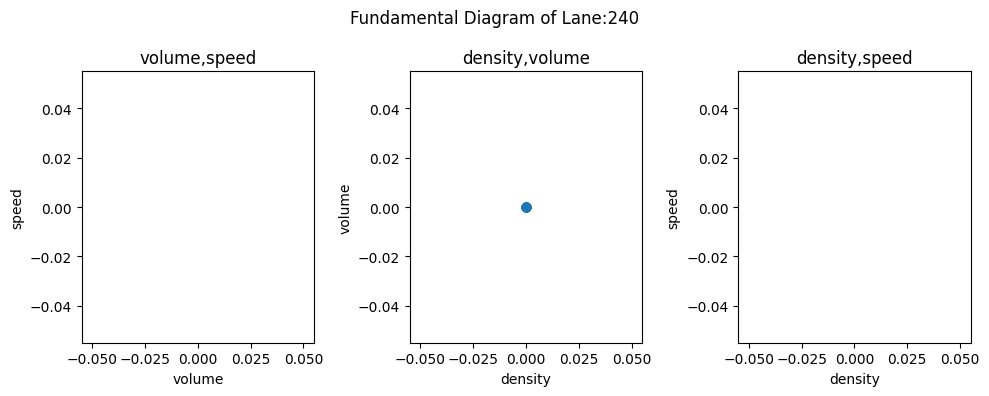

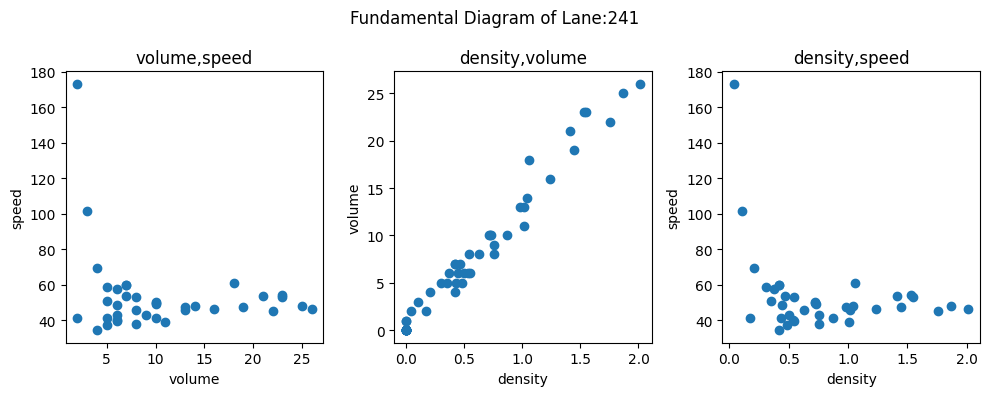

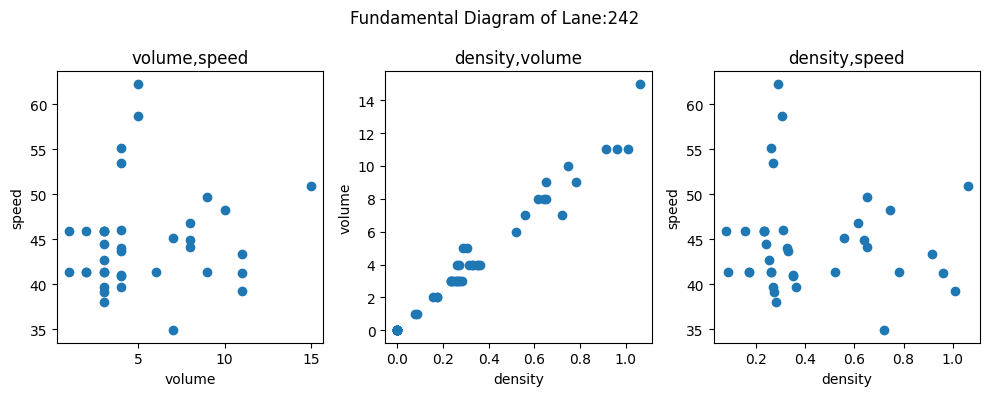

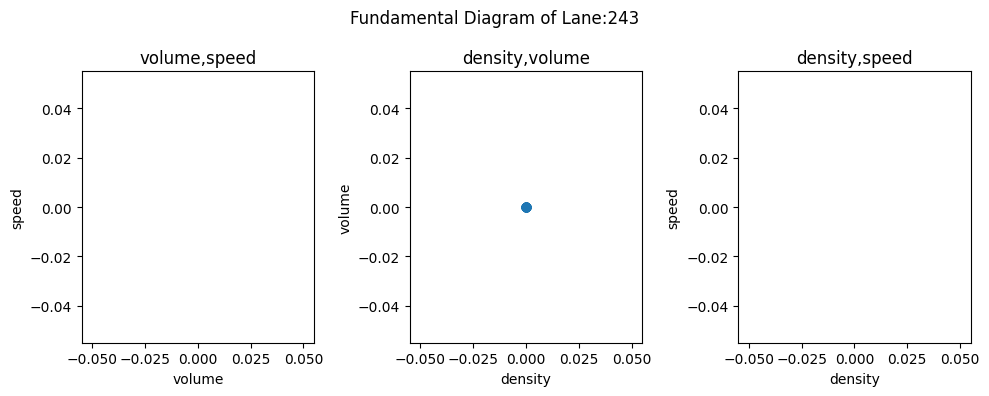

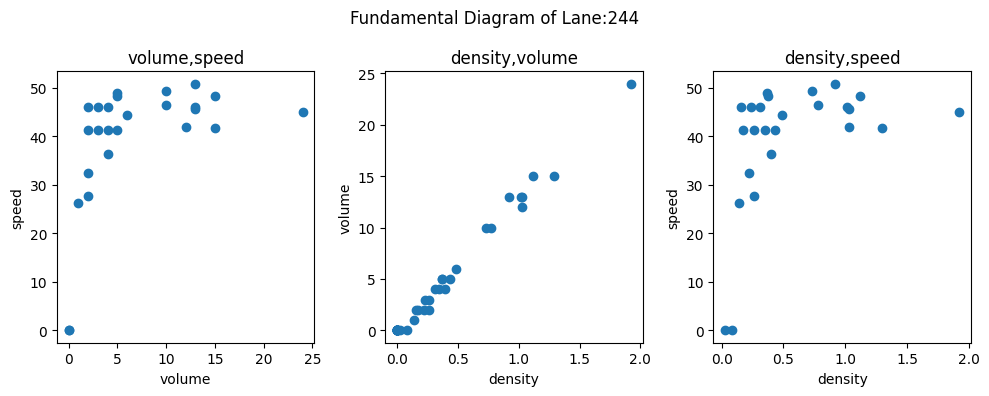

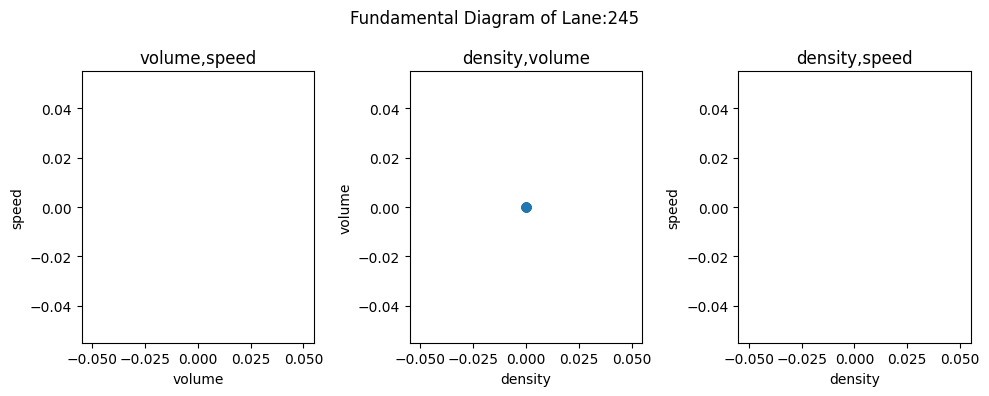

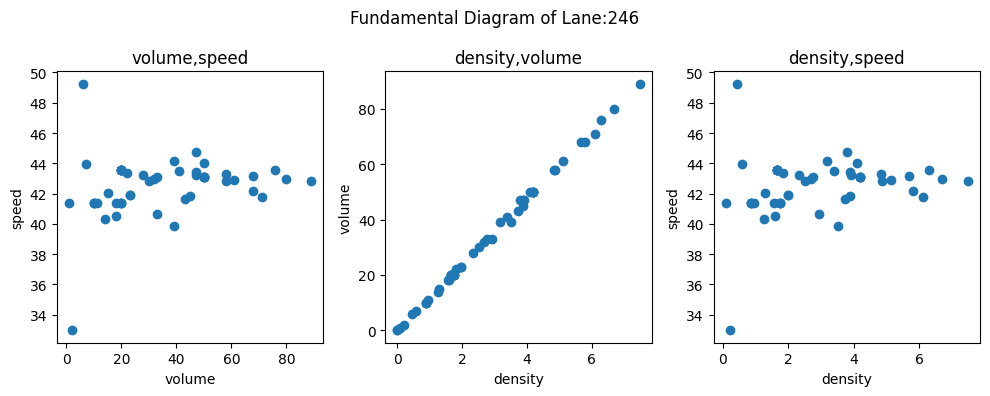

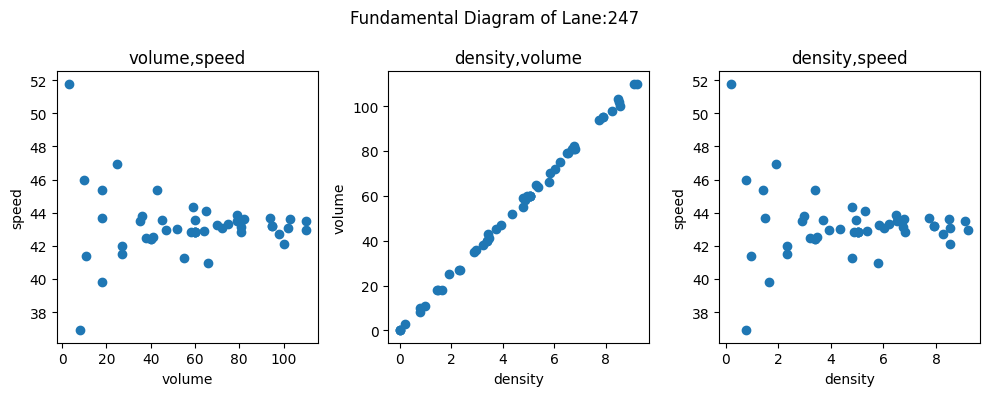

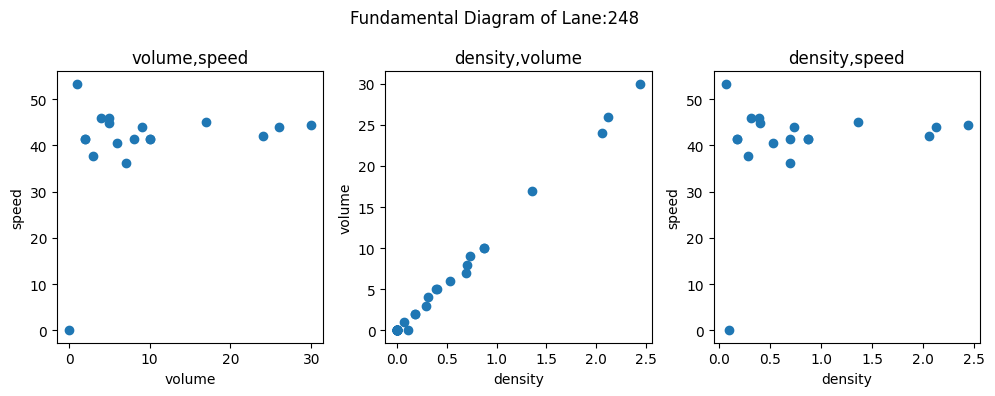

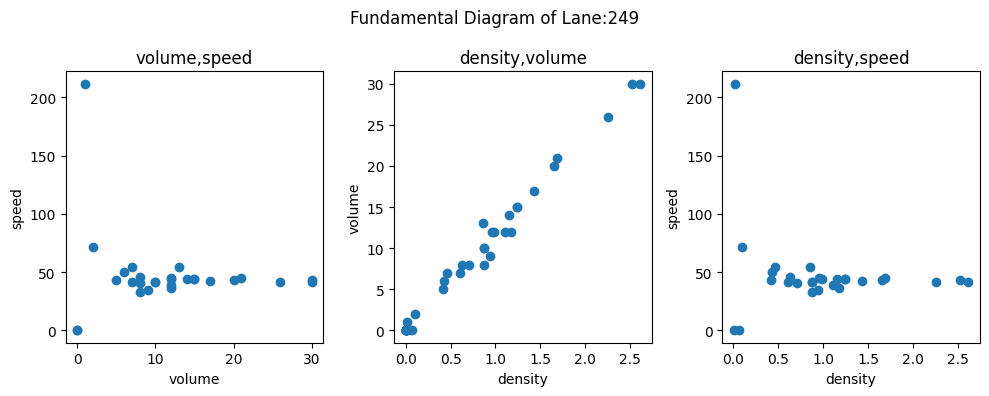

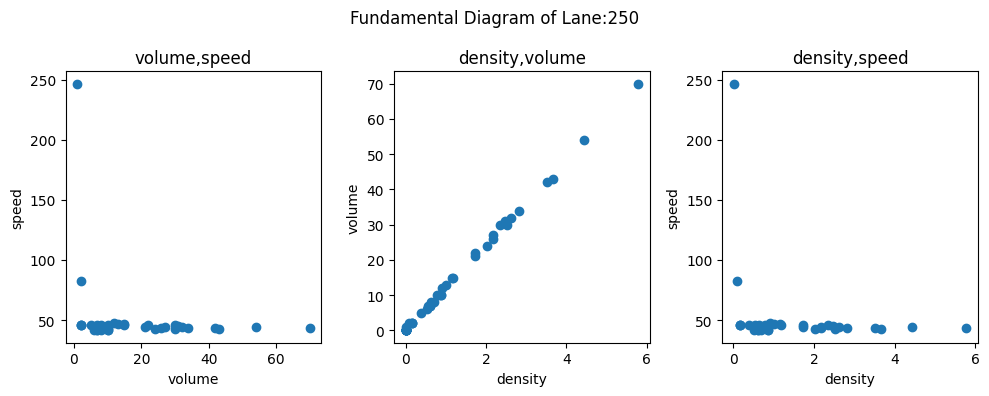

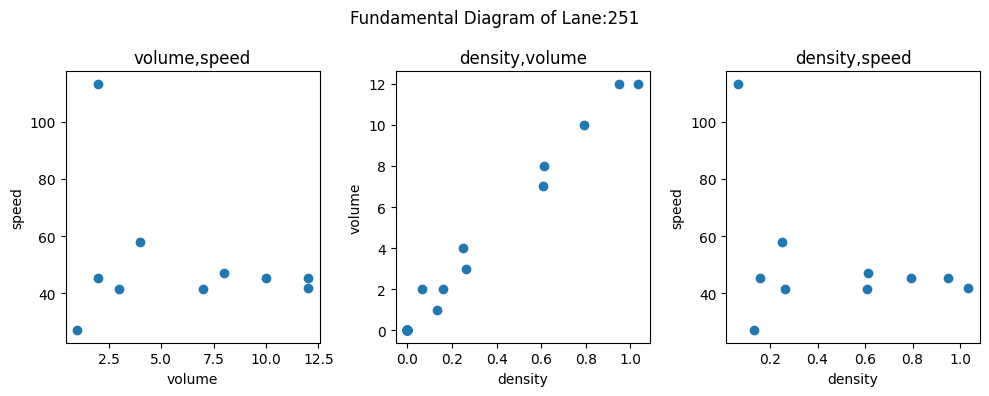

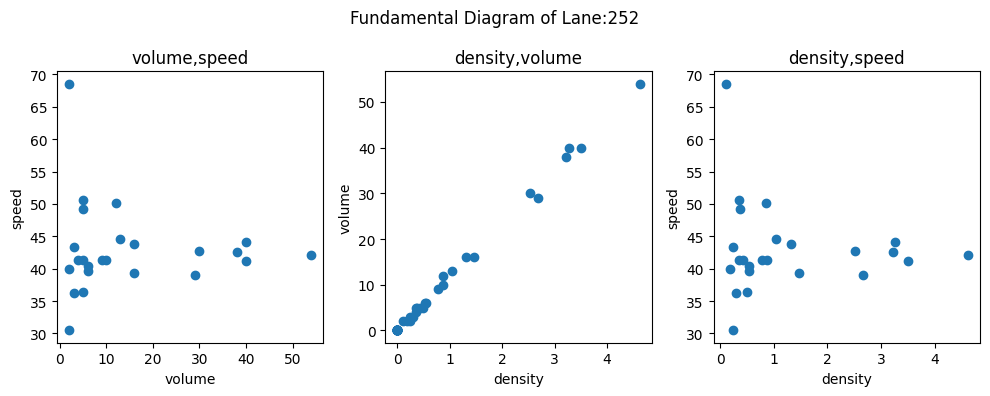

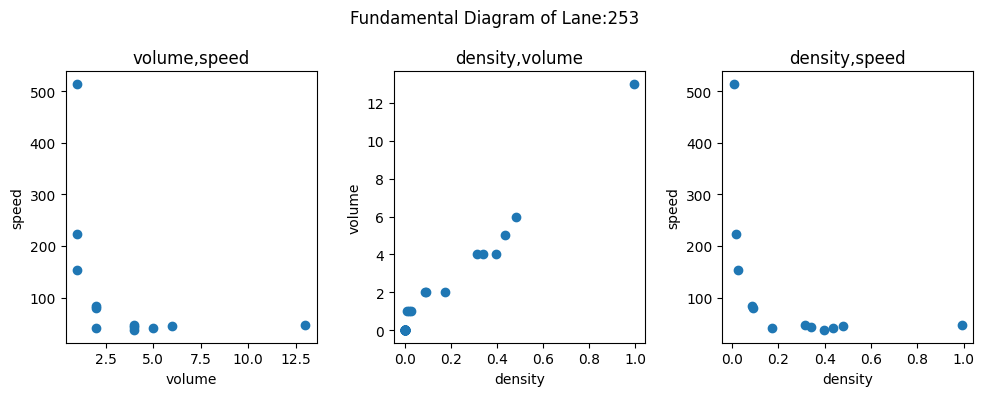

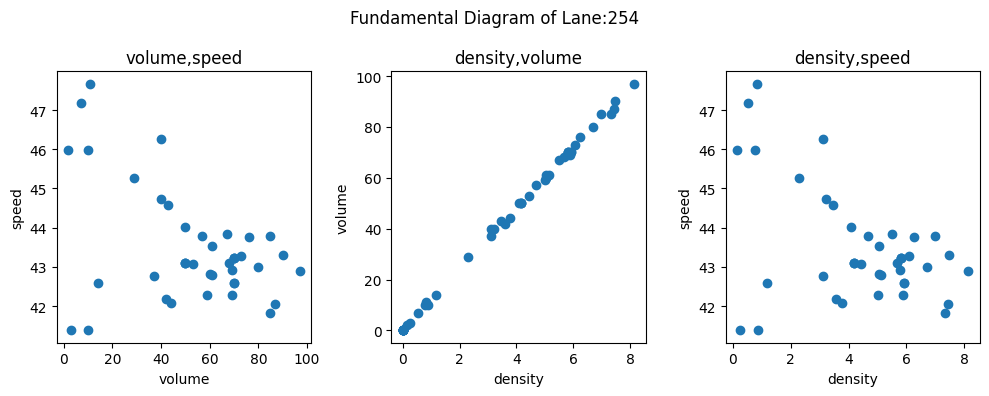

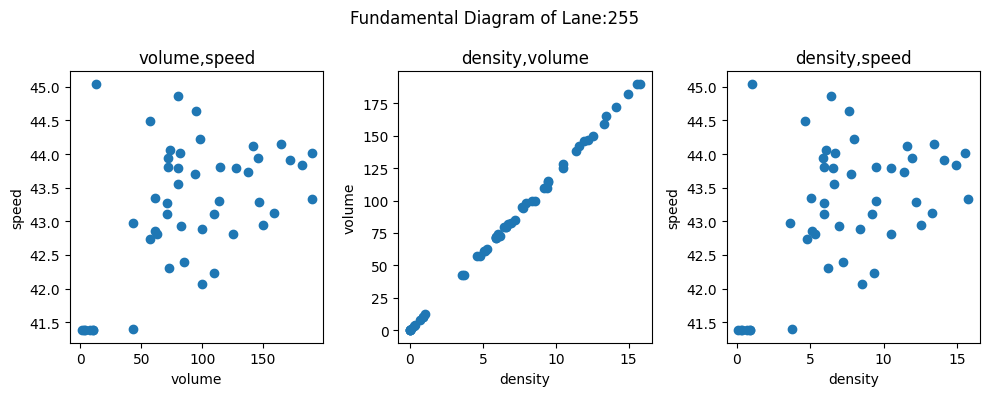

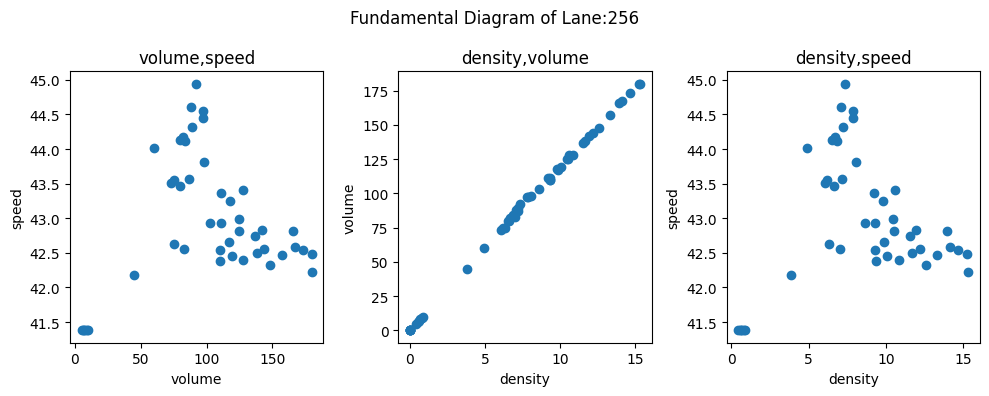

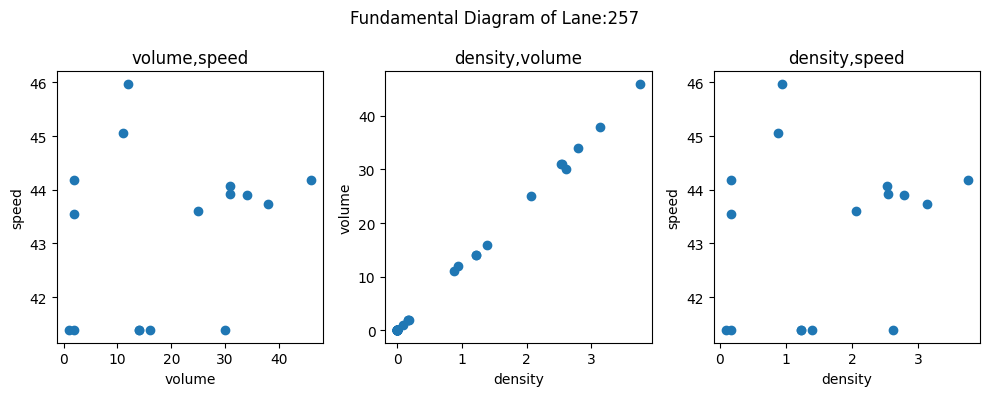

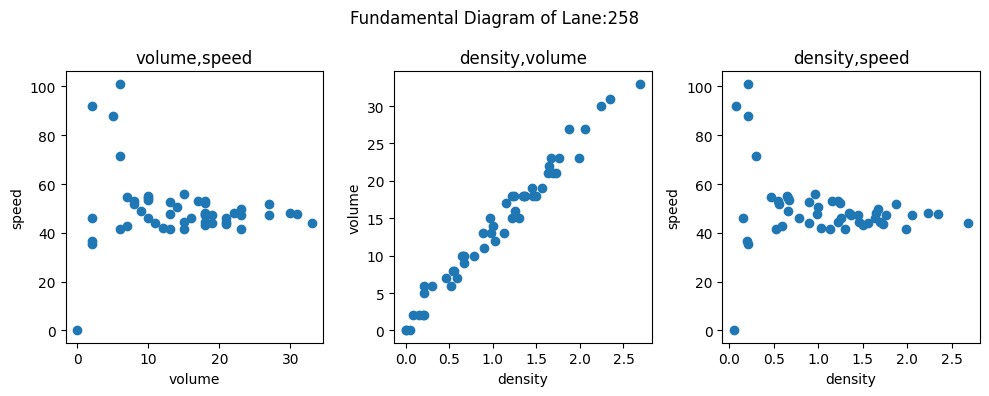

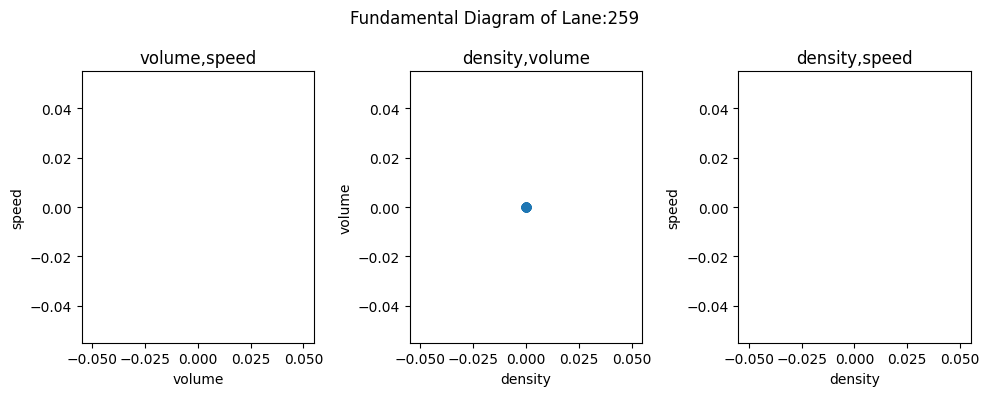

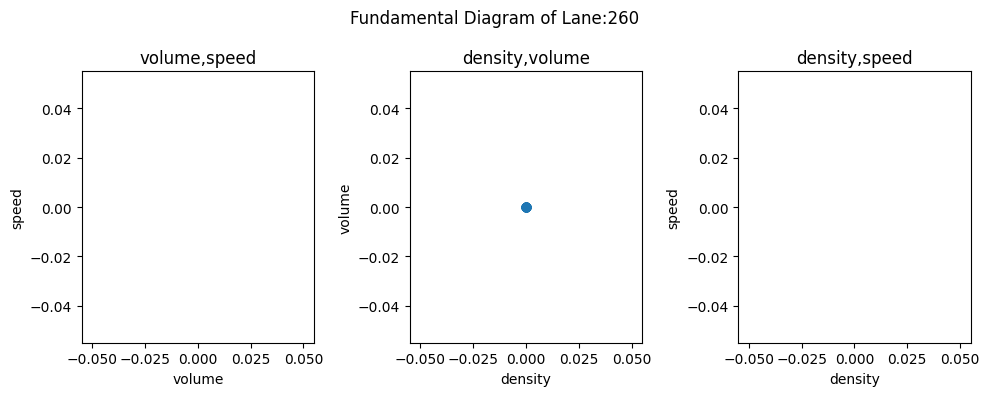

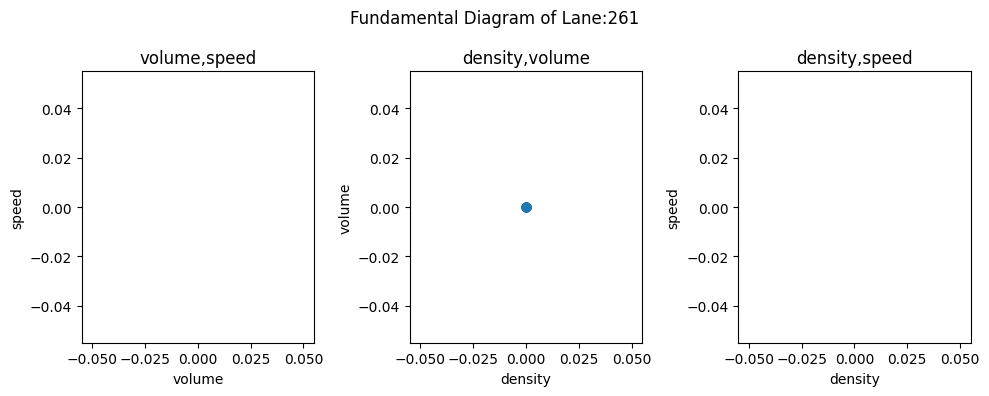

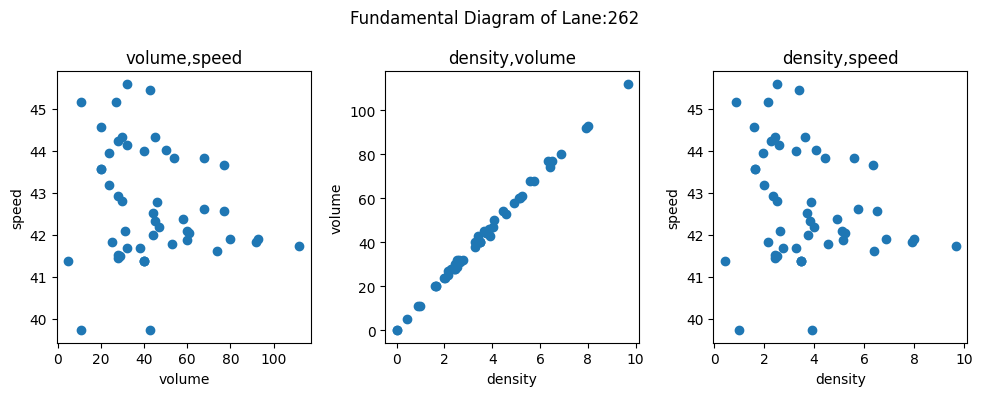

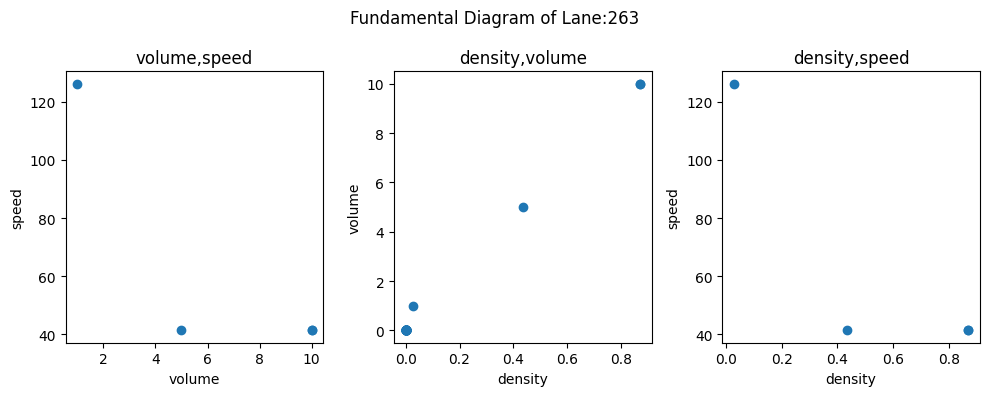

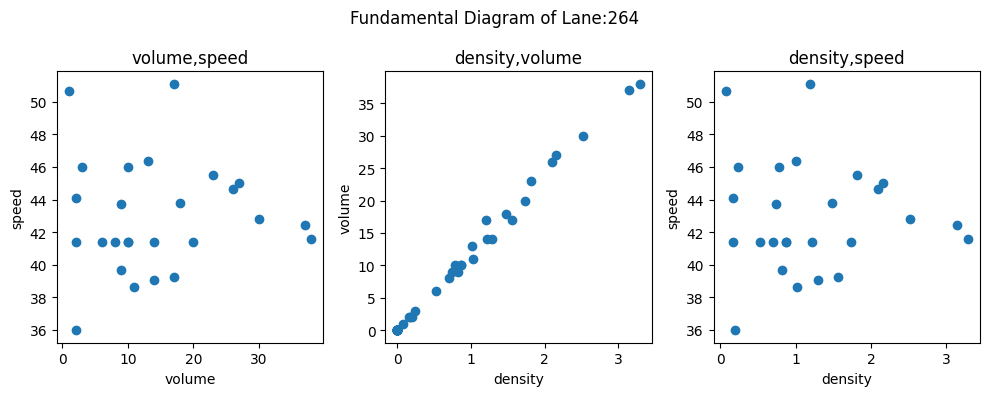

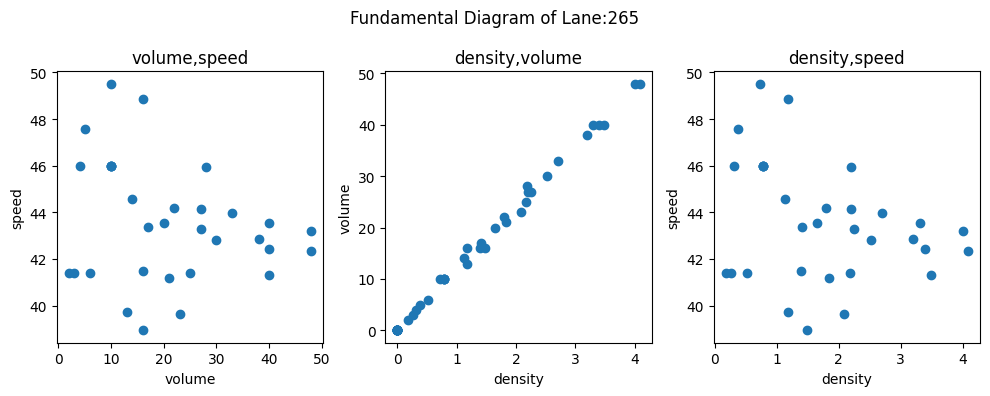

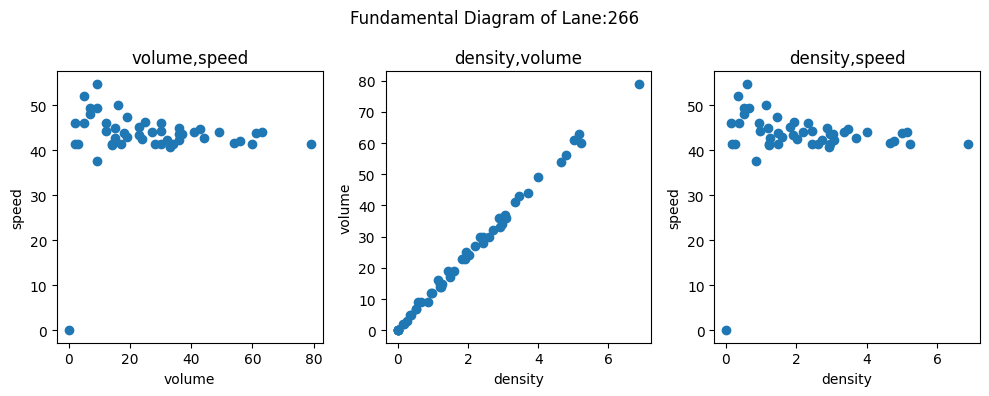

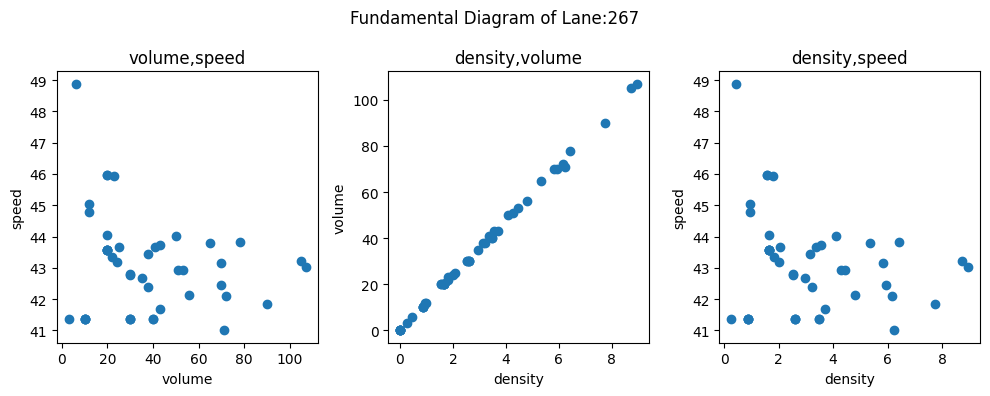

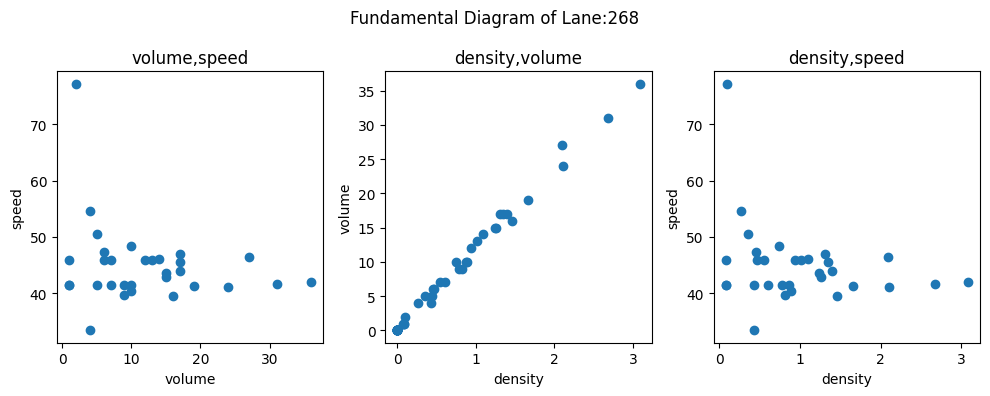

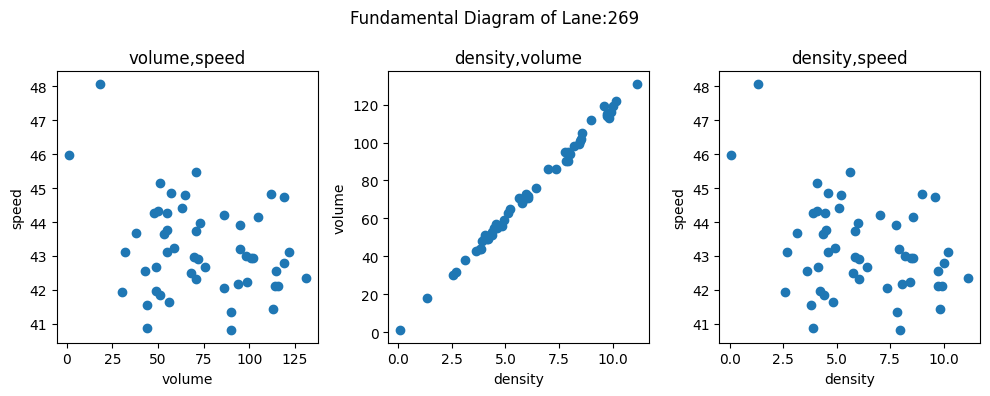

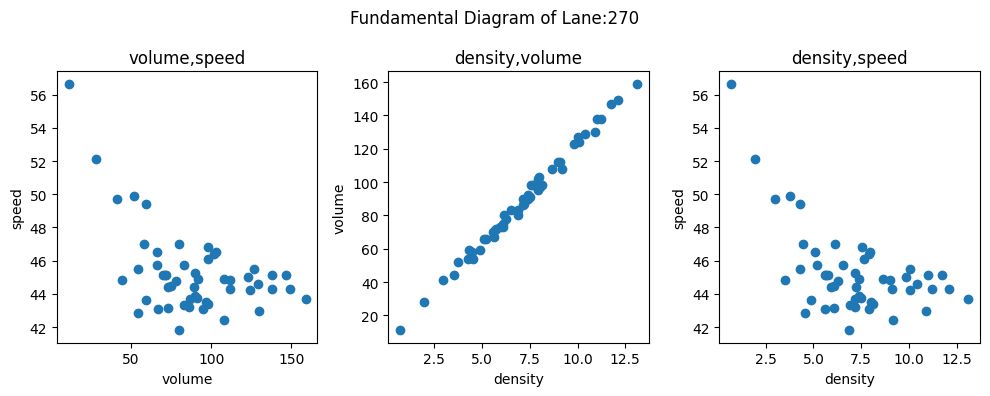

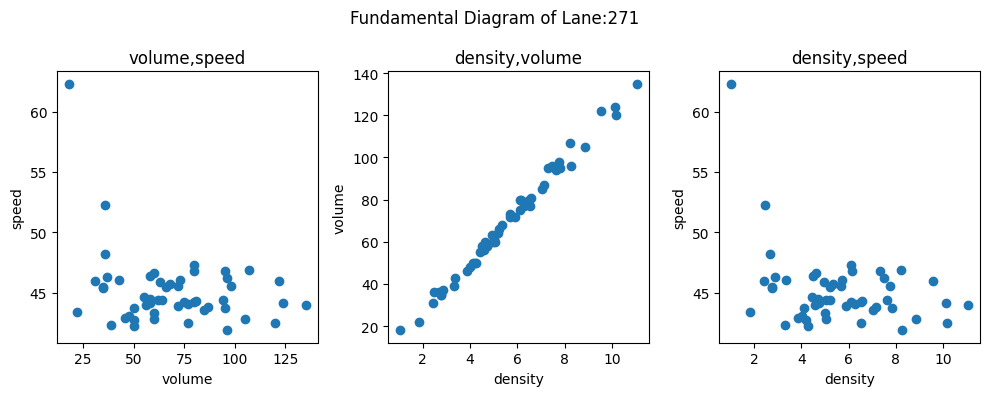

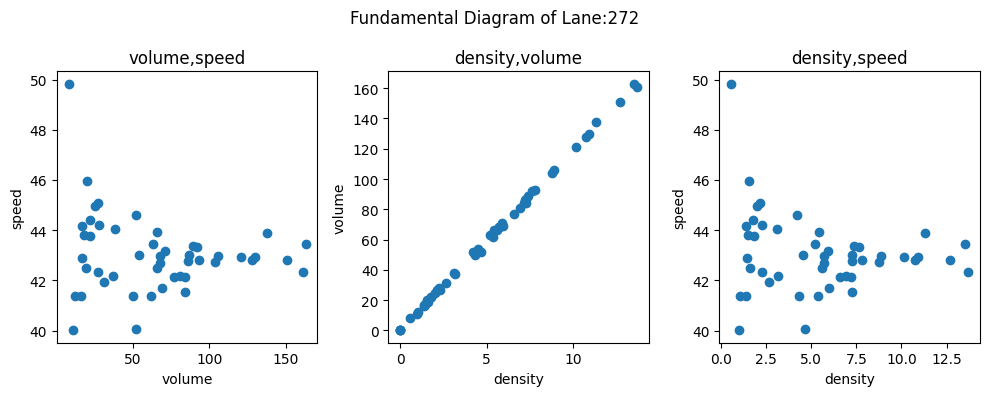

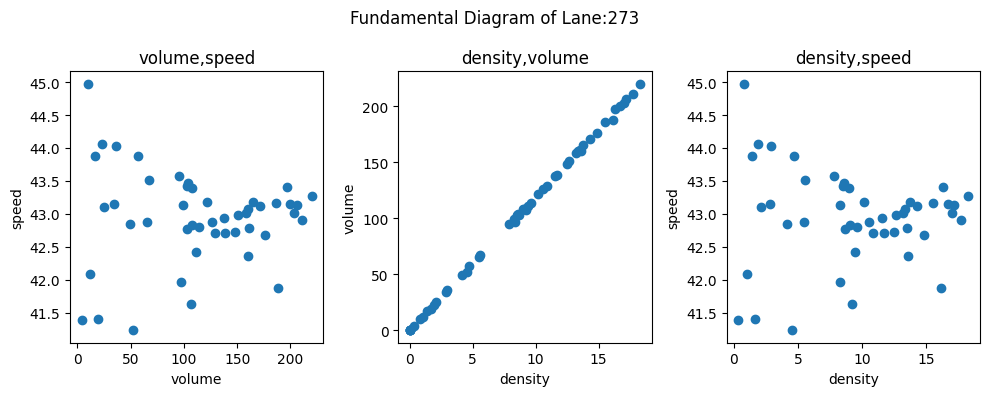

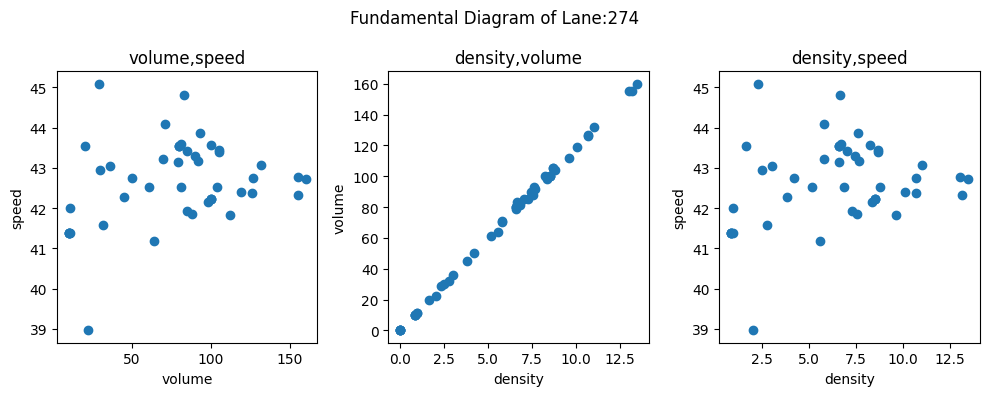

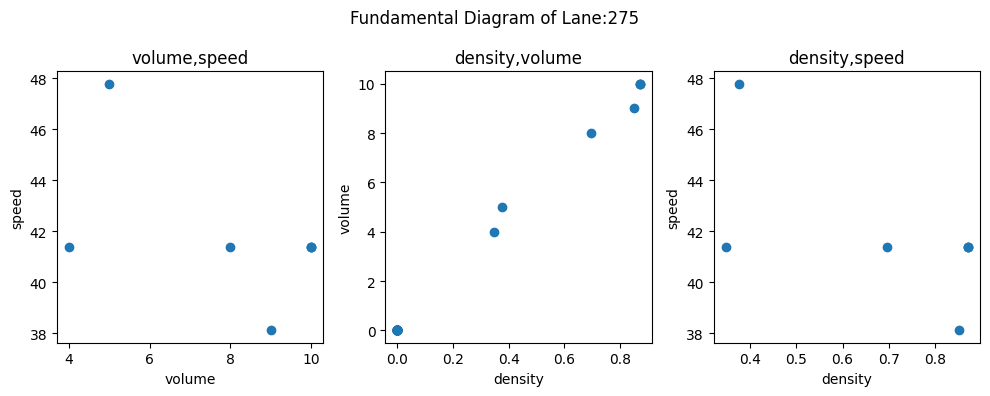

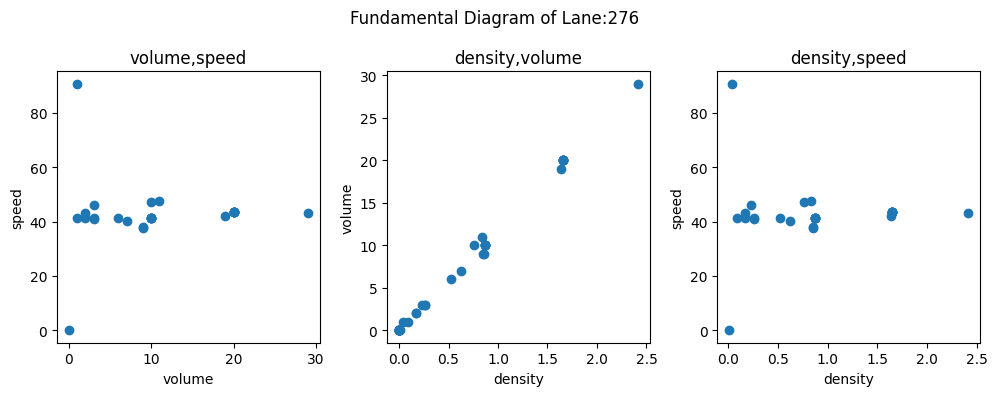

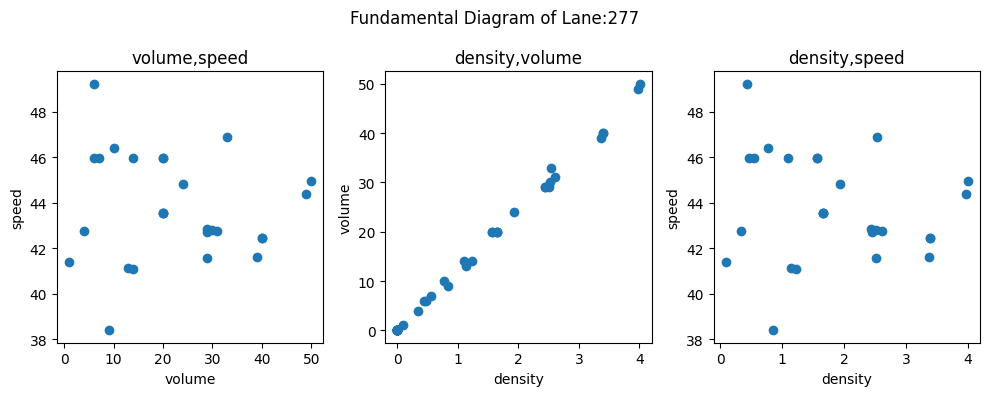

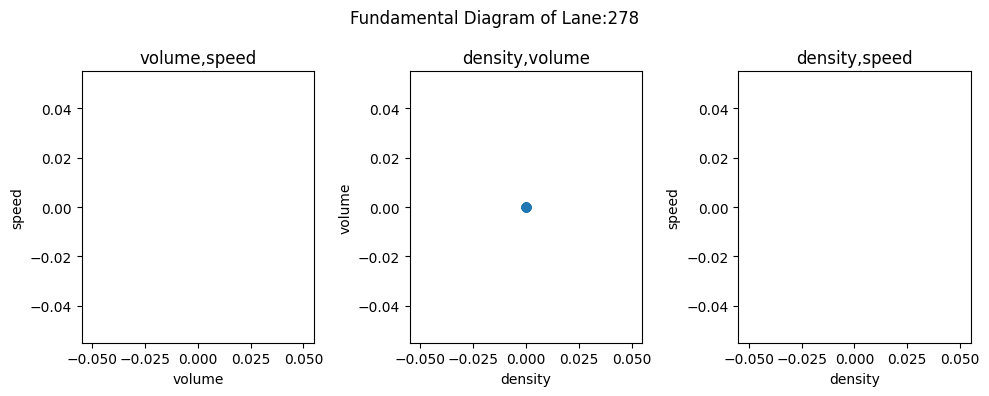

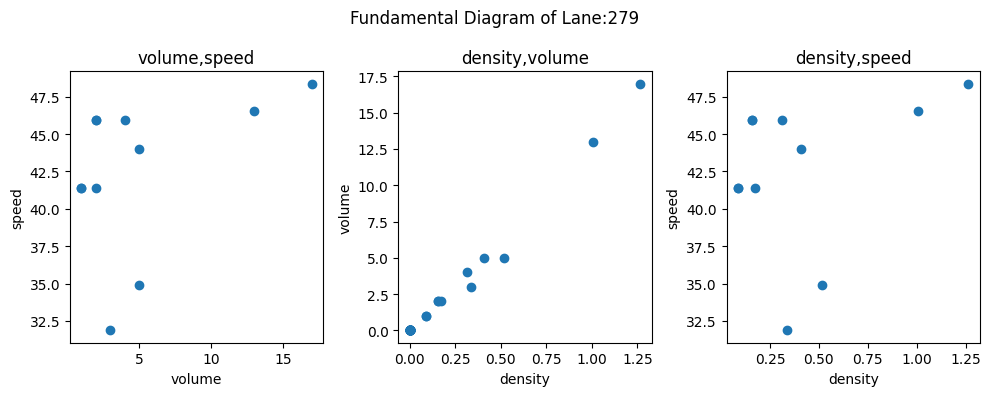

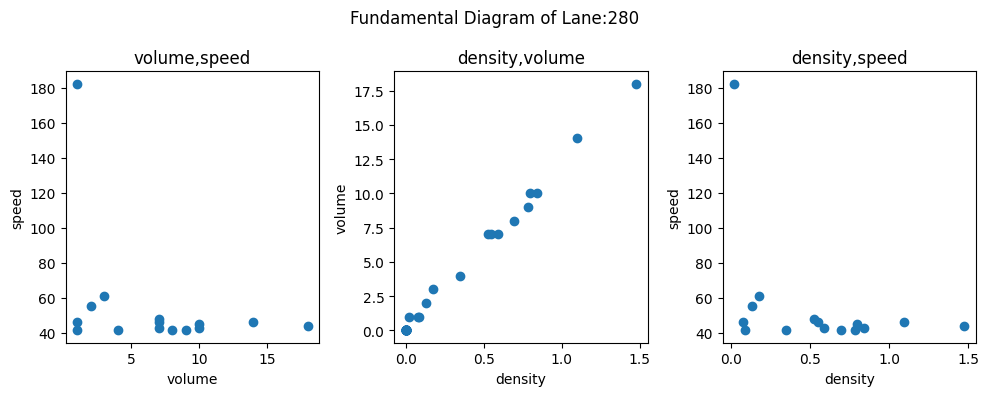

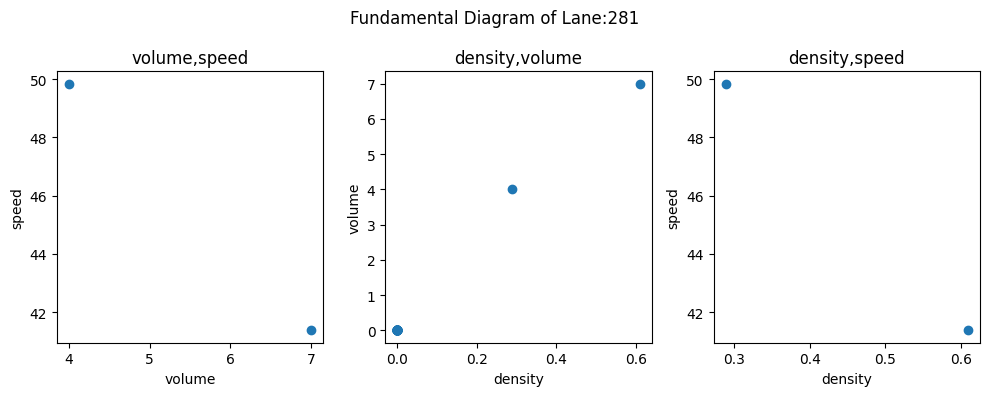

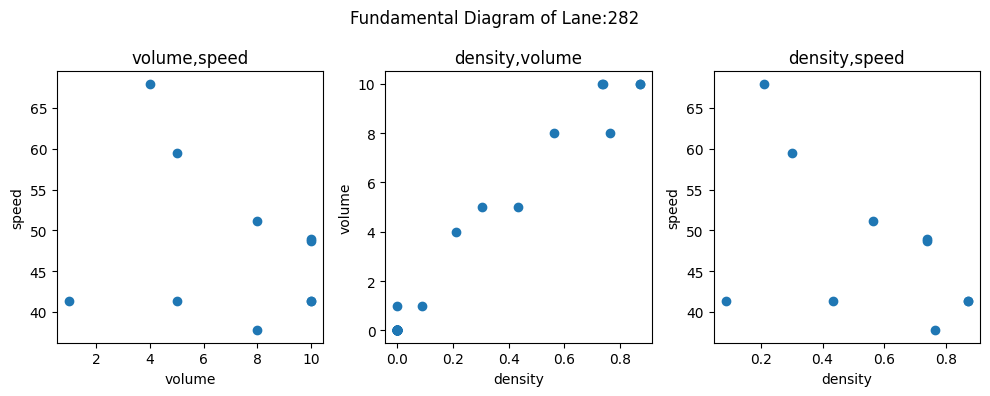

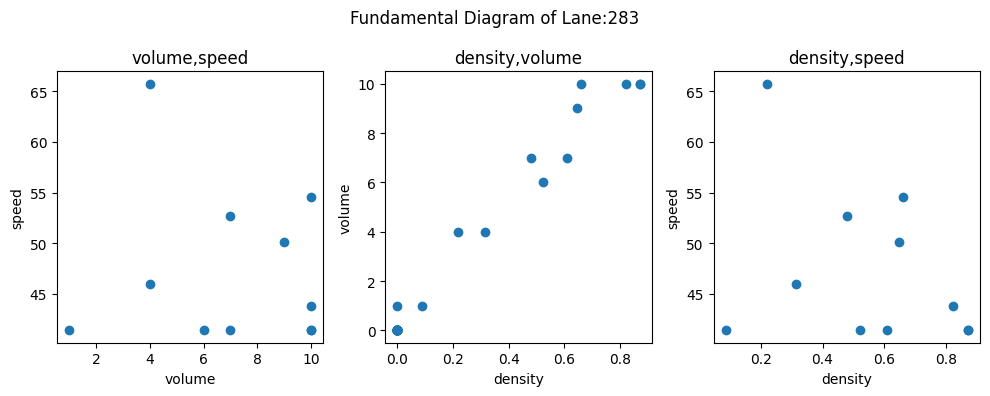

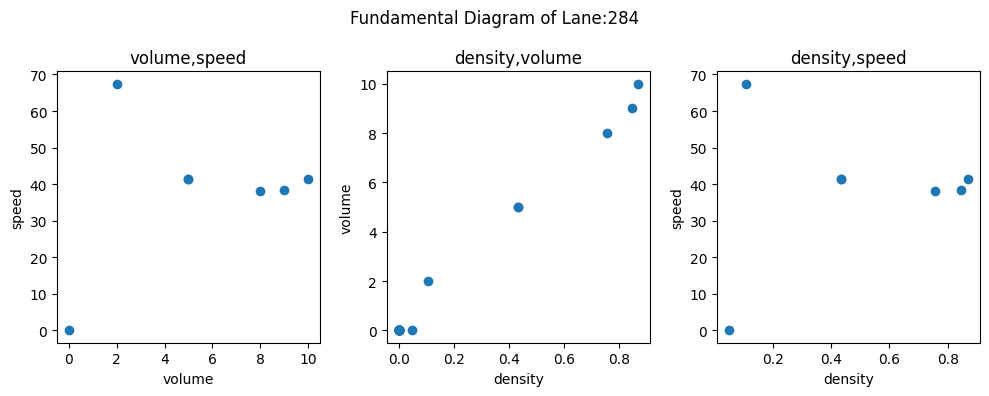

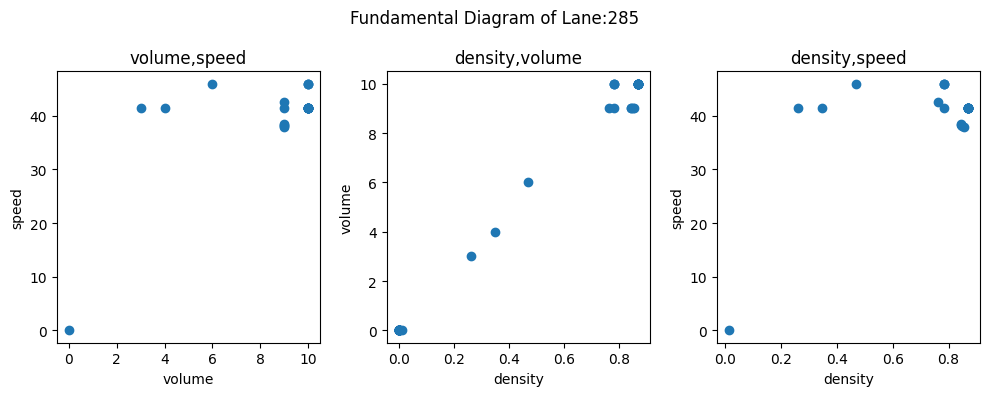

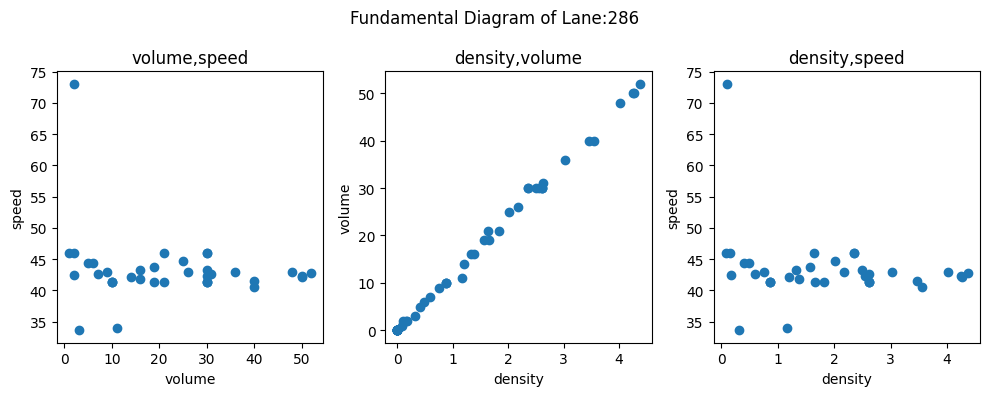

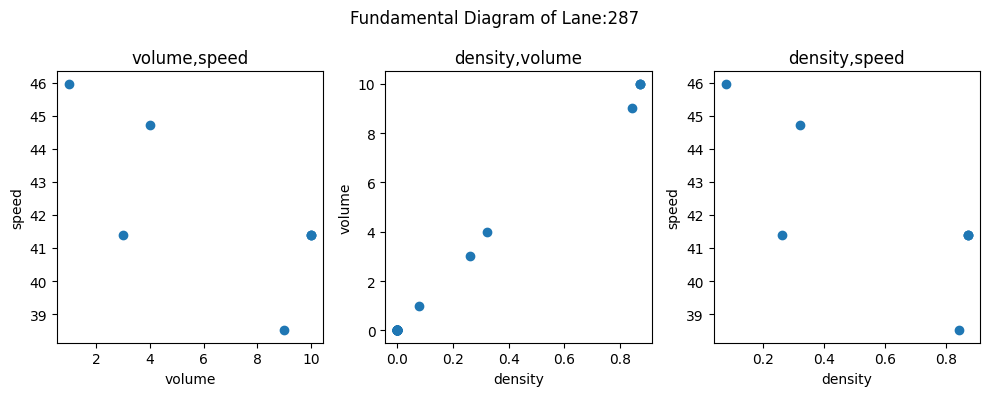

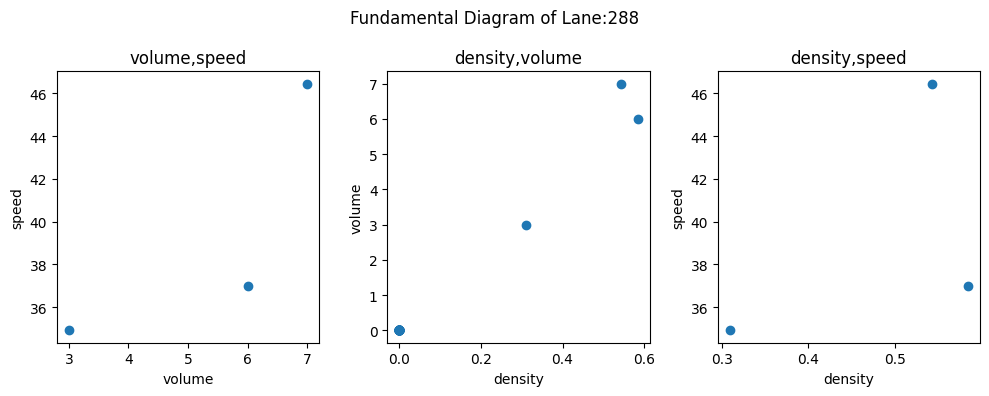

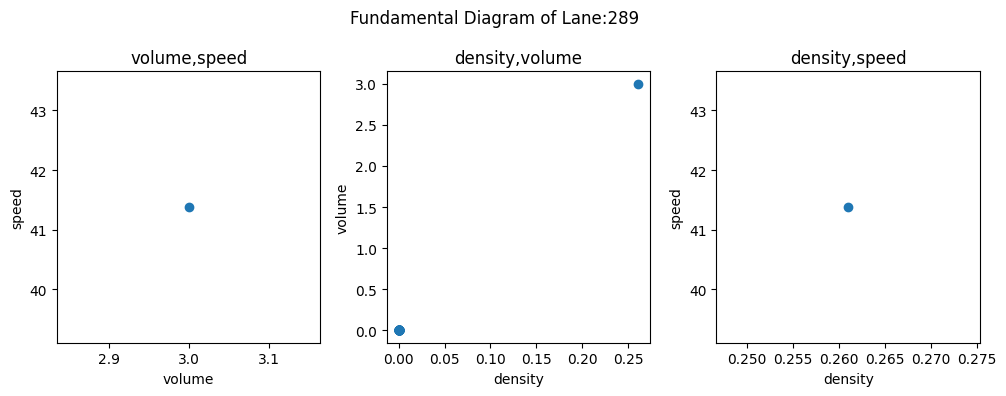

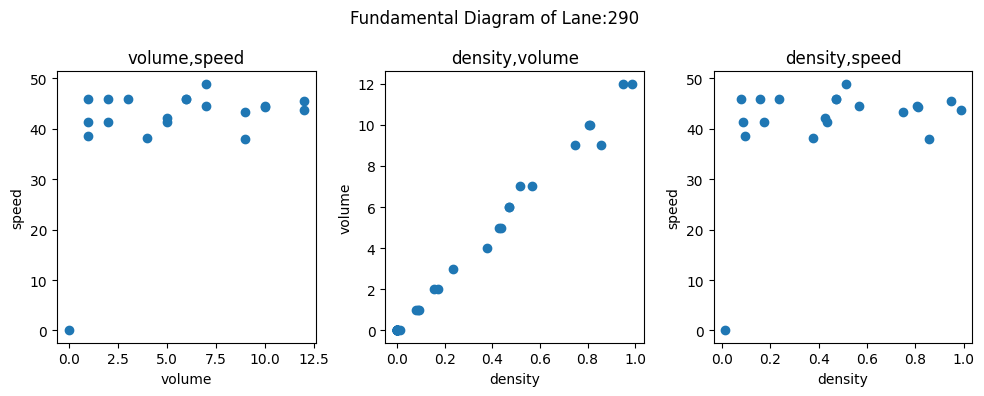

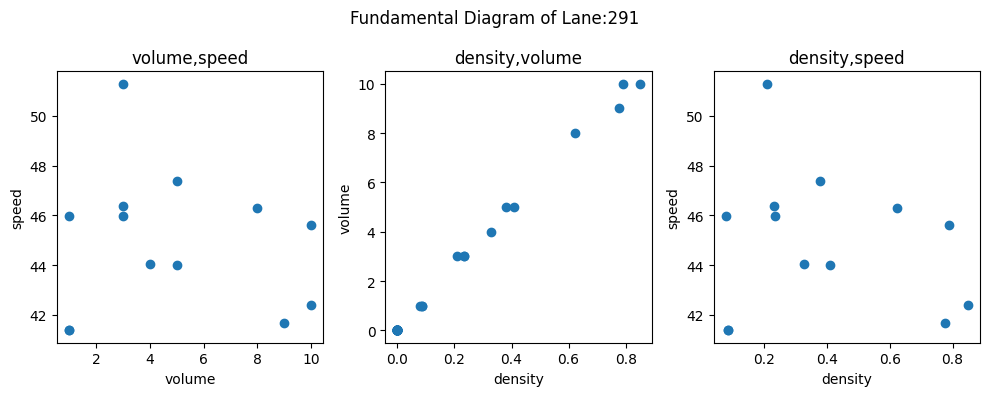

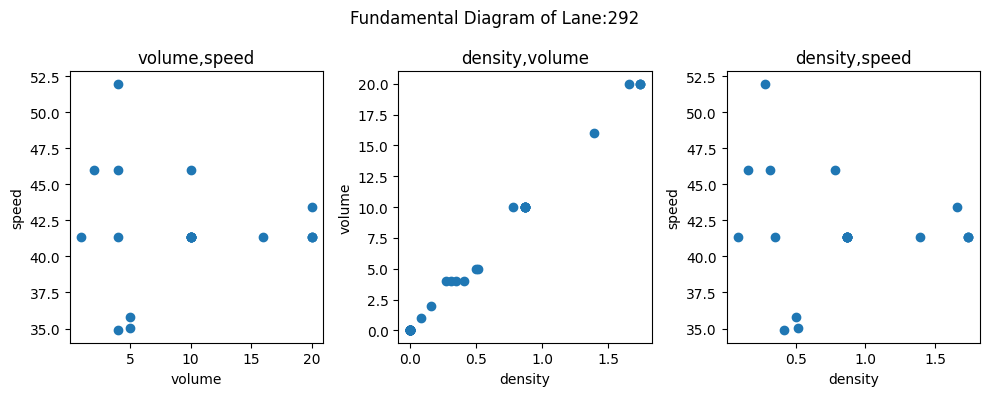

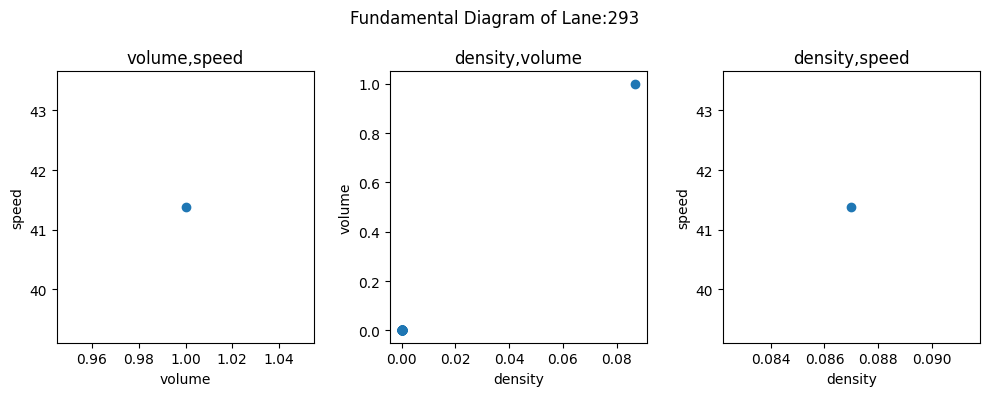

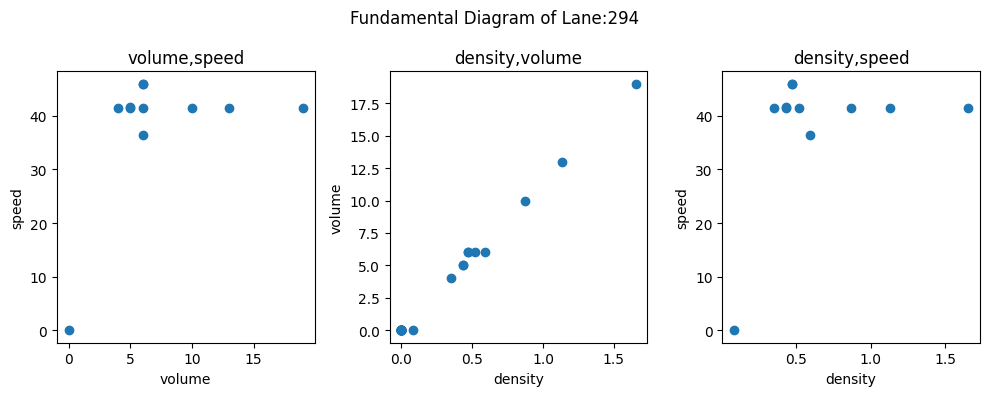

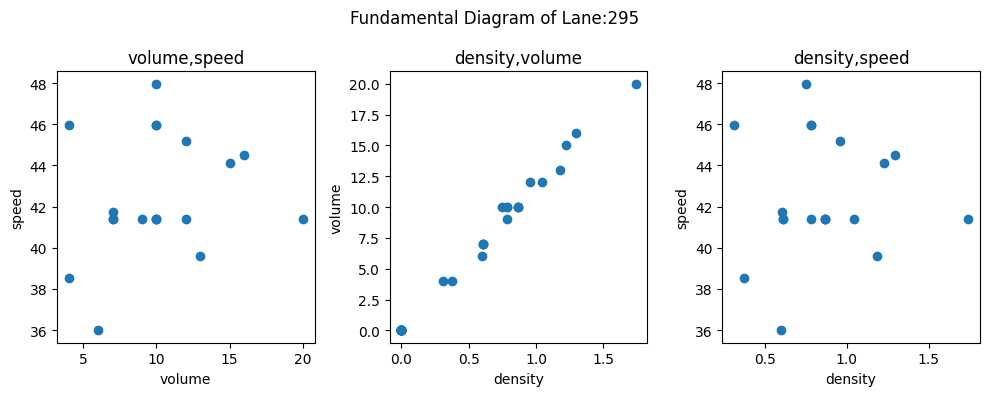

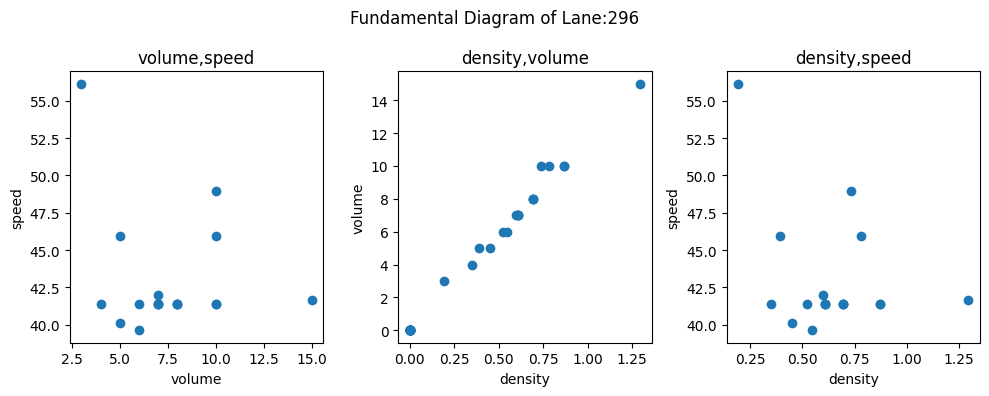

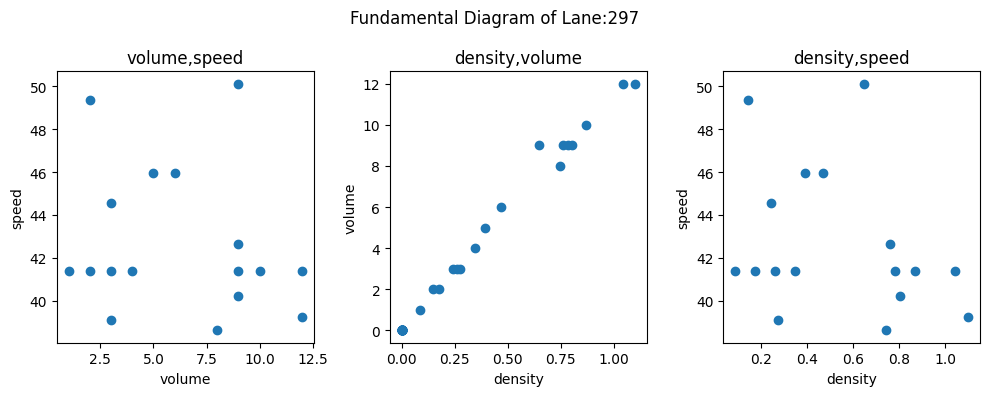

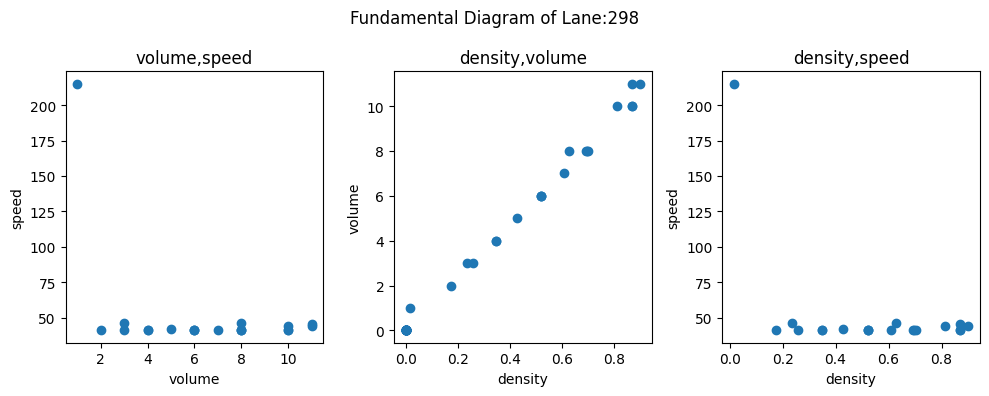

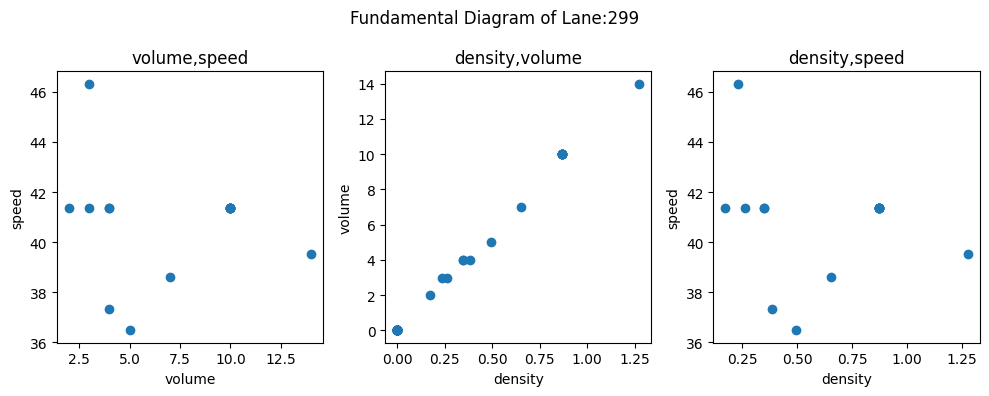

In [18]:
for node_id in range(200,300):
    node_type = "lane"
    feat_name1 = "occupancy"
    feat_name2 = "vehicles"

    lane_len = float(real_feat['lane'][node_id]['length'][0])*(max_len-min_len)+min_len
    feat_real1 = get_feat_df(real_feat, node_type, node_id, feat_name1)
    feat_real2 = get_feat_df(real_feat, node_type, node_id, feat_name2)
    df = pd.merge(feat_real1,feat_real2,on="time")
    occupancy = df[feat_name1+str(node_id)]
    occupancy = [sum(occupancy[i:i+10])/10 for i in range(0, len(occupancy), 10)]
    volume = df[feat_name2+str(node_id)]*(max_vol-min_vol)+min_vol
    volume = [sum(volume[i:i+10]) for i in range(0, len(volume), 10)]
    density = [x * lane_len/7 for x in occupancy]
    
    speed = []
    for ai, bi in zip(volume, density):
        if bi == 0:
            speed.append(float('nan'))
        else:
            speed.append(ai*3.6 / bi)
        
    
    # create a figure with three subplots
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

    # plot the data in the first subplot
    axs[0].scatter(volume,speed)
    axs[0].set_title('volume,speed')
    axs[0].set_xlabel("volume")
    axs[0].set_ylabel("speed")
    # axs[0].set_ylim(0,20)

    # plot the data in the second subplot
    axs[1].scatter(density,volume)
    axs[1].set_title('density,volume')
    axs[1].set_xlabel("density")
    axs[1].set_ylabel("volume")

    # plot the data in the third subplot
    axs[2].scatter(density,speed)
    axs[2].set_title('density,speed')
    axs[2].set_xlabel("density")
    axs[2].set_ylabel("speed")

    # add a title to the entire figure
    fig.suptitle('Fundamental Diagram of Lane:'+str(node_id))

    # adjust the spacing between the subplots
    fig.tight_layout()

    # show the plot
    plt.show()
    #plt.savefig(out_dir / "LANE_{s}.png".format(s=node_id), format="PNG",)




    

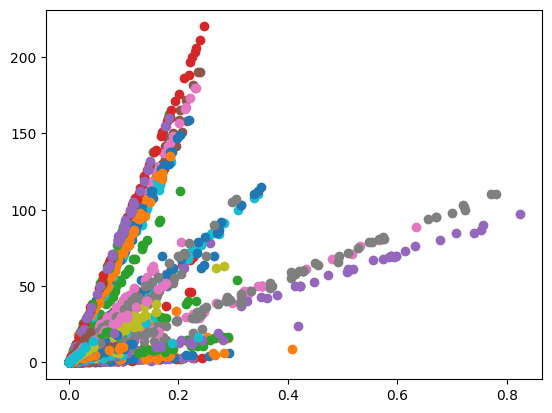

In [24]:
for node_id in range(200,300):
    node_type = "lane"
    feat_name1 = "occupancy"
    feat_name2 = "vehicles"
    lane_len = float(real_feat['lane'][node_id]['length'][0])*(max_len-min_len)+min_len
    feat_real1 = get_feat_df(real_feat, node_type, node_id, feat_name1)
    feat_real2 = get_feat_df(real_feat, node_type, node_id, feat_name2)
    df = pd.merge(feat_real1,feat_real2,on="time")
    occupancy = df[feat_name1+str(node_id)]
    stepover = 10
    occupancy = [sum(occupancy[i:i+stepover])/stepover for i in range(0, len(occupancy), stepover)]
    volume = df[feat_name2+str(node_id)]*(max_vol-min_vol)+min_vol
    volume = [sum(volume[i:i+stepover]) for i in range(0, len(volume), stepover)]
    density = [x * lane_len/7 for x in occupancy]

    speed = []
    for ai, bi in zip(volume, density):
        if bi == 0:
            speed.append(float('nan'))
        else:
            speed.append(ai*3.6 / bi)
            
    plt.scatter(occupancy,volume)
    fig.suptitle('Fundamental Diagram of Lane:'+str(node_id))

In [275]:
node_type = "lane"
node_id = 29
feat_name1 = "occupancy"
feat_name2 = "vehicles"

lane_len = float(real_feat['lane'][node_id]['length'][0])*(max_len-min_len)+min_len
feat_real1 = get_feat_df(real_feat, node_type, node_id, feat_name1)
feat_real2 = get_feat_df(real_feat, node_type, node_id, feat_name2)
df = pd.merge(feat_real1,feat_real2,on="time")
occupancy = df[feat_name1+str(node_id)]
occupancy = [sum(occupancy[i:i+10])/10 for i in range(0, len(occupancy), 10)]
volume = df[feat_name2+str(node_id)]*(max_vol-min_vol)+min_vol
volume = [sum(volume[i:i+10]) for i in range(0, len(volume), 10)]
density = [x * lane_len/7 for x in occupancy]

speed = []
for ai, bi in zip(volume, density):
    if bi == 0:
        speed.append(float('nan'))
    else:
        speed.append(ai*3.6 / bi)
        
        
# plt.scatter(volume,speed)
# plt.scatter(density,volume)
# plt.scatter(density,speed)

# plt.xlabel("Occupancy")
# plt.ylabel("Volume")
# #plt.title(feat_name.capitalize() + " of vehicle pairs")
# plt.legend(fontsize=10)
# plt.show()

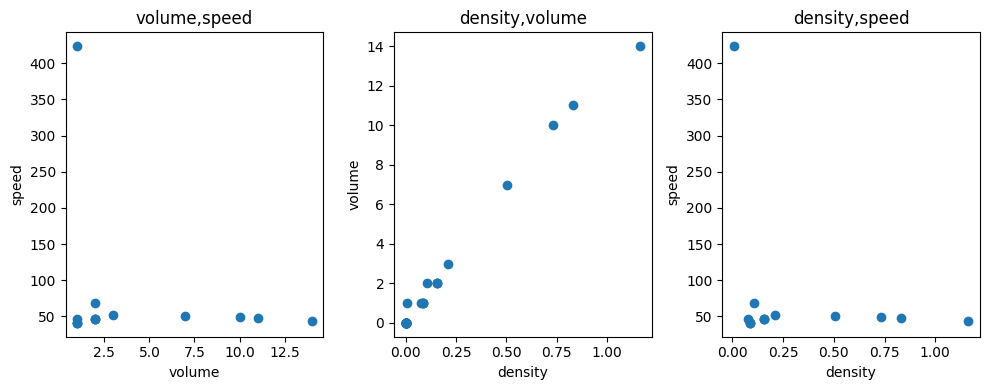

In [276]:
# create a figure with three subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# plot the data in the first subplot
axs[0].scatter(volume,speed)
axs[0].set_title('volume,speed')
axs[0].set_xlabel("volume")
axs[0].set_ylabel("speed")
# axs[0].set_ylim(0,20)

# plot the data in the second subplot
axs[1].scatter(density,volume)
axs[1].set_title('density,volume')
axs[1].set_xlabel("density")
axs[1].set_ylabel("volume")

# plot the data in the third subplot
axs[2].scatter(density,speed)
axs[2].set_title('density,speed')
axs[2].set_xlabel("density")
axs[2].set_ylabel("speed")

# add a title to the entire figure
#fig.suptitle('Trigonometric Functions')

# adjust the spacing between the subplots
fig.tight_layout()

# show the plot
plt.show()






In [ ]:
for node_id in list(real_feat[node_type].keys()):
    df_real_feat1[feat_name1+str(node_id)] = get_feat_df(real_feat, node_type, node_id, feat_name1)[feat_name1+str(node_id)]
    df_sim_feat1[feat_name1+str(node_id)] = get_feat_df(sim_feat, node_type, node_id, feat_name1)[feat_name1+str(node_id)]

In [314]:
node_type = "lane"
node_id = 0
feat_name1 = "occupancy"
feat_name2 = "vehicles"

feat_lst_real1 = []
feat_lst_real2 = []
feat_lst_sim1 = []
feat_lst_sim2 = []
avg_feat_real = pd.DataFrame()
avg_feat_sim = pd.DataFrame()

df_real_feat1 = pd.DataFrame()
df_sim_feat1 = pd.DataFrame()
for node_id in list(real_feat[node_type].keys()):
    df_real_feat1[feat_name1+str(node_id)] = get_feat_df(real_feat, node_type, node_id, feat_name1)[feat_name1+str(node_id)]
    df_sim_feat1[feat_name1+str(node_id)] = get_feat_df(sim_feat, node_type, node_id, feat_name1)[feat_name1+str(node_id)]
    df_real_feat2[feat_name2+str(node_id)] = get_feat_df(real_feat, node_type, node_id, feat_name2)[feat_name2+str(node_id)]
    df_sim_feat2[feat_name2+str(node_id)] = get_feat_df(sim_feat, node_type, node_id, feat_name2)[feat_name2+str(node_id)]

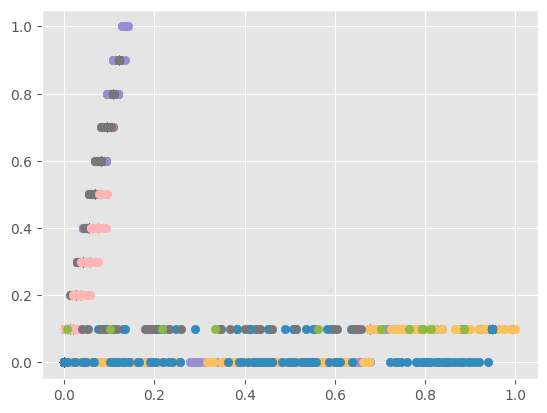

In [324]:
for node_id in list(real_feat[node_type].keys()):
    plt.scatter(df_real_feat1[feat_name1+str(node_id)],df_real_feat2[feat_name2+str(node_id)])

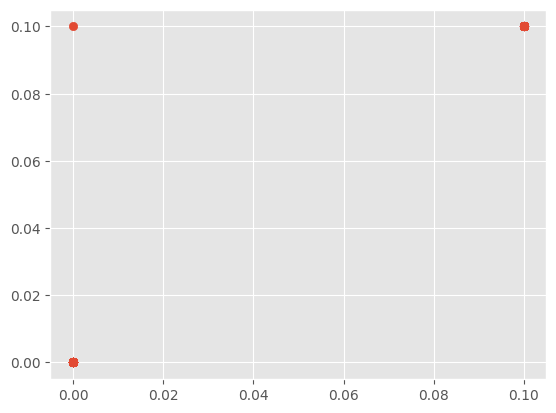

In [320]:
plt.scatter(df_real_feat2[feat_name2+str(node_id)],df_sim_feat2[feat_name2+str(node_id)])

In [316]:
df_sim_feat1

occupancy0  occupancy1  occupancy2  occupancy3    occupancy4  \
0       0.000000    0.000000    0.000000    0.000000  0.000000e+00   
1       0.000000    0.000000    0.000000    0.000000  0.000000e+00   
2       0.000000    0.000000    0.000000    0.000000  0.000000e+00   
3       0.000000    0.000000    0.000000    0.000000  0.000000e+00   
4       0.000000    0.000000    0.001033    0.000000  0.000000e+00   
...          ...         ...         ...         ...           ...   
1015    0.039357    0.003499    0.033349    0.023983  5.893180e-07   
1016    0.059539    0.009739    0.052667    0.009624  4.097292e-05   
1017    0.061812    0.002377    0.019982    0.012458  3.554692e-05   
1018    0.074516    0.016524    0.023189    0.052206  1.577825e-06   
1019    0.047902    0.005332    0.020306    0.010618  1.173281e-05   

      occupancy5  occupancy6  occupancy7  occupancy8  occupancy9  occupancy10  \
0       0.000000    0.000000    0.000000    0.000000    0.000000     0.000000   
1       0.000000    0.000000    0.000000    0.000000    0.000000     0.000000   
2       0.000000    0.000000    0.000000    0.000000    0.000000     0.000000   
3       0.000000    0.000000    0.000000    0.000000    0.677739     0.000000   
4       0.000000    0.000000    0.000000    0.000000    0.677739     0.000000   
...          ...         ...         ...         ...         ...          ...   
1015    0.006291    0.112556    0.000503    0.016838    0.031202     0.005961   
1016    0.001175    0.014481    0.003667    0.006048    0.174589     0.016284   
1017    0.003226    0.012186    0.004135    0.032421    0.171253     0.002812   
1018    0.001872    0.013176    0.004495    0.030054    0.114557     0.006514   
1019    0.000541    0.004258    0.000118    0.021018    0.063008     0.015863   

      occupancy11   occupancy12   occupancy13   occupancy14  occupancy15  
0        0.677739  0.000000e+00  0.000000e+00  0.000000e+00     0.000000  
1        0.677739  0.000000e+00  0.000000e+00  0.000000e+00     0.000000  
2        0.677739  0.000000e+00  0.000000e+00  0.000000e+00     0.000000  
3        0.677739  0.000000e+00  0.000000e+00  0.000000e+00     0.000000  
4        0.626087  0.000000e+00  0.000000e+00  0.000000e+00     0.000000  
...           ...           ...           ...           ...          ...  
1015     0.295133  7.548498e-02  1.117455e-05  2.292771e-06     0.178119  
1016     0.284773  8.026004e-07  4.094341e-07  2.887430e-05     0.064530  
1017     0.171396  1.715524e-07  1.974949e-04  3.623444e-07     0.108514  
1018     0.104901  2.744351e-03  3.129343e-04  4.547396e-08     0.061414  
1019     0.030781  1.319543e-07  1.048497e-06  1.028161e-05     0.054052  

[1020 rows x 16 columns]

(array([[2.60e+01, 0.00e+00, 6.40e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.15e+02, 1.50e+01, 7.40e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [8.00e+00, 4.00e+00, 1.70e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        ...,
        [1.02e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [1.02e+03, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
        [8.05e+02, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]]),
 array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
        0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
        0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
        0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
        0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
        0.315, 0.32 , 0.325, 0.33 , 0.

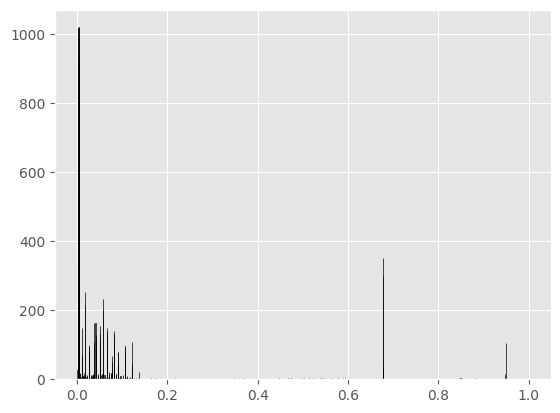

In [317]:
# plt.plot(df_real_feat1.mean(axis=1))
# plt.plot(df_sim_feat1.mean(axis=1))

plt.hist(df_sim_feat1,bins=200, alpha=1,edgecolor='black',facecolor='none',label='TransWorld')

In [304]:
node_type = "lane"
node_id = 0
feat_name1 = "occupancy"
feat_name2 = "vehicles"

feat_lst_real1 = []
feat_lst_real2 = []
feat_lst_sim1 = []
feat_lst_sim2 = []
avg_feat_real = pd.DataFrame()
avg_feat_sim = pd.DataFrame()
for node_id in list(real_feat[node_type].keys()):
    df_real_feat1 = get_feat_df(real_feat, node_type, node_id, feat_name1) 
    df_sim_feat1 = get_feat_df(sim_feat, node_type, node_id, feat_name1)
    df_real_feat2 = get_feat_df(real_feat, node_type, node_id, feat_name2) 
    df_sim_feat2 = get_feat_df(sim_feat, node_type, node_id, feat_name2)
    
    feat_lst_real1.append(df_real_feat1[feat_name1+str(node_id)])
    feat_lst_real2.append(df_real_feat2[feat_name2+str(node_id)])
    feat_lst_sim1.append(df_sim_feat1[feat_name1+str(node_id)])
    feat_lst_sim2.append(df_sim_feat2[feat_name2+str(node_id)])

df_feat1_real = pd.DataFrame(np.array(feat_lst_real1))
df_feat1_sim = pd.DataFrame(np.array(feat_lst_sim1))
df_feat2_real = pd.DataFrame(np.array(feat_lst_real2))
df_feat2_sim = pd.DataFrame(np.array(feat_lst_sim2))

# df_feat1_real
df_real = pd.merge(df_feat1_real,df_feat2_real,on="time")
df_sim = pd.merge(df_feat1_sim,df_feat2_sim,on="time")

# feat_real_avg1 = df_feat1_real.mean()
# feat_real_avg2 = df_feat2_real.mean()
# feat_sim_avg1 = df_feat1_sim.mean()
# feat_sim_avg2 = df_feat2_sim.mean()

# time_real =  df_real['time']
# time_sim =  df_sim['time']

# avg_feat_real['time'] = time_real
# avg_feat_sim['time'] = time_sim
# avg_feat_real[feat_name+'_avg'] = feat_real_avg
# avg_feat_sim[feat_name+'_avg'] = feat_sim_avg

# plt.plot(df_real[feat_name], feat_real_avg1, label = "real")
# plt.plot(feat_sim_avg2, feat_sim_avg1, label = "sim")

# # plt.xlabel("Time step")
# # plt.ylabel(feat_name)
# plt.title("Citywide_avg_"+ node_type + "_" + feat_name)
# plt.legend()
# plt.show()

KeyError: 'time'

### 3. Car following behavior

In [81]:
def get_cf_df(struc_dict):
    front_veh = struc_dict[('veh', 'phy/ahead', 'veh')][0].tolist()
    behind_veh = struc_dict[('veh', 'phy/ahead', 'veh')][1].tolist()
    time = struc_dict[('veh', 'phy/ahead', 'veh')][2].tolist()
    cf_struc = pd.DataFrame(np.array([front_veh, behind_veh,time]).T)
    cf_struc.columns = ['front_veh', 'behind_veh', 'time']
    return cf_struc
def CF_plot(real_feat_dict,sim_feat_dict,front_veh_id,behind_veh_id,feat_name,plot_cf):
    cf_struc = get_cf_df(real_struc)
    veh_pair = cf_struc[(cf_struc['front_veh'] == front_veh_id) & (cf_struc['behind_veh'] == behind_veh_id)]

    feat_front = get_feat_df(real_feat_dict, 'veh', front_veh_id, feat_name)
    feat_behind = get_feat_df(real_feat_dict, 'veh', behind_veh_id, feat_name)
    feat_front_sim = get_feat_df(sim_feat_dict, 'veh', front_veh_id, feat_name)
    feat_behind_sim = get_feat_df(sim_feat_dict, 'veh', behind_veh_id,feat_name)

    merge_front = pd.merge(veh_pair, feat_front, on='time')
    merge_behind = pd.merge(merge_front, feat_behind, on='time')
    merge_front_sim = pd.merge(veh_pair, feat_front_sim, on='time')
    merge_behind_sim = pd.merge(merge_front_sim, feat_behind_sim, on='time')
    
    if plot_cf == 1:
        plt.plot(merge_behind['time'], merge_behind[feat_name+str(front_veh_id)], label = "Front_car")
        plt.plot(merge_behind['time'], merge_behind[feat_name+str(behind_veh_id)], label = "Follower_car")
        plt.plot(merge_behind_sim['time'], merge_behind_sim[feat_name+str(front_veh_id)], linestyle='--',  marker='o', markersize=2, label = "Front_car_sim")
        plt.plot(merge_behind_sim['time'],merge_behind_sim[feat_name+str(behind_veh_id)], linestyle='--',  marker='o',
            markerfacecolor='blue', markersize=2, label = "Follower_car_sim")
        plt.xlabel("Time step")
        plt.ylabel(feat_name.capitalize())
        plt.title(feat_name.capitalize() + " of vehicle pairs")
        plt.legend(fontsize=10)
        plt.show()
    else:
        return merge_behind_sim

In [82]:
cf_struc = get_cf_df(real_struc)
df = cf_struc[['front_veh','behind_veh']].drop_duplicates()
all_veh_pairs = list(set([(i,j) for i in df['front_veh'] for j in df['behind_veh']]))

In [83]:
long_cf_pairs = []
for pair in all_veh_pairs:
    front_veh_id, behind_veh_id = pair
    veh_pair = cf_struc[(cf_struc['front_veh'] == front_veh_id) & (cf_struc['behind_veh'] == behind_veh_id)]
    pair_time = len(set(veh_pair.time))
    if pair_time>50: 
        # print(min(veh_pair['time']))
        if max(veh_pair['time'])>0:
            long_cf_pairs.append((front_veh_id, behind_veh_id, pair_time))

In [84]:
long_cf_pairs

[(73, 77, 101),
 (65, 68, 68),
 (71, 74, 71),
 (82, 83, 82),
 (83, 84, 77),
 (78, 80, 96),
 (80, 82, 87),
 (72, 73, 101),
 (74, 76, 71),
 (69, 75, 63),
 (79, 81, 88),
 (70, 71, 72),
 (81, 85, 73),
 (66, 70, 70),
 (68, 69, 69),
 (62, 66, 63)]

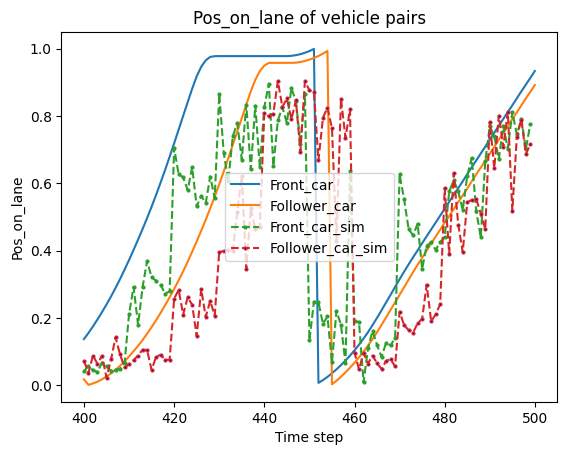

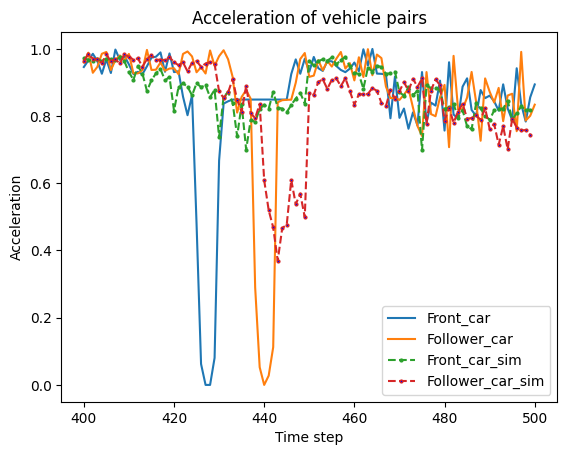

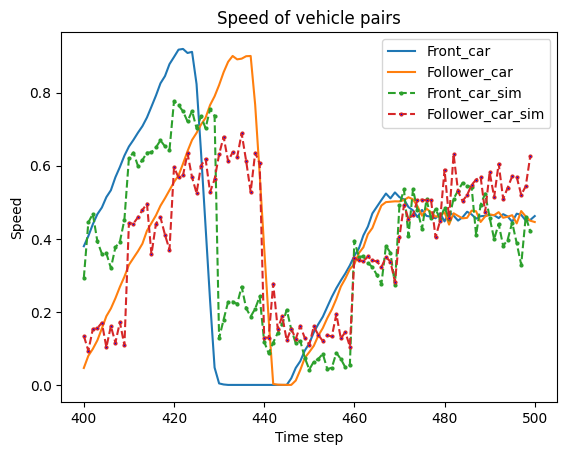

In [86]:
front_veh_id = 73
behind_veh_id = 77

CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,'pos_on_lane',1)
CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,"acceleration",1)
CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,"speed",1)


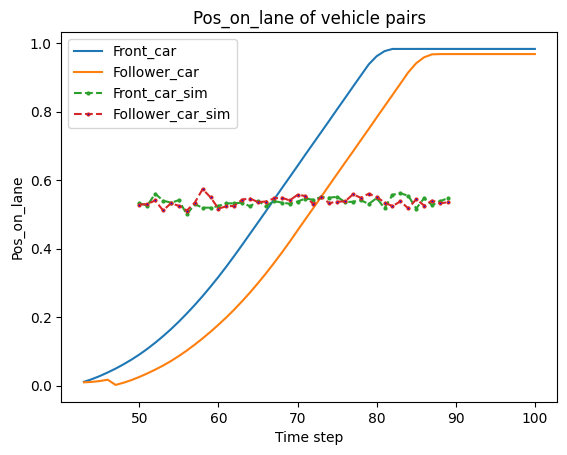

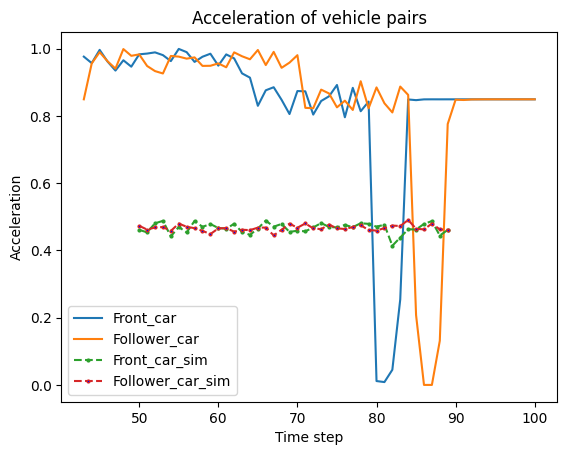

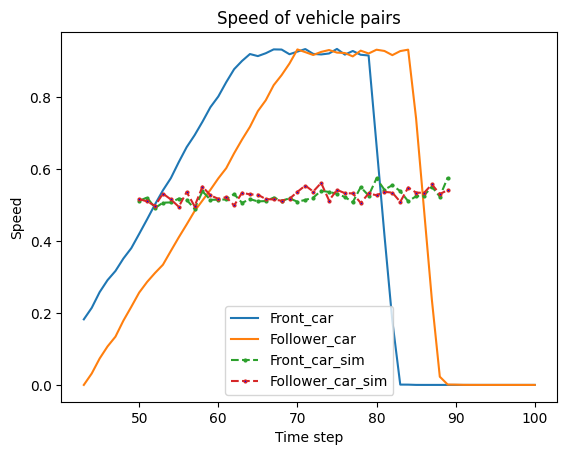

In [253]:
front_veh_id = 8
behind_veh_id = 9
CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,'pos_on_lane',1)
CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,"acceleration",1)
CF_plot(real_feat,sim_feat,front_veh_id,behind_veh_id,"speed",1)


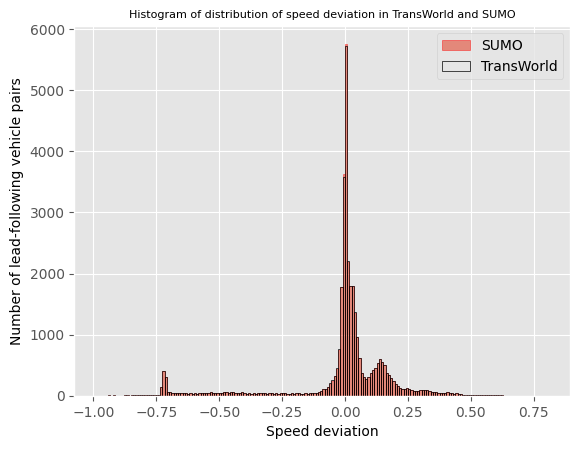

In [38]:


speed_dev = []
speed_dev_sim = []
node_type = 'veh' 
feat_name = 'speed'

for pair in long_cf_pairs:
    front_veh_id = pair[0]
    behind_veh_id = pair[1] 
    veh_pair = get_cf_veh_pair(cf_struc, front_veh_id, behind_veh_id)
    speed_front,speed_behind = get_feat_df(real_feat, node_type, front_veh_id, feat_name),get_feat_df(real_feat, node_type, behind_veh_id,feat_name)
    speed_front_sim, speed_behind_sim = get_feat_df(sim_feat, node_type, front_veh_id, feat_name), get_feat_df(sim_feat, node_type, behind_veh_id,feat_name)
    
    merge_front = pd.merge(veh_pair, speed_front, on='time')
    merge_behind = pd.merge(merge_front, speed_behind, on='time')
    merge_front_sim = pd.merge(veh_pair, speed_front_sim, on='time')
    merge_behind_sim = pd.merge(merge_front_sim, speed_behind_sim, on='time')

    speed_dev.extend(merge_behind['speed'+str(front_veh_id)] - merge_behind['speed'+str(behind_veh_id)])
    speed_dev_sim.extend(merge_behind_sim['speed'+str(front_veh_id)] - merge_behind_sim['speed'+str(behind_veh_id)])
    

kwargs = dict(alpha=0.6, bins=200)

plt.hist(speed_dev, **kwargs, edgecolor='red', label='SUMO')
plt.hist(speed_dev_sim,bins=200, alpha=1,edgecolor='black',facecolor='none',label='TransWorld')
plt.xlabel("Speed deviation")
plt.ylabel("Number of lead-following vehicle pairs")
plt.title("Histogram of distribution of speed deviation in TransWorld and SUMO", fontsize=8)

plt.legend()
plt.show()

### fundamental diagram

In [175]:
real_feat['lane']

defaultdict(dict,
            {0: {'length': tensor([1., 1., 1.,  ..., 1., 1., 1.]),
              'vehicles': tensor([0.0000, 0.0000, 0.0000,  ..., 0.8182, 0.8182, 0.8182]),
              'occupancy': tensor([0.0000, 0.0000, 0.0000,  ..., 0.1134, 0.1216, 0.1216]),
              'speed': tensor([0.8981, 0.8981, 0.8981,  ..., 0.4004, 0.4020, 0.4193]),
              'shape_a': tensor([0.0098, 0.0098, 0.0098,  ..., 0.0098, 0.0098, 0.0098]),
              'shape_b': tensor([0.4984, 0.4984, 0.4984,  ..., 0.4984, 0.4984, 0.4984]),
              'shape_c': tensor([0.4929, 0.4929, 0.4929,  ..., 0.4929, 0.4929, 0.4929]),
              'shape_d': tensor([0.4984, 0.4984, 0.4984,  ..., 0.4984, 0.4984, 0.4984]),
              'time': tensor([   1,    2,    3,  ..., 2018, 2019, 2020])},
             1: {'length': tensor([1., 1., 1.,  ..., 1., 1., 1.]),
              'vehicles': tensor([0.0000, 0.0000, 0.0000,  ..., 0.5455, 0.5455, 0.4545]),
              'occupancy': tensor([0.0000, 0.0000, 0.0000, 

In [19]:
# node_type = "lane"
# node_id = 0
# feat_name1 = "occupancy"
# feat_name2 = "vehicles"

# feat_lst_real1 = []
# feat_lst_real2 = []
# feat_lst_sim1 = []
# feat_lst_sim2 = []
# avg_feat_real = pd.DataFrame()
# avg_feat_sim = pd.DataFrame()
# for node_id in list(real_feat[node_type].keys()):
#     df_real_feat1 = get_feat_df(real_feat, node_type, node_id, feat_name1) 
#     df_sim_feat1 = get_feat_df(sim_feat, node_type, node_id, feat_name1)
#     df_real_feat2 = get_feat_df(real_feat, node_type, node_id, feat_name2) 
#     df_sim_feat2 = get_feat_df(sim_feat, node_type, node_id, feat_name2)
    
#     feat_lst_real1.append(df_real_feat1[feat_name1+str(node_id)])
#     feat_lst_real2.append(df_real_feat2[feat_name2+str(node_id)])
#     feat_lst_sim1.append(df_sim_feat1[feat_name1+str(node_id)])
#     feat_lst_sim2.append(df_sim_feat2[feat_name2+str(node_id)])

# df_feat1_real = pd.DataFrame(np.array(feat_lst_real1))
# df_feat1_sim = pd.DataFrame(np.array(feat_lst_sim1))
# df_feat2_real = pd.DataFrame(np.array(feat_lst_real2))
# df_feat2_sim = pd.DataFrame(np.array(feat_lst_sim2))

# # df_feat1_real
# df_real = pd.merge(df_feat1_real,df_feat2_real,on="time")
# df_sim = pd.merge(df_feat1_sim,df_feat2_sim,on="time")


In [20]:

# g_struc = get_struc_df(real_struc)
# npairs = list(set(zip(g_struc['front_veh'], g_struc['behind_veh'])))

# speed_dev = []
# speed_dev_sim = []

# for pair in all_pairs:
#     front_veh_id = pair[0]
#     behind_veh_id = pair[1] 
#     veh_pair = get_cf_veh_pair(g_struc, front_veh_id, behind_veh_id)
#     speed_front = get_real_feat(real_feat, 'veh', front_veh_id, 'speed')
#     speed_behind = get_real_feat(real_feat, 'veh', behind_veh_id, 'speed')
    
#     speed_front_sim = get_sim_feat(model_graph, 'veh', front_veh_id, 'speed')
#     speed_behind_sim = get_sim_feat(model_graph, 'veh', behind_veh_id,'speed')    
    
#     merge_front = pd.merge(veh_pair, speed_front, on='time')
#     merge_behind = pd.merge(merge_front, speed_behind, on='time')
#     merge_front_sim = pd.merge(veh_pair, speed_front_sim, on='time')
#     merge_behind_sim = pd.merge(merge_front_sim, speed_behind_sim, on='time')

#     speed_dev.extend(merge_behind['speed'+str(front_veh_id)] - merge_behind['speed'+str(behind_veh_id)])
#     speed_dev_sim.extend(merge_behind_sim['speed'+str(front_veh_id)] - merge_behind_sim['speed'+str(behind_veh_id)])
    

# kwargs = dict(alpha=0.5, bins=80)

# plt.hist(speed_dev, **kwargs, color='g', label='Real')
# plt.hist(speed_dev_sim, **kwargs, color='b', label='sim')
# plt.xlabel("Speed deviation")
# plt.ylabel("Vehicle pairs")
# plt.title("Speed deviation of vehicle pairs")

# plt.legend()
# plt.show()

### 4. structure comparison

In [40]:
from typing import Dict, List, Optional, Tuple
def raw_struc_to_eval(struc_dict: Dict)-> pd.DataFrame:
    row = []
    for key, values in struc_dict.items():
        sr_type, rela, end_type = key
        sr_node, end_node, time = values
        for i in range(len(time)):
            row.append([sr_type, rela, end_type,int(sr_node[i]),int(end_node[i]),int(time[i])])
    raw_df = pd.DataFrame(row, columns=['sr_type', 'rela', 'end_type','sr_node','end_node','step'])
    raw_df["from"] = [raw_df["sr_type"][i] + str(raw_df["sr_node"][i]) for i in range(len(raw_df["sr_node"]))]
    raw_df["to"] = [raw_df["end_type"][i] + str(raw_df["end_node"][i]) for i in range(len(raw_df["end_node"]))]
    raw_df = raw_df[["step","from","to", 'rela']]
    return raw_df   

In [41]:
real_struc_df = raw_struc_to_eval(real_struc)
sim_struc_df = raw_struc_to_eval(sim_struc)

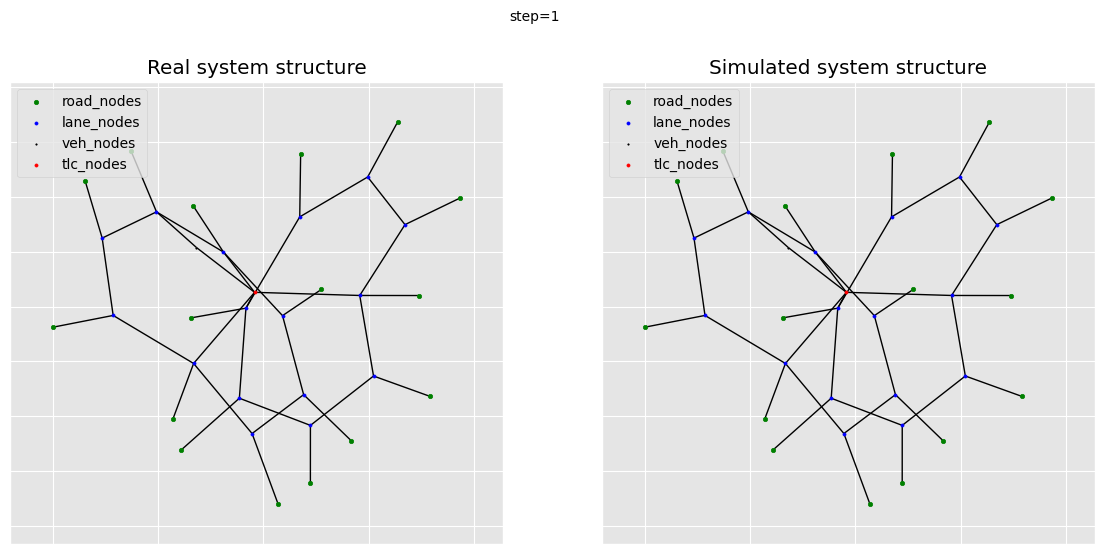

In [42]:
t = 1
sub_real = real_struc_df[real_struc_df["step"] == t]
sub_sim = sim_struc_df[sim_struc_df["step"] == t]
real_G = nx.from_pandas_edgelist(sub_real, 'from', 'to')
sim_G = nx.from_pandas_edgelist(sub_sim, 'from', 'to')


lane_nodes = [i for i in list(real_G.nodes) if 'lane' in i]
veh_nodes = [i for i in list(real_G.nodes) if 'veh' in i]
road_nodes = [i for i in list(real_G.nodes) if 'road' in i]
tlc_nodes = [i for i in list(real_G.nodes) if 'tlc' in i]

lane_nodes1 = [i for i in list(sim_G.nodes) if 'lane' in i]
veh_nodes1 = [i for i in list(sim_G.nodes) if 'veh' in i]
road_nodes1 = [i for i in list(sim_G.nodes) if 'road' in i]
tlc_nodes1 = [i for i in list(sim_G.nodes) if 'tlc' in i]


fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
plt.figtext(0.5, 1, "step={s}".format(s=t), ha='center', va='top')

pos = nx.fruchterman_reingold_layout(real_G)
#pos = nx.spring_layout(real_G)
#pos = nx.circular_layout(real_G)
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=road_nodes, pos=pos, node_color = 'green', node_size = 10,label='road_nodes')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=lane_nodes, pos=pos, node_color = 'blue', node_size = 5,label='lane_nodes')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=veh_nodes, pos=pos, node_color = 'black' , node_size = 1, label='veh_nodes')
nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=tlc_nodes, pos=pos, node_color = 'red' , node_size = 5, label='tlc_nodes')

nx.draw_networkx_edges(real_G, ax=axs[0], pos=pos)
#nx.draw_networkx(real_G, ax=axs[0],  nodelist=rednodes, pos=pos, node_color = node_color, with_labels=False)
axs[0].title.set_text('Real system structure')
axs[0].legend(loc="upper left")


nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=road_nodes, pos=pos, node_color = 'green', node_size = 10,label='road_nodes')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=lane_nodes, pos=pos, node_color = 'blue', node_size = 5,label='lane_nodes')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=veh_nodes, pos=pos, node_color = 'black' , node_size = 1, label='veh_nodes')
nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=tlc_nodes, pos=pos, node_color = 'red' , node_size = 5, label='tlc_nodes')

nx.draw_networkx_edges(sim_G, ax=axs[1], pos=pos)

axs[1].title.set_text('Simulated system structure')
axs[1].legend(loc="upper left")

plt.show()

#plt.savefig(out_dir / "step_{s}.png".format(s=t), format="PNG",)
#plt.close()

In [49]:
real_struc_df[(real_struc_df["from"]== 'veh1')]

step  from     to       rela
64643      4  veh1  lane9     phy/to
64646      5  veh1  lane9     phy/to
64648      6  veh1  lane9     phy/to
64651      7  veh1  lane9     phy/to
64653      8  veh1  lane0     phy/to
...      ...   ...    ...        ...
332670    89  veh1   veh3  phy/ahead
332686    90  veh1   veh3  phy/ahead
332701    91  veh1   veh3  phy/ahead
332716    92  veh1   veh3  phy/ahead
332731    93  veh1   veh3  phy/ahead

[254 rows x 4 columns]

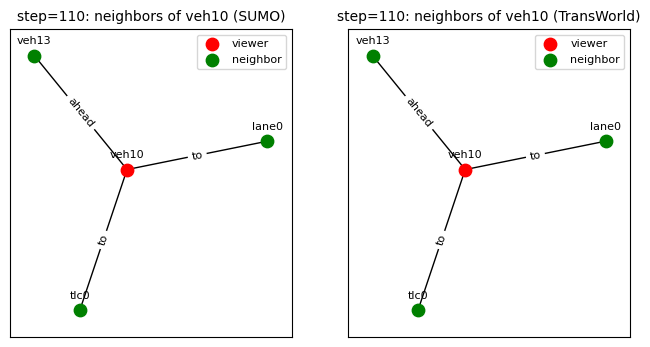

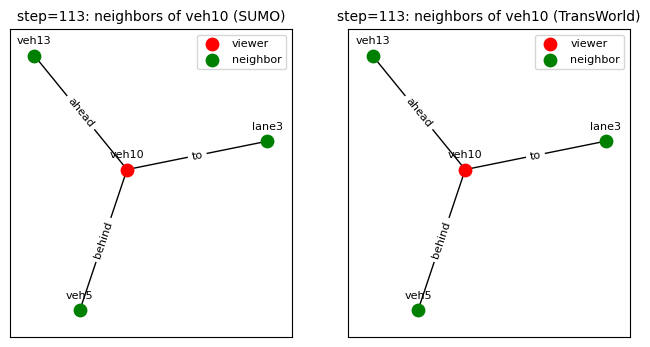

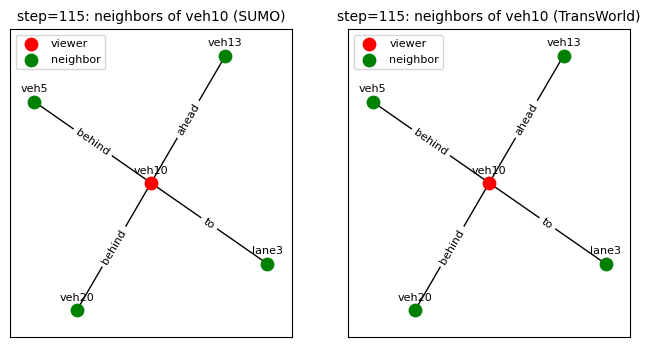

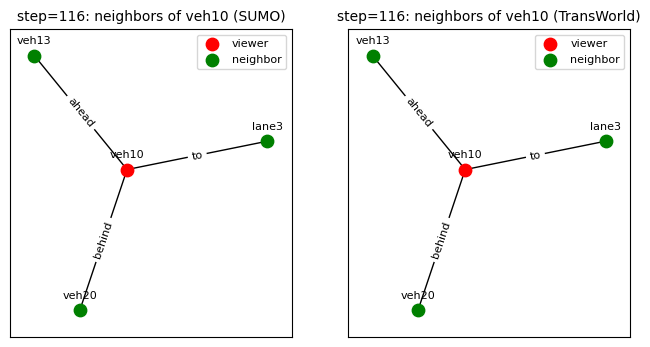

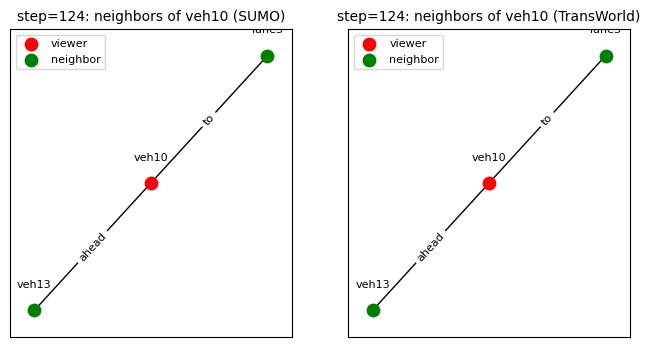

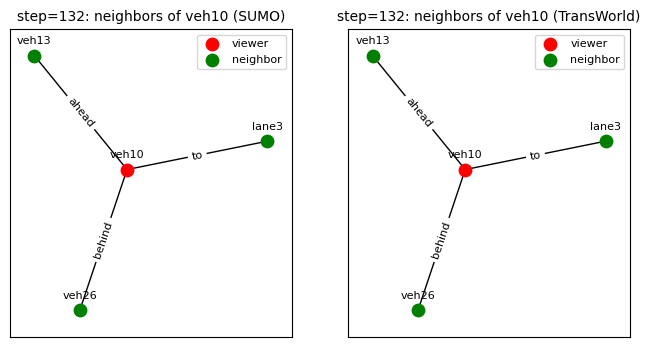

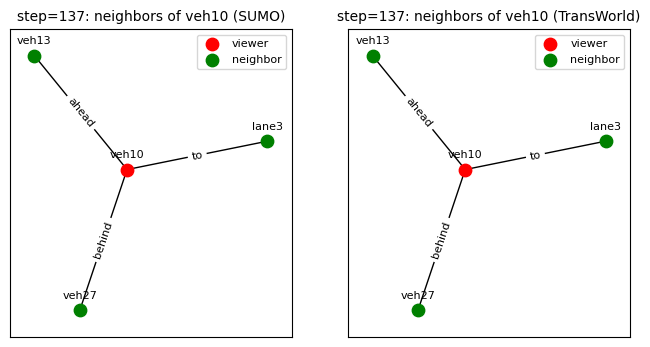

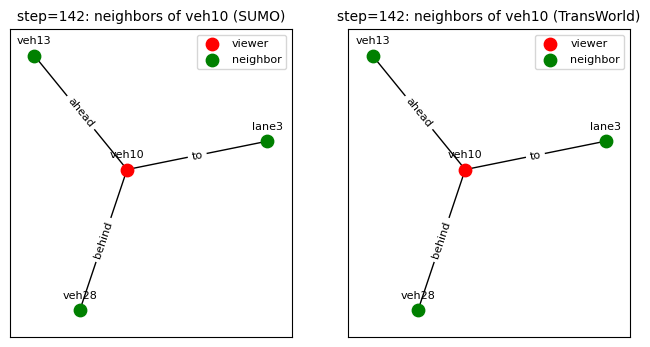

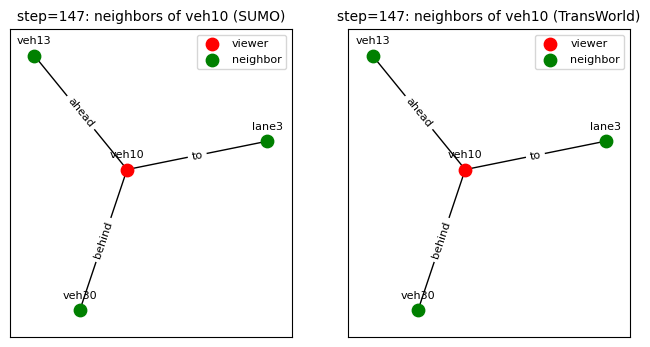

In [173]:
root = "veh10"
saved_neighbor = []

# sub_real = real_struc[(real_struc["step"] == t) & (real_struc["from"]== root)]
# real_G = nx.from_pandas_edgelist(sub_real, 'from', 'to')
# print(list(real_G.nodes))

# sub_sim = sim_struc[(sim_struc["step"] == t) & (sim_struc["from"]== root)]
# sim_G = nx.from_pandas_edgelist(sub_sim, 'from', 'to')

for t in range(110,150):
    sub_real = real_struc_df[(real_struc_df["step"] == t) & (real_struc_df["from"]== root)]
    sub_sim = sim_struc_df[(sim_struc_df["step"] == t) & (sim_struc_df["from"]== root)]
    real_G = nx.from_pandas_edgelist(sub_real, source='from', target='to', edge_attr='rela')
    sim_G = nx.from_pandas_edgelist(sub_sim, source='from', target='to', edge_attr='rela')
    #print(list(real_G.nodes))
    #### start to plot###

    viewer = [root]
    neighbor = list(real_G.nodes)
    neighbor.remove(root)
    
    if neighbor != saved_neighbor:
        saved_neighbor = neighbor
        fig, axs = plt.subplots(ncols=2, figsize=(8, 4))

        pos = nx.spring_layout(real_G,seed=42)
        #lt.figtext(0.5, 1, "step={s}".format(s=t), ha='center', va='top')

        nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=viewer, pos=pos, node_color = 'r', node_size = 80,  label='viewer')
        nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=viewer, pos=pos, node_color = 'r', node_size = 80,label='viewer')
        
        nx.draw_networkx_nodes(real_G, ax=axs[0],  nodelist=neighbor, pos=pos, node_color = 'g', node_size = 80,label='neighbor')
        nx.draw_networkx_nodes(sim_G, ax=axs[1],  nodelist=neighbor, pos=pos, node_color = 'g', node_size = 80,label='neighbor')

        nx.draw_networkx_edges(real_G, ax=axs[0], pos=pos)
        nx.draw_networkx_edges(sim_G, ax=axs[1], pos=pos)
        
        edge_labels_real = {(row['from'], row['to']): row['rela'] for idx, row in sub_real.iterrows()}
        edge_labels_sim = {(row['from'], row['to']): row['rela'] for idx, row in sub_sim.iterrows()}
        
        node_labels = {node: node for node in real_G.nodes()}
        node_label_pos = {node: (pos[node][0]+0, pos[node][1] + 0.1) for node in real_G.nodes()}
        #nx.draw_networkx_labels(G, pos=node_label_pos, labels=node_labels)

        nx.draw_networkx_labels(real_G, ax=axs[0], pos=node_label_pos,font_size=8)
        nx.draw_networkx_labels(sim_G, ax=axs[1], pos=node_label_pos,font_size=8)
        
        edge_labels_real = {(row['from'], row['to']): row['rela'].split('/')[1] for idx, row in sub_real.iterrows()}
        edge_labels_sim = {(row['from'], row['to']): row['rela'].split('/')[1] for idx, row in sub_sim.iterrows()}
#         edge_label_pos_real = {(row['from'], row['to']): ((pos[row['from']][0] + pos[row['to']][0]) , (pos[row['from']][1] + pos[row['to']][1]) ) for idx, row in sub_real.iterrows()}
#         edge_label_pos_sim = {(row['from'], row['to']): ((pos[row['from']][0] + pos[row['to']][0]), (pos[row['from']][1] + pos[row['to']][1]) ) for idx, row in sub_sim.iterrows()}

        
        nx.draw_networkx_edge_labels(real_G,ax=axs[0], pos=pos, edge_labels=edge_labels_real,  font_size=8)
        nx.draw_networkx_edge_labels(sim_G, ax=axs[1], pos=pos, edge_labels=edge_labels_sim,  font_size=8)
        #nx.draw_networkx(real_G, ax=axs[0], pos=pos, with_labels=True)
        #nx.draw_networkx(sim_G, ax=axs[1], pos=pos, with_labels=True)
        axs[0].legend(fontsize=8)
        axs[1].legend(fontsize=8)
        axs[0].set_title("step={s}".format(s=t)+": neighbors of " + root +" (SUMO)",fontsize=10)
        axs[1].set_title("step={s}".format(s=t)+ ": neighbors of " + root + " (TransWorld)",fontsize=10)

In [105]:
real_G.nodes()

NodeView(('veh7', 'lane2', 'tlc0', 'veh8'))

In [106]:
real_G.edges()

EdgeView([('veh7', 'lane2'), ('veh7', 'tlc0'), ('veh7', 'veh8')])